<a href="https://colab.research.google.com/github/Sowmya-BH/ML-Projects/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

https://github.com/Ayush245101/Paisabazaar-Banking-Fraud-Analysis-Exploratory-Data-Analysis/blob/main/EDA_Submission_project_15_10.ipynb

# **Project Summary -**


**Business Context**

Paisabazaar is a financial services company that assists customers in finding and applying for various banking and credit products. An integral part of their service is assessing the creditworthiness of individuals, which is crucial for both loan approval and risk management. The credit score of a person is a significant metric used by financial institutions to determine the likelihood that an individual will repay their loans or credit balances. Accurate classification of credit scores can help Paisabazaar enhance their credit assessment processes, reduce the risk of loan defaults, and offer personalized financial advice to their customers.

In this context, analyzing and classifying credit scores based on customer data can improve decision-making processes and contribute to better financial product recommendations. This case study aims to develop a model that predicts the credit score of individuals based on various features, such as income, credit card usage, and payment behavior.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**To develop a PoC for a predictive model using customer demographic and financial data to classify individuals into "Good," "Standard," or "Poor" credit score categories. This model will identify the key factors influencing creditworthiness, allowing for better loan approval decisions and reduced default rates.Enhancing credit score predictions, we can empower Paisabazaar to offer more tailored financial products, improve customer satisfaction, and increase overall profitability by mitigating credit risk.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
pip install inflection # used when renaming columns in subsection 1.1

In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [6]:
!pip install scikit-posthocs

In [7]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import math
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scikit_posthocs import posthoc_dunn
import scikit_posthocs as sp

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            f1_score, precision_score, recall_score, log_loss,
                            roc_auc_score, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# from statsmodels.tools.tools import add_constant
# from statsmodels.stats.outliers_influence import variance_inflation_factor

import inflection # used when renaming columns

In [8]:
# Define bold and reset codes
# BOLD = "\033[1m"
# RESET = "\033[0m"
def print_bold(text):
    print(f"\033[1m{text}\033[0m")

In [9]:
# Set maximum columns to display
pd.set_option('display.max_columns', 60)  # Show only 3 columns

# # Reset to default
# pd.reset_option('display.max_columns')

# Set maximum rows to display
pd.set_option('display.max_rows', 100)  # Show only 10 rows
# pd.reset_option('display.max_rows')


### Dataset Loading

In [10]:
# Load Dataset
# Load the dataset
df = pd.read_csv("/content/dataset-2.csv")

### Dataset First View

In [11]:
# Dataset First Look
df.head()

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12            1824.843333                3.0              4.0   
1       19114.12            1824.843333                3.0              4.0   
2       19114.12            1824.843333                3.0              4.0   
3       19114.12            1824.843333                3.0              4.0   
4       19114.12            1824.843333                3.0              4.0   

   Interest_Rate  Num_of_Loan  \
0            3.0          4.0   
1            3.0          4.0   
2            3.0          4.0   
3            3.0          4.0   
4            3.0          4.0   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                  5.0   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     4.0                 11.27                   4.0   
2                     7.0                 11.27                   4.0   
3                     4.0                  6.27                   4.0   
4                     4.0                 11.27                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                 26.822620               265.0   
1       Good            809.98                 31.944960               266.0   
2       Good            809.98                 28.609352               267.0   
3       Good            809.98                 31.377862               268.0   
4       Good            809.98                 24.797347               269.0   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                 21.46538   
1                    No            49.574949                 21.46538   
2                    No            49.574949                 21.46538   
3                    No            49.574949                 21.46538   
4                    No            49.574949                 21.46538   

                  Payment_Behaviour  Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments       312.494089         Good  
1    Low_spent_Large_value_payments       284.629162         Good  
2   Low_spent_Medium_value_payments       331.209863         Good  
3    Low_spent_Small_value_payments       223.451310         Good  
4  High_spent_Medium_value_payments       341.489231         Good

### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
# Basic info
print_bold("===== Shape =====")
print(df.shape)

print_bold("\n===== Column Names =====")
print(df.columns)

===== Shape =====
(100000, 28)

===== Column Names =====
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


### Dataset Information

In [13]:
# Dataset Info
print_bold("\n===== Data Types =====")
print(df.dtypes)


===== Data Types =====
ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Cred

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
duplicates = df.duplicated().sum()
print_bold(f"\n===== Duplicates: {duplicates} =====")


===== Duplicates: 0 =====


#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
print_bold("\n===== Missing Values =====")
df.isnull().sum()


===== Missing Values =====


ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### What did you know about your dataset?

The data includes 28 features that can be leveraged to predict credit scores, such as:

Income: Helps gauge the customer’s financial stability.

Credit Card Usage: Likely tied to credit utilization, which is important for credit score prediction.

Payment Behavior: This reflects how consistently a customer meets payment deadlines, a key indicator for creditworthiness.

The dataset seems to be well-prepared, with no missing or duplicate values, indicating a clean and ready-to-use dataset for further analysis..

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [17]:
#Rename Columns
cols_old = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']

# creating new names with a snakecase pattern
snakecase = lambda x: inflection.underscore( x )

# creating a list containing the new column names
cols_new = list(map(snakecase, cols_old))

# renaming the dataframe columns
df.columns = cols_new

In [18]:
# Dataset Describe
print_bold("\n===== Summary Statistics =====")
df.describe()


===== Summary Statistics =====


id    customer_id          month            age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                ssn  annual_income  monthly_inhand_salary  num_bank_accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417           0.000000   
25%    2.451686e+08   19342.972500            1626.594167           3.000000   
50%    5.006886e+08   36999.705000            3095.905000           5.000000   
75%    7.560027e+08   71683.470000            5957.715000           7.000000   
max    9.999934e+08  179987.280000           15204.633333          11.000000   

       num_credit_card  interest_rate    num_of_loan  delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000         100000.00000   
mean          5.533570       14.53208       3.532880             21.08141   
std           2.067098        8.74133       2.446356             14.80456   
min           0.000000        1.00000       0.000000              0.00000   
25%           4.000000        7.00000       2.000000             10.00000   
50%           5.000000       13.00000       3.000000             18.00000   
75%           7.000000       20.00000       5.000000             28.00000   
max          11.000000       34.00000       9.000000             62.00000   

       num_of_delayed_payment  changed_credit_limit  num_credit_inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.313120             10.470323              5.798250   
std                  6.237166              6.609481              3.867826   
min                  0.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       outstanding_debt  credit_utilization_ratio  credit_history_age  \
count     100000.000000             100000.000000       100000.000000   
mean        1426.220376                 32.285173          221.220460   
std         1155.129026                  5.116875           99.680716   
min            0.230000                 20.000000            1.000000   
25%          566.072500                 28.052567          144.000000   
50%         1166.155000                 32.305784          219.000000   
75%         1945.962500                 36.496663          302.000000   
max         4998.070000                 50.000000          404.000000   

       total_emi_per_month  amount_invested_monthly  monthly_balance  
count        100000.000000            100000.000000    100000.000000  
mean            107.699208                55.101315       392.697586  
std             132.267056                39.006932       201.652719  
min               0.000000                 0.000000         0.007760  
25%              29.268886                27.959111       267.615983  
50%              66.462304                45.156550       333.865366  
75%             147.392573                71.295797       463.215683  
max            1779.103254               434.191089      1183

In [19]:
print_bold("\n===== Summary Statistics =====")
print(df.describe(include="O"))


===== Summary Statistics =====
            name occupation type_of_loan credit_mix payment_of_min_amount  \
count     100000     100000       100000     100000                100000   
unique     10128         15         6261          3                     3   
top     Jessicad     Lawyer      No Data   Standard                   Yes   
freq          48       7096        11408      45848                 52326   

                     payment_behaviour credit_score  
count                           100000       100000  
unique                               6            3  
top     Low_spent_Small_value_payments     Standard  
freq                             28616        53174  


In [20]:
# Check Unique Values for each variable.
df.nunique()

id                          100000
customer_id                  12500
month                            8
name                         10128
age                             43
ssn                          12500
occupation                      15
annual_income                12488
monthly_inhand_salary        13241
num_bank_accounts               12
num_credit_card                 12
interest_rate                   34
num_of_loan                     10
type_of_loan                  6261
delay_from_due_date             63
num_of_delayed_payment          26
changed_credit_limit          3452
num_credit_inquiries            18
credit_mix                       3
outstanding_debt             12203
credit_utilization_ratio    100000
credit_history_age             404
payment_of_min_amount            3
total_emi_per_month          11890
amount_invested_monthly      12261
payment_behaviour                6
monthly_balance              98494
credit_score                     3
dtype: int64

In [21]:
# Create customer-level dataset by grouping by SSN
customer_df = df.groupby('name').agg({
    'customer_id': 'first',
    'ssn': 'first',
    'age': 'last',  # Take most recent age
    'occupation': 'last',
    'annual_income': 'mean',
    'monthly_inhand_salary': 'mean',
    'num_bank_accounts': 'max',
    'num_credit_card': 'max',
    'num_of_loan': 'sum',
    'delay_from_due_date': 'mean',
    'num_of_delayed_payment': 'sum',
    'num_credit_inquiries': 'sum',
    'outstanding_debt': 'mean',
    'credit_utilization_ratio': 'mean',
    'credit_history_age': 'max',
    'total_emi_per_month': 'mean',
    'amount_invested_monthly': 'mean',
    'monthly_balance': 'mean',
    'credit_score': 'last'  # Most recent credit score
}).reset_index()

In [22]:
correlation = df.corr(numeric_only=True)
correlation

id   customer_id         month       age  \
id                        1.000000  1.235872e-03  5.291503e-05  0.003338   
customer_id               0.001236  1.000000e+00 -6.660113e-17 -0.002172   
month                     0.000053 -6.660113e-17  1.000000e+00  0.016990   
age                       0.003338 -2.172258e-03  1.698955e-02  1.000000   
ssn                       0.011707  5.769305e-03 -1.557496e-16 -0.008411   
annual_income            -0.005357  1.076923e-02  1.530483e-17  0.091525   
monthly_inhand_salary    -0.004792  1.019558e-02 -1.818625e-03  0.090636   
num_bank_accounts         0.004826 -1.188701e-03  7.909795e-05 -0.190415   
num_credit_card          -0.001900 -4.600690e-03  8.973261e-05 -0.148567   
interest_rate             0.003957 -4.712091e-03  6.790115e-18 -0.217557   
num_of_loan              -0.010136  1.482832e-02  1.555542e-16 -0.213533   
delay_from_due_date      -0.004730  4.581213e-03  3.418202e-04 -0.174119   
num_of_delayed_payment    0.001859  5.163216e-03  1.154567e-04 -0.184264   
changed_credit_limit      0.008670  6.599255e-04 -6.708862e-04 -0.157254   
num_credit_inquiries     -0.002201  3.516144e-04  1.396038e-01 -0.250960   
outstanding_debt          0.002941  4.381594e-03  3.200578e-17 -0.202374   
credit_utilization_ratio -0.005402 -2.173680e-03  2.439924e-03  0.025492   
credit_history_age       -0.005604 -1.482226e-02  2.278441e-02  0.234618   
total_emi_per_month      -0.009127  2.390433e-02  4.971583e-02 -0.047334   
amount_invested_monthly  -0.004044  1.632440e-02 -1.043065e-16  0.071045   
monthly_balance           0.000859 -9.215332e-04 -2.094643e-03  0.116098   

                                   ssn  annual_income  monthly_inhand_salary  \
id                        1.170712e-02  -5.356989e-03              -0.004792   
customer_id               5.769305e-03   1.076923e-02               0.010196   
month                    -1.557496e-16   1.530483e-17              -0.001819   
age                      -8.410995e-03   9.152456e-02               0.090636   
ssn                       1.000000e+00  -8.041949e-03              -0.008367   
annual_income            -8.041949e-03   1.000000e+00               0.998154   
monthly_inhand_salary    -8.367089e-03   9.981538e-01               1.000000   
num_bank_accounts         1.165117e-02  -2.840602e-01              -0.283181   
num_credit_card          -4.960946e-03  -2.178520e-01              -0.216847   
interest_rate             4.774004e-03  -3.023524e-01              -0.301858   
num_of_loan              -1.080524e-02  -2.555596e-01              -0.254298   
delay_from_due_date       1.069729e-02  -2.501051e-01              -0.249438   
num_of_delayed_payment    1.378698e-02  -2.862966e-01              -0.285360   
changed_credit_limit      1.975228e-02  -1.763533e-01              -0.176187   
num_credit_inquiries     -6.684371e-03  -2.802418e-01              -0.279736   
outstanding_debt          2.950511e-03  -2.693193e-01              -0.269044   
credit_utilization_ratio  2.652701e-03   1.759301e-01               0.176092   
credit_history_age       -3.572047e-03   2.723739e-01               0.271457   
total_emi_per_month      -4.695634e-03   4.381061e-01               0.421836   
amount_invested_monthly  -2.951901e-03   8.062806e-01               0.807326   
monthly_balance          -2.723698e-03   6.256399e-01               0.626631   

                          num_bank_accounts  num_credit_card  interest_rate  \
id                                 0.004826        -0.001900   3.956573e-03   
customer_id                       -0.001189        -0.004601  -4.712091e-03   
month                              0.000079         0.000090   6.790115e-18   
age                               -0.190415        -0.148567  -2.175571e-01   
ssn                                0.011651        -0.004961   4.774004e-03   
annual_income                     -0.284060        -0.217852  -3.023524e-01   
monthly_inhand_salary             -0.283181  

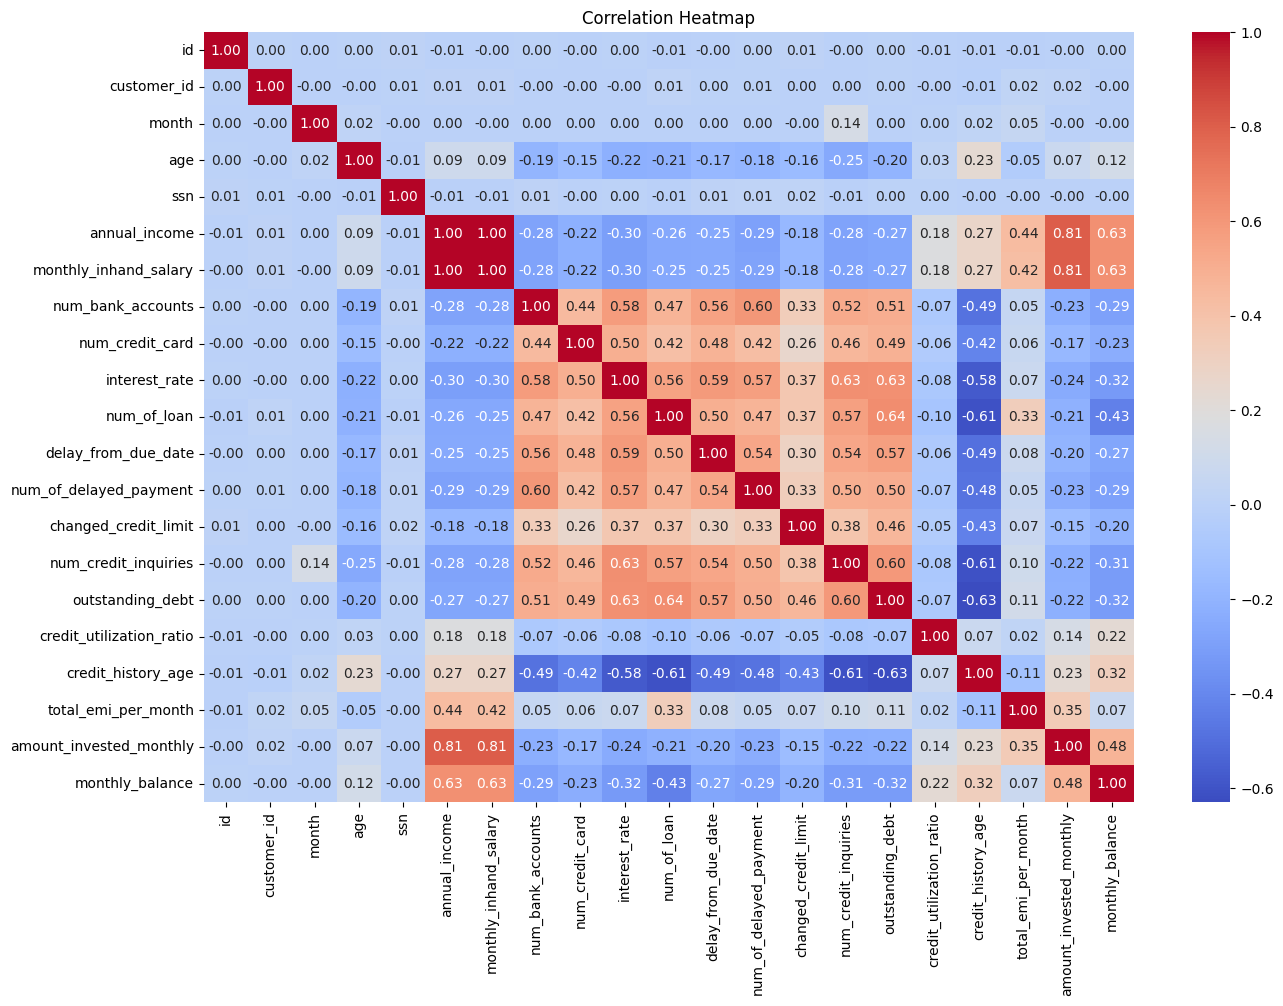

In [23]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

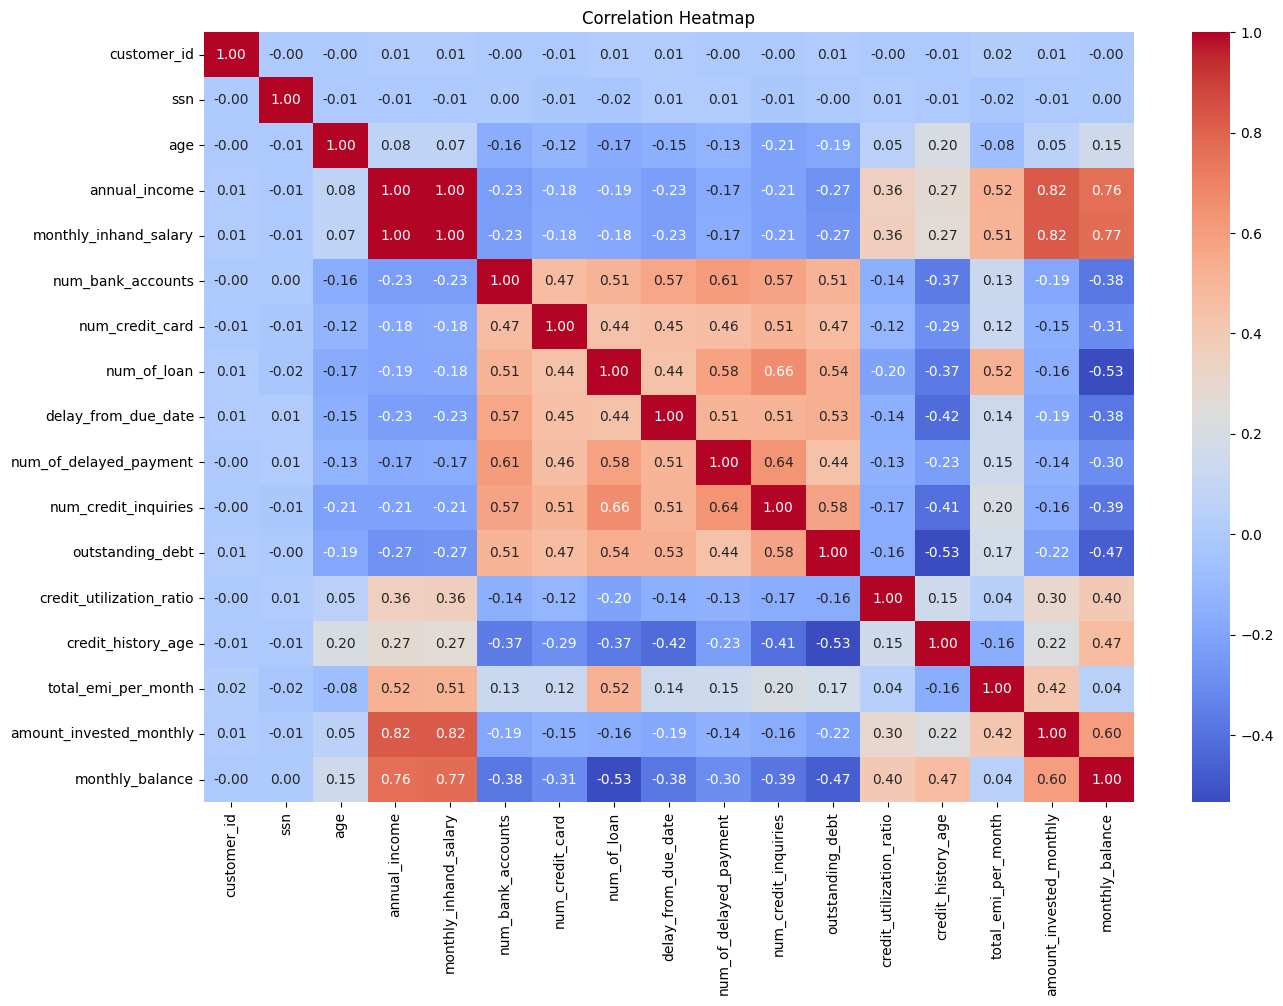

In [24]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
correlation = customer_df.corr(numeric_only=True,method='spearman')
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

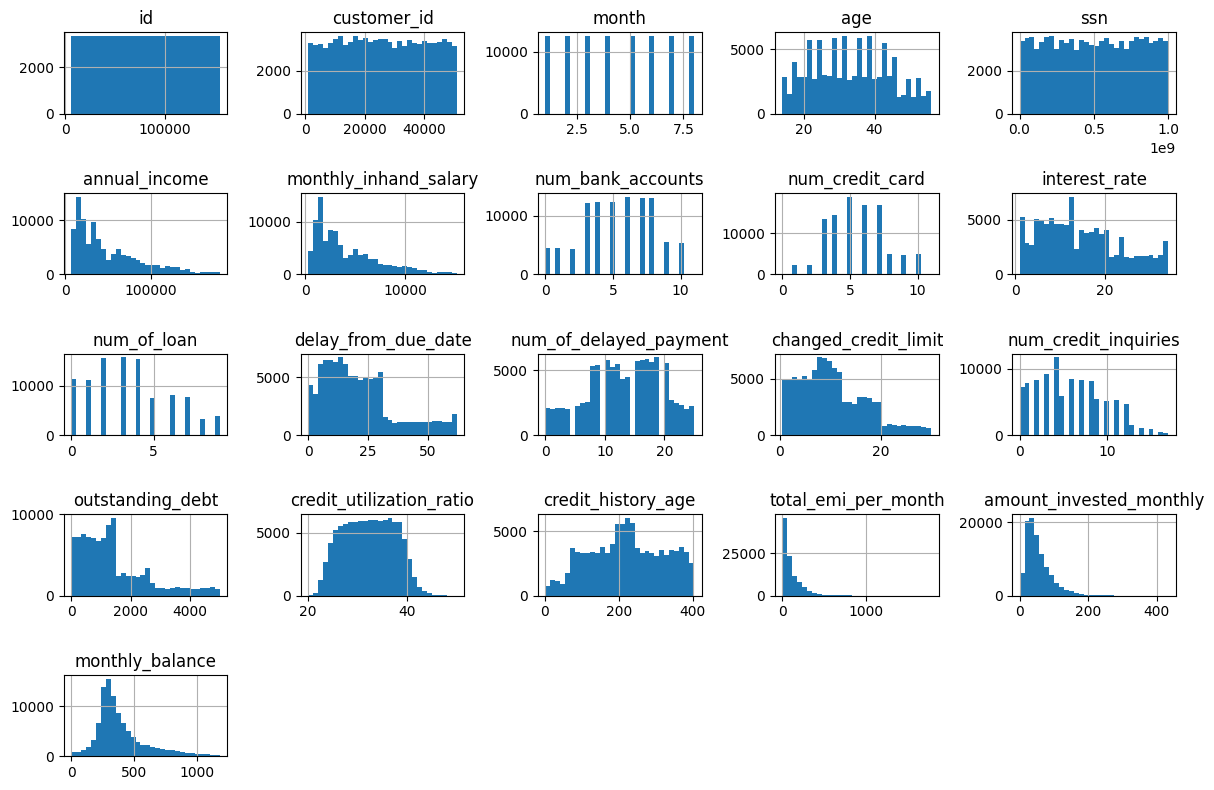

In [25]:
# Distribution of numerical columns
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# # Correlation heatmap
# plt.figure(figsize=(10, 6))
# correlation = customer_df.corr(numeric_only=True)
# sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()

In [26]:
df['credit_mix'].value_counts()

credit_mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [27]:
ls = [df.columns]

In [28]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [29]:
# for id in df['customer_id'].unique():
#   print(df[df['customer_id']==id])

In [30]:
# Value counts for categorical columns
categorical_cols = customer_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  print_bold(f"\n===== Value Counts for {col} =====")
  print(df[col].value_counts().head(10))



===== Value Counts for name =====
name
Jessicad            48
Langep              48
Stevex              48
Ronald Groverk      40
Johnc               40
Phila               40
Raymondr            40
Nate Raymondw       40
Kimj                40
Ryan Vlastelicad    40
Name: count, dtype: int64

===== Value Counts for occupation =====
occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Name: count, dtype: int64

===== Value Counts for credit_score =====
credit_score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


In [31]:
cat_attributes = df.select_dtypes( exclude = ['int32', 'int64', 'float64', 'datetime64[ns]'] )
cat_attributes.drop(['name'],axis=1,inplace=True)
#Check Unique Values for each variable.
cat_attributes.apply(lambda x: x.value_counts()).T.stack()

occupation         Accountant                          6744.0
                   Architect                           6824.0
                   Developer                           6720.0
                   Doctor                              6568.0
                   Engineer                            6864.0
                                                       ...   
payment_behaviour  Low_spent_Medium_value_payments    14399.0
                   Low_spent_Small_value_payments     28616.0
credit_score       Good                               17828.0
                   Poor                               28998.0
                   Standard                           53174.0
Length: 6291, dtype: float64

In [32]:
for col in df.select_dtypes(exclude =['int32', 'int64', 'float64', 'datetime64[ns]']):
  print(df[col].value_counts().head(10))

name
Jessicad            48
Langep              48
Stevex              48
Ronald Groverk      40
Johnc               40
Phila               40
Raymondr            40
Nate Raymondw       40
Kimj                40
Ryan Vlastelicad    40
Name: count, dtype: int64
occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Name: count, dtype: int64
type_of_loan
No Data                    11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Student Loan                1240
Payday Loan                 1200
Mortgage Loan               1176
Auto Loan                   1152
Home Equity Loan            1136
Name: count, dtype: int64
credit_mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64
payment_of_min_amount


In [33]:
cat_attributes

occupation                                       type_of_loan  \
0      Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1      Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
2      Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3      Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4      Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
...          ...                                                ...   
99995   Mechanic                        Auto Loan, and Student Loan   
99996   Mechanic                        Auto Loan, and Student Loan   
99997   Mechanic                        Auto Loan, and Student Loan   
99998   Mechanic                        Auto Loan, and Student Loan   
99999   Mechanic                        Auto Loan, and Student Loan   

      credit_mix payment_of_min_amount                 payment_behaviour  \
0           Good                    No   High_spent_Small_value_payments   
1           Good                    No    Low_spent_Large_value_payments   
2           Good                    No   Low_spent_Medium_value_payments   
3           Good                    No    Low_spent_Small_value_payments   
4           Good                    No  High_spent_Medium_value_payments   
...          ...                   ...                               ...   
99995       Good                    No   High_spent_Large_value_payments   
99996       Good                    No  High_spent_Medium_value_payments   
99997       Good                    No   High_spent_Large_value_payments   
99998       Good                    No    Low_spent_Large_value_payments   
99999       Good                    No  High_spent_Medium_value_payments   

      credit_score  
0             Good  
1             Good  
2             Good  
3             Good  
4             Good  
...            ...  
99995         Poor  
99996         Poor  
99997         Poor  
99998     Standard  
99999         Poor  

[100000 rows x 6 columns]

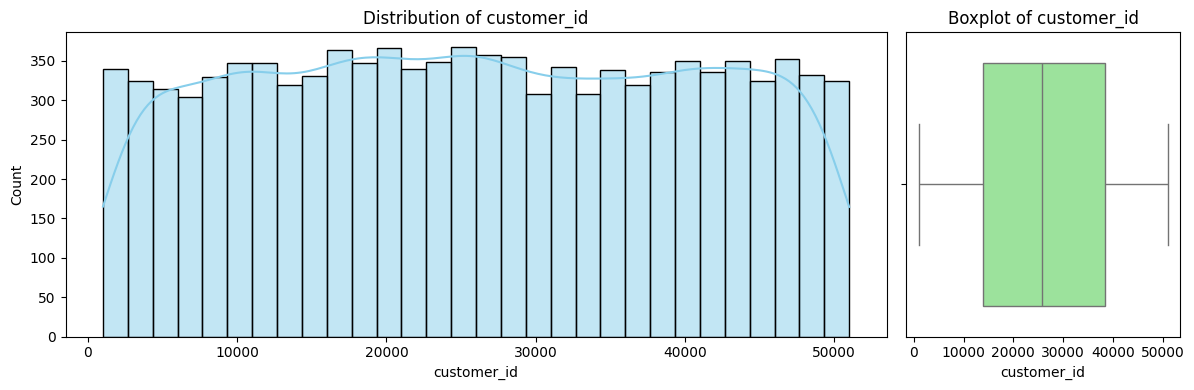

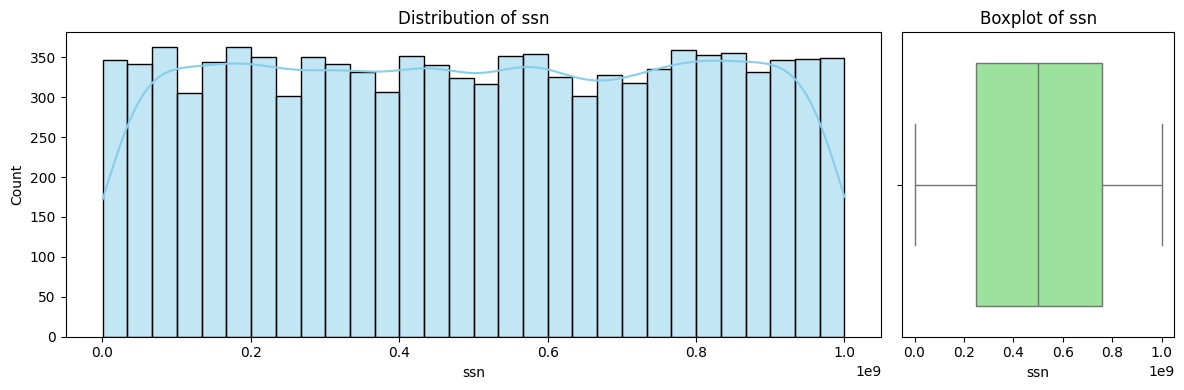

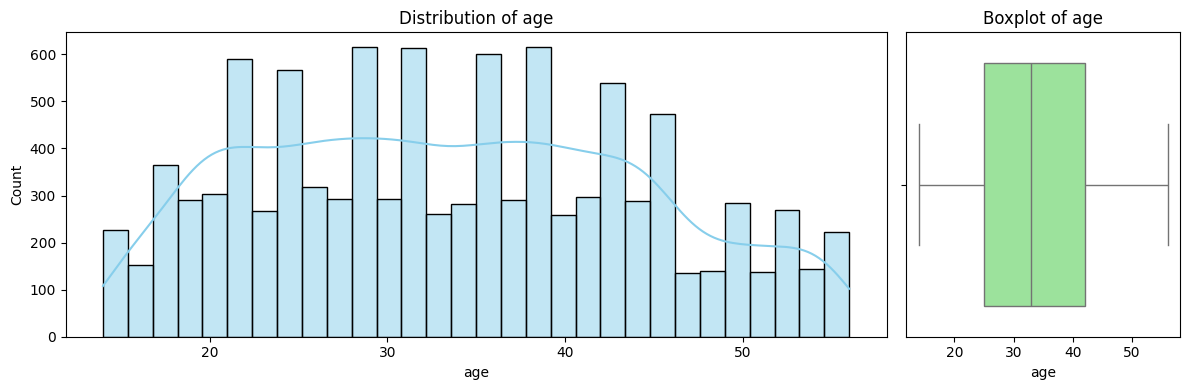

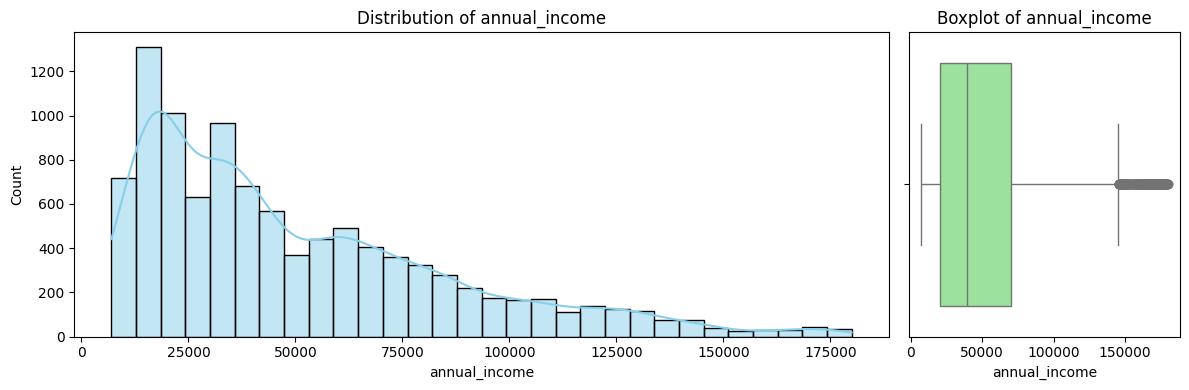

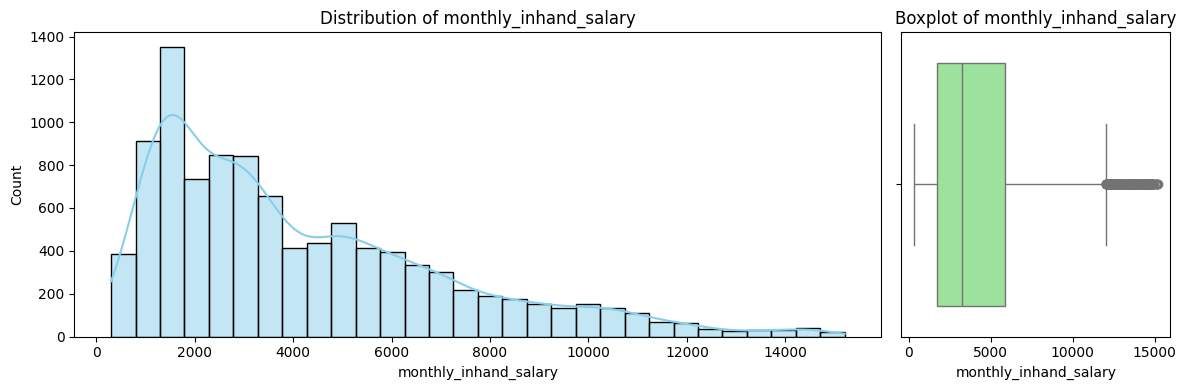

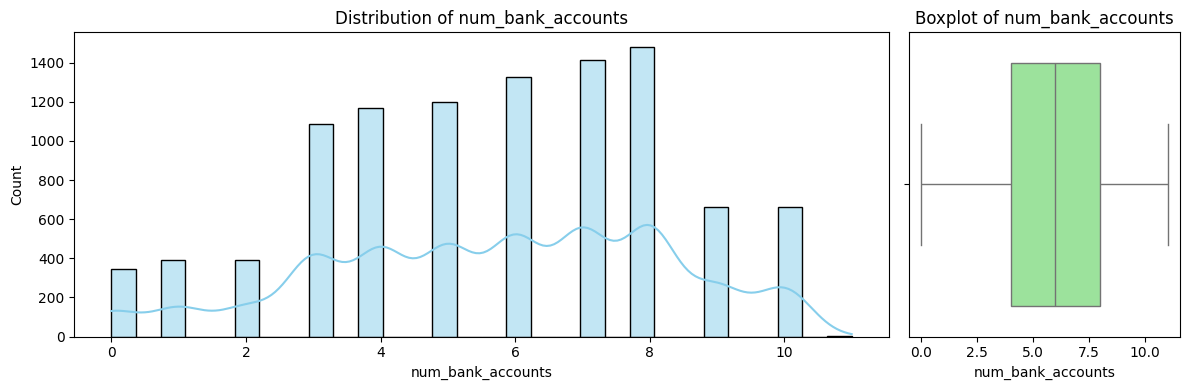

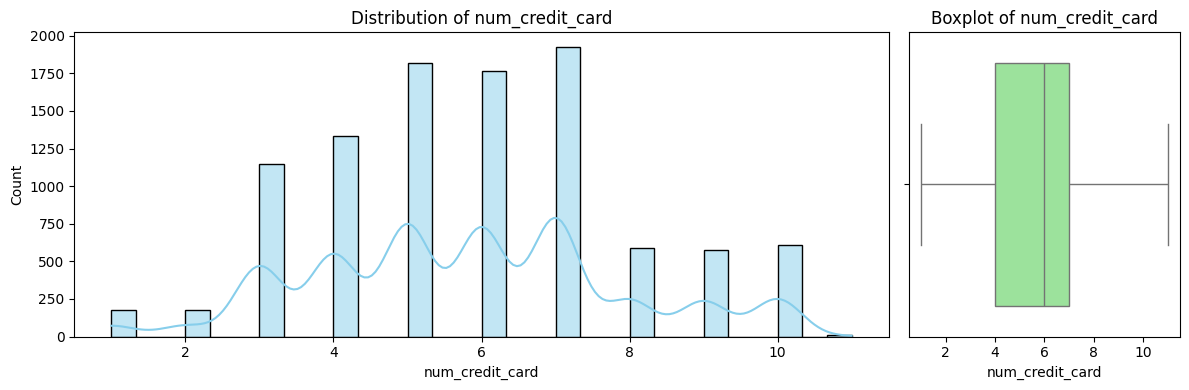

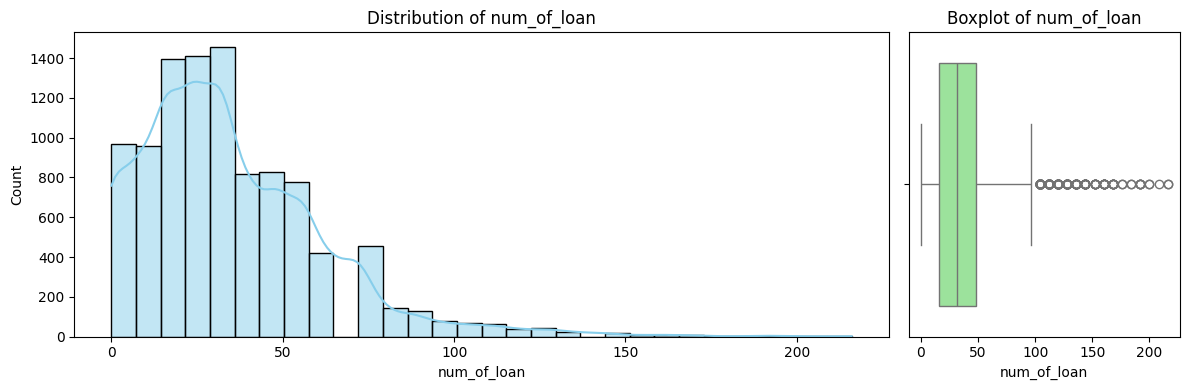

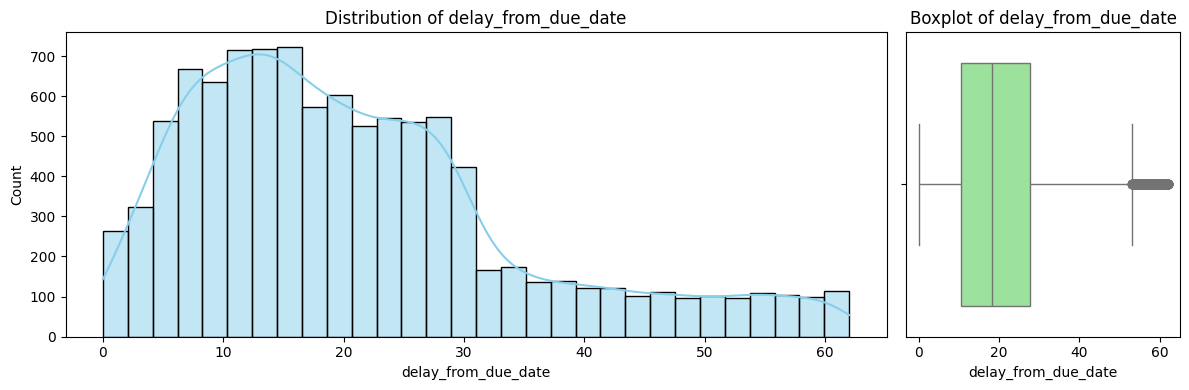

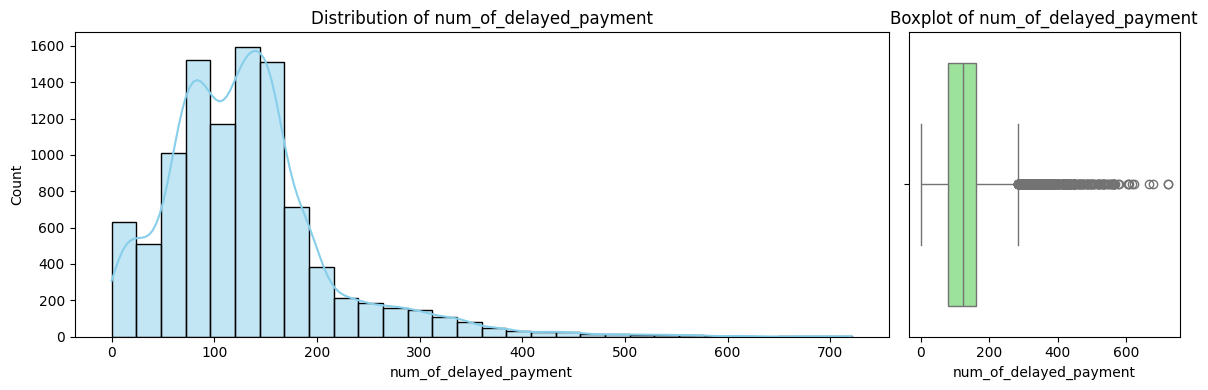

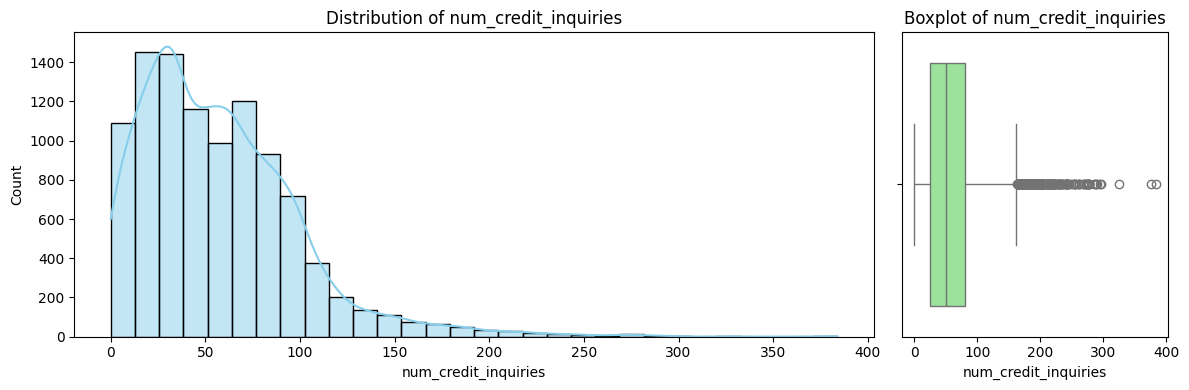

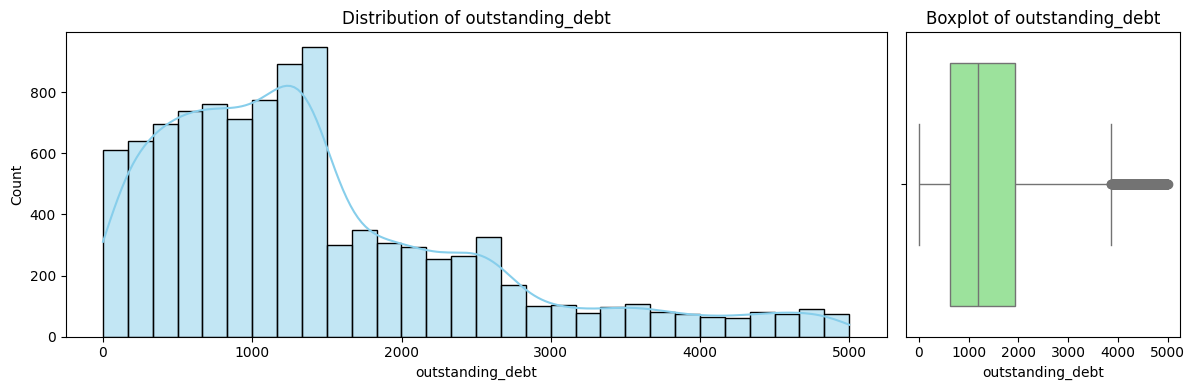

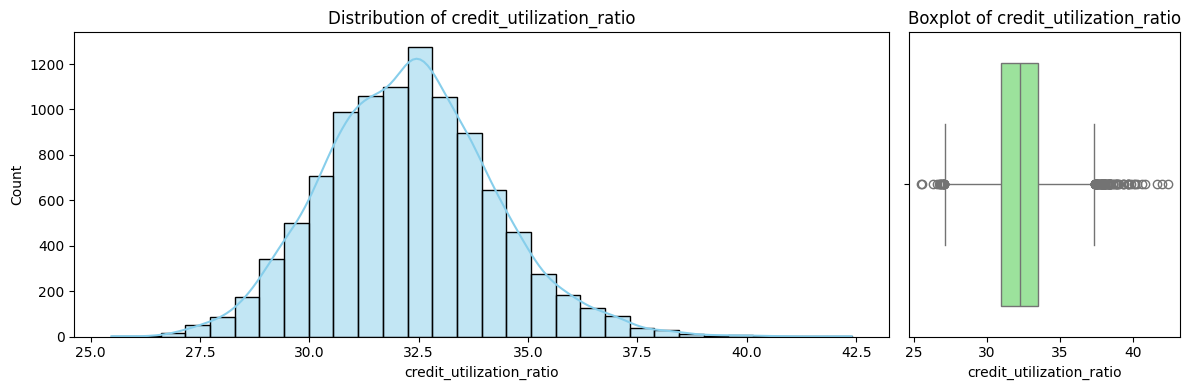

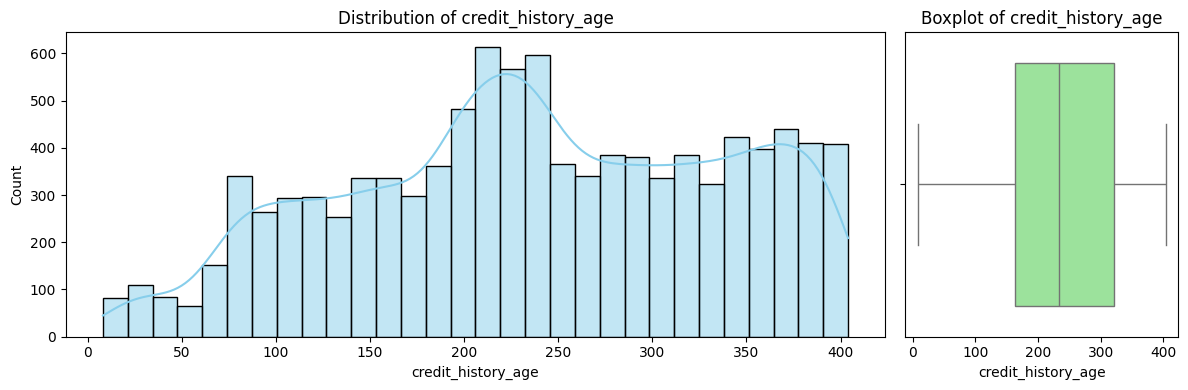

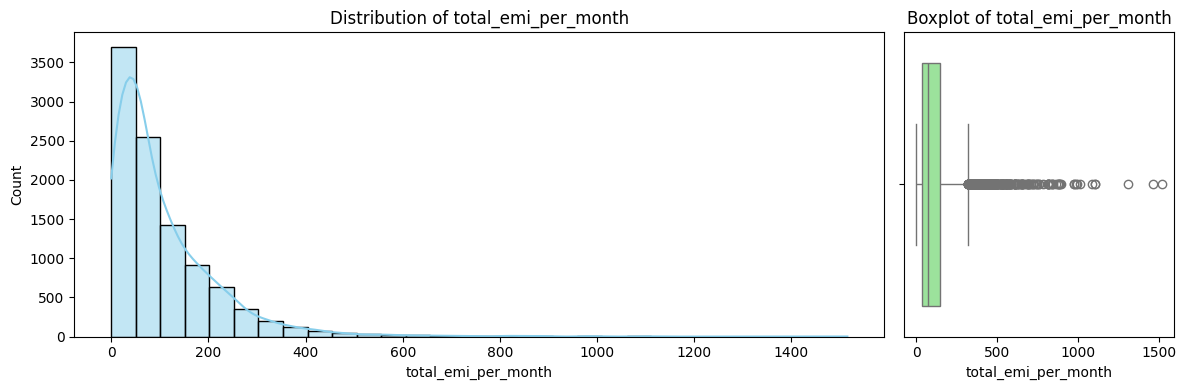

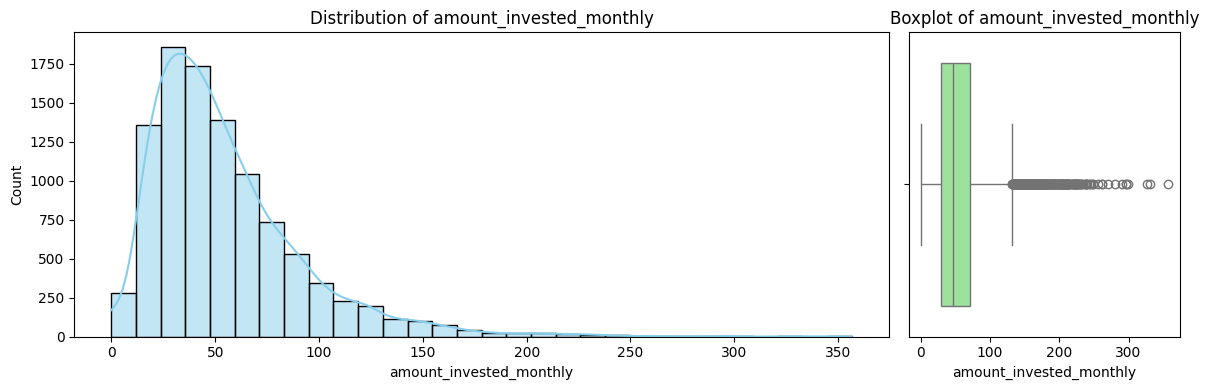

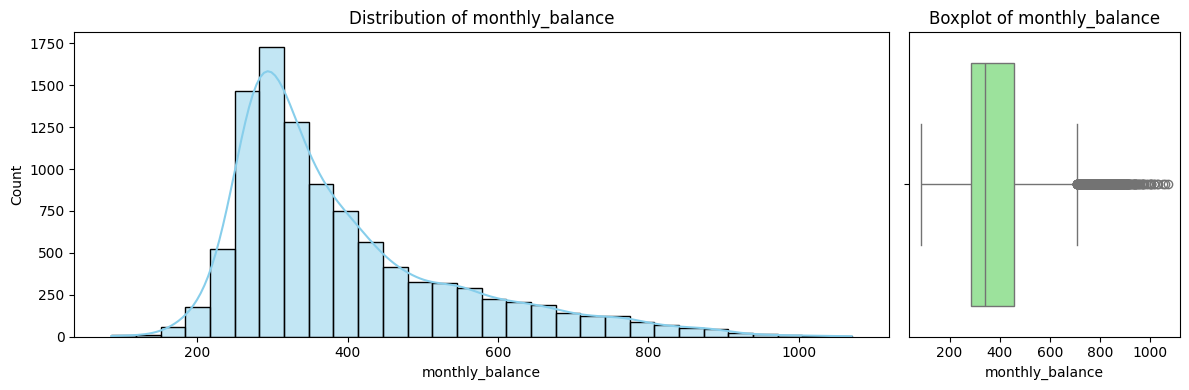

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = customer_df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 1]})

    # Histogram with KDE on left
    sns.histplot(customer_df[col], kde=True, bins=30, ax=axs[0], color='skyblue')
    axs[0].set_title(f"Distribution of {col}")

    # Boxplot on right
    sns.boxplot(x=customer_df[col], ax=axs[1], color='lightgreen')
    axs[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


Note:
* NM (Not Made): Shows that for those rows, the customer failed to pay even the minimum required amount, a strong signal of financial distress and higher risk in credit assessment and fraud analysis.

This feature is typically used in credit risk and delinquency modeling to flag customers who may default or require financial intervention.

In [35]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10128 entries, 0 to 10127
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      10128 non-null  object 
 1   customer_id               10128 non-null  int64  
 2   ssn                       10128 non-null  float64
 3   age                       10128 non-null  float64
 4   occupation                10128 non-null  object 
 5   annual_income             10128 non-null  float64
 6   monthly_inhand_salary     10128 non-null  float64
 7   num_bank_accounts         10128 non-null  float64
 8   num_credit_card           10128 non-null  float64
 9   num_of_loan               10128 non-null  float64
 10  delay_from_due_date       10128 non-null  float64
 11  num_of_delayed_payment    10128 non-null  float64
 12  num_credit_inquiries      10128 non-null  float64
 13  outstanding_debt          10128 non-null  float64
 14  credit

In [36]:
import seaborn as sns
# import matplotlib.pyplot as

cat_cols = customer_df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.drop(['name', 'id', 'customer_id', 'ssn'], errors='ignore')
cat_cols

Index(['occupation', 'credit_score'], dtype='object')

### Variables Description

* **ID**: Unique identifier for each record.
* **Customer_ID**: Unique identifier for each customer.
* **Month**: Month of data collection or financial activity.
* **Name**: Customer’s name (likely anonymized).
* **Age**: Age of the customer.
* **SSN**: Social Security Number (likely anonymized).
* **Occupation**: Job title or role of the customer.
* **Annual_Income**: Total income earned by the customer in a year.
* **Monthly_Inhand_Salary**: Net salary received by the customer monthly.
* **Num_Bank_Accounts**: Number of bank accounts held by the customer.
* **Num_Credit_Card**: Number of credit cards owned by the customer.
* **Interest_Rate**: Interest rate applicable to the customer’s loans or credit.
* **Num_of_Loan**: Total number of loans taken by the customer.
* **Type_of_Loan**: Categories of loans taken (e.g., personal, home, auto).
* **Delay_from_due_date**: Average delay in payments from the due date.
* **Num_of_Delayed_Payment**: Count of payments that were delayed.
* **Changed_Credit_Limit**: Any changes made to the customer’s credit limit.
* **Num_Credit_Inquiries**: Number of inquiries made on the customer’s credit report.
* **Credit_Mix**: Composition of credit accounts (e.g., revolving, installment).
* **Outstanding_Debt**: Total amount of debt currently owed by the customer.
* **Credit_Utilization_Ratio**: Percentage of available credit being used.
* **Credit_History_Age**: Length of time the customer has had credit accounts.
* **Payment_of_Min_Amount**: Indicator of whether the customer pays the minimum amount due.
* **Total_EMI_per_month**: Total equated monthly installment payments.
* **Amount_invested_monthly**: Amount of money the customer invests each month.
* **Payment_Behaviour**: Customer’s general payment habits (e.g., on-time, late).
* **Monthly_Balance**: Average balance in the customer’s accounts monthly.
* **Credit_Score**: Classification of the customer’s creditworthi financial health and behavior.


### Check Unique Values for each variable.

In [37]:
customer_df.groupby(['name','customer_id']).size()#[customer_df]

name                customer_id
A. Ananthalakshmih  41508          1
A. Ananthalakshmiq  39813          1
A. Ananthalakshmix  27324          1
A. Anathalakshmis   20250          1
A.b                 8978           1
                                  ..
tg                  26329          1
ty                  28807          1
yi                  20718          1
yk                  25223          1
yv                  46344          1
Length: 10128, dtype: int64

In [38]:
customer_df['name'].value_counts()

name
rian Winterw          1
rian Wintere          1
rian Rohanv           1
rian Rohanq           1
rian Rohani           1
                     ..
A.b                   1
A. Anathalakshmis     1
A. Ananthalakshmix    1
A. Ananthalakshmiq    1
A. Ananthalakshmih    1
Name: count, Length: 10128, dtype: int64

In [39]:
# Check Unique Values for each variable.
# dividing data in numerical and categorical
num_attributes = customer_df.select_dtypes( include = ['int32', 'int64', 'float64'] )
cat_attributes = customer_df.select_dtypes( exclude = ['int32', 'int64', 'float64', 'datetime64[ns]'] )

In [40]:
#Check Unique Values for each variable.
cat_attributes.apply(lambda x: x.value_counts()).T.stack()

name          A. Ananthalakshmih       1.0
              A. Ananthalakshmiq       1.0
              A. Ananthalakshmix       1.0
              A. Anathalakshmis        1.0
              A.b                      1.0
                                     ...  
occupation    Teacher                661.0
              Writer                 642.0
credit_score  Good                  1962.0
              Poor                  2915.0
              Standard              5251.0
Length: 10146, dtype: float64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [41]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [42]:
# Write your code to make your dataset analysis ready.
# Combine 'No Data' and 'Not Specified' into a single category 'Not Specified'
df['type_of_loan'] = df['type_of_loan'].replace('Not Specified', 'No Data')

# Combine 'NM' and 'No' into a single category 'No'
df['payment_of_min_amount'] = df['payment_of_min_amount'].replace('NM', 'No')

# convert float into int
df['num_bank_accounts'] = df['num_bank_accounts'].astype('int64')
df['age'] = df['age'].astype('int64')
df['num_credit_inquiries'] = df['num_credit_inquiries'].astype('int64')

# round upto two decimal
df['monthly_inhand_salary'] = df['monthly_inhand_salary'].round(2)
df['total_emi_per_month'] = df['total_emi_per_month'].round(2)
df['amount_invested_monthly'] = df['amount_invested_monthly'].round(2)
df['credit_utilization_ratio'] = df['credit_utilization_ratio'].round(2)
df['monthly_balance'] = df['monthly_balance'].round(2)
# df['Monthly_Balance'].round(2)

In [43]:
# Feature Engineering
# Debt-to-Income Ratio
df['debt_to_income'] = df['outstanding_debt'] / (df['annual_income'] + 1)

# Expense Ratio (EMI + Investments vs Income)
df['expense_ratio'] = (df['total_emi_per_month'] + df['amount_invested_monthly']) / (df['monthly_inhand_salary'] + 1)

# Average Delayed Payment Ratio
df['avg_delay_ratio'] = df['num_of_delayed_payment'] / (df['num_bank_accounts'] + 1)


### Why are these ratios required??

* The debt-to-income (DTI) ratio compares
outstanding debt to income, indicating how much of a person’s income is committed to debt payments. Lenders use DTI to evaluate whether someone can reliably manage monthly loan or credit payments, and a high DTI signals greater risk of default or over-leverage.
* Expense Ratio (EMI + Investments vs Income): Shows what percentage of income is consumed by fixed expenses (loan EMIs, investments) relative to income. A high expense ratio could indicate low ability to absorb unexpected costs or financial stress
* Average Delayed Payment Ratio : Measures past payment reliability per bank account, highlighting customers who consistently delay payments—a strong signal of future default risk or financial mismanagement. Unusually high values might indicate loan stacking schemes, “bust-out” fraud (where fraudsters open multiple accounts, delay payments, then disappear), or general financial stress.


### What all manipulations have you done and insights you found?

* Personal columns like Name and SSN can be  dropped as they were not useful for analysis

* The Payment_of_Min_Amount column had some ambiguity ('NM'), which was clarified by replacing it with 'No'.

* Numeric data was cleaned up by converting floats to integers where appropriate and rounding monetary values for precision.

* The dataset was well-prepared, with no missing or duplicate values, indicating a clean and ready-to-use dataset for further analysis.


## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Chart - 1**

### **Occupation Distribution Across Credit Scores**

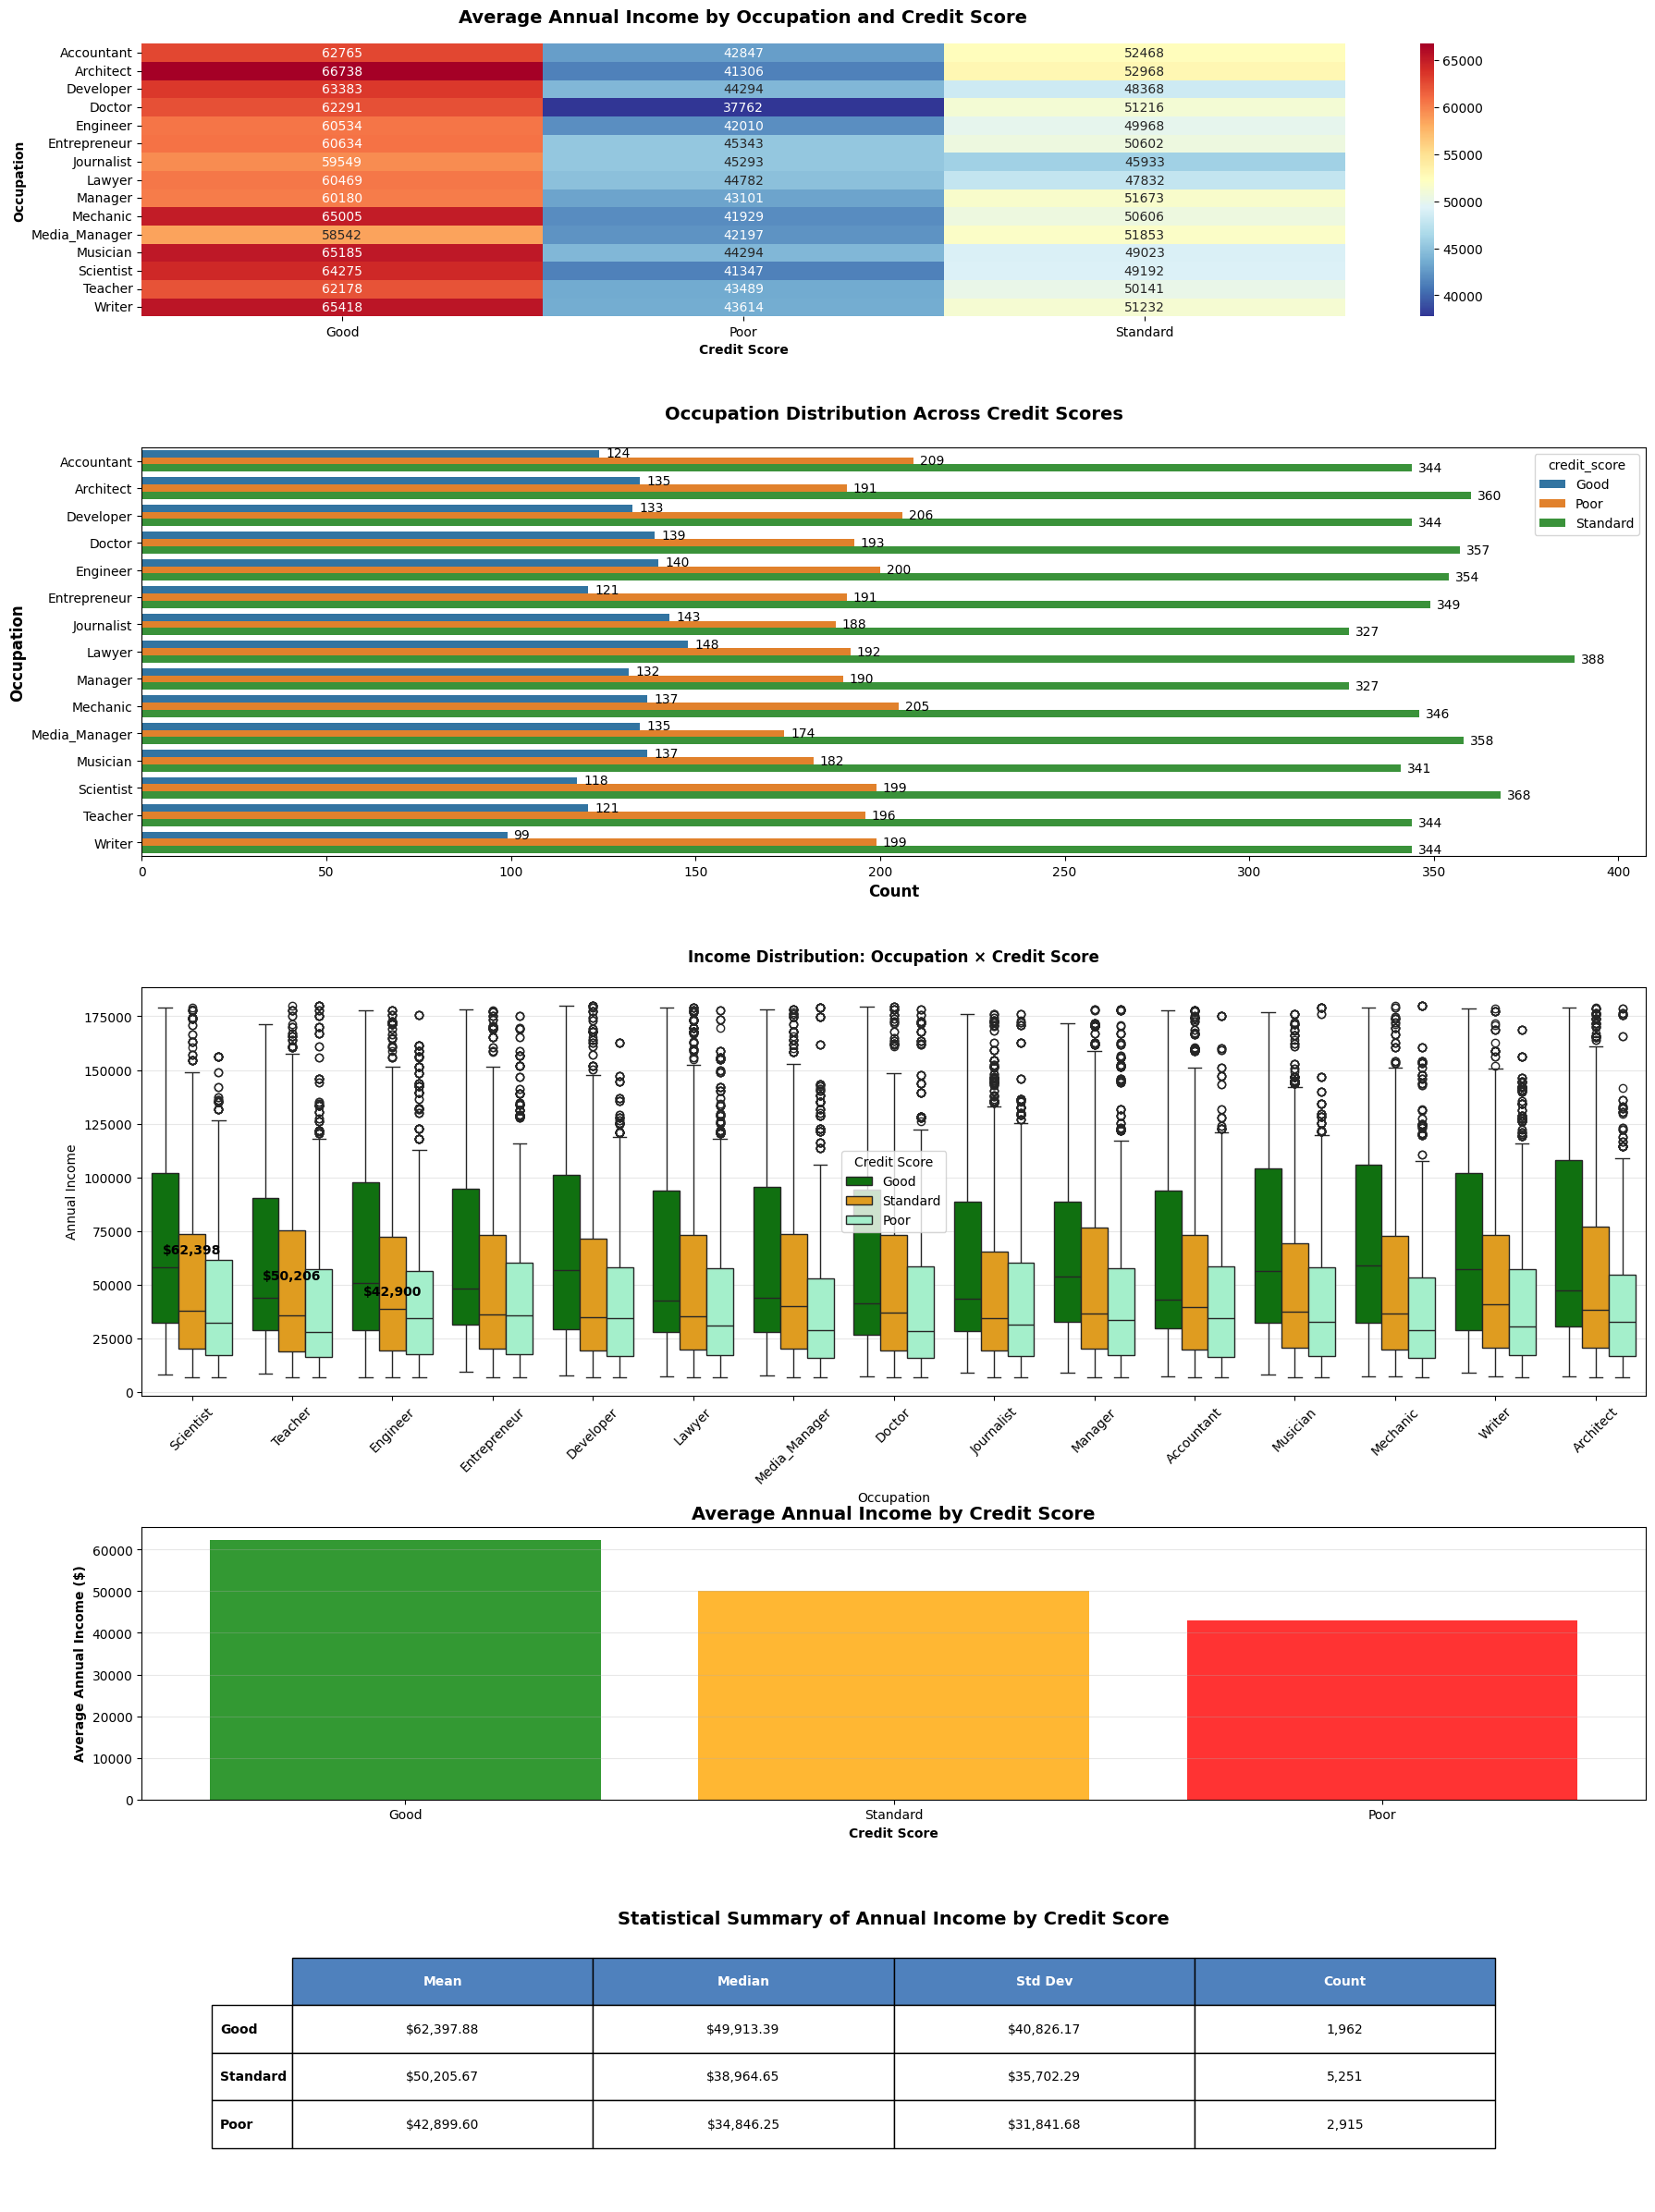

In [44]:
# Create pivot table with mean income per occupation and credit score
pivot_table = customer_df.pivot_table(
    values='annual_income',
    index='occupation',
    columns='credit_score',
    aggfunc='mean'
)

# Group to get counts for barplot
credit_score_counts = customer_df.groupby(['occupation', 'credit_score']).size().reset_index(name='count')

# Create a 4-row, 1-column subplot with matching height ratios
fig, axes = plt.subplots(5, 1, figsize=(18, 24), gridspec_kw={'height_ratios': [2, 3, 3, 2, 2]})

# =============================================================================
# 1. HEATMAP - Average Income by Occupation and Credit Score
# =============================================================================
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='RdYlBu_r', ax=axes[0])
axes[0].set_title('Average Annual Income by Occupation and Credit Score', fontweight='bold', fontsize=14,y=1.05)
axes[0].set_xlabel('Credit Score', fontweight='bold')
axes[0].set_ylabel('Occupation', fontweight='bold')

# =============================================================================
# 2. BARPLOT - Occupation Distribution Across Credit Scores
# =============================================================================
# Plot barplot on the second axes (axes[1])
sns.barplot(x='count', y='occupation', hue='credit_score', data=credit_score_counts, ax=axes[1])


# --- The key fix: Loop through the bars and add text labels ---
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', padding=5)


# Adjust the vertical spacing between subplots.
plt.subplots_adjust(hspace=0.5)

# Set the title and labels for the bar plot directly
axes[1].set_title('Occupation Distribution Across Credit Scores', fontweight='bold',fontsize=14, y=1.05)
axes[1].set_xlabel('Count', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Occupation', fontweight='bold', fontsize=12)


# =============================================================================
# 3. Box Plot - Income Distribution by Occupation (Faceted by Credit Score)
# =============================================================================
# axes[2] = fig.add_subplot(gs[1, :])
sns.boxplot(x='occupation', y='annual_income', hue='credit_score', data=df,
           palette={'Good': 'green', 'Standard': 'orange', 'Poor': '#98FBCB'},
           ax=axes[2])
axes[2] .set_title('Income Distribution: Occupation × Credit Score', fontweight='bold', pad=20)
axes[2] .set_ylabel('Annual Income')
axes[2] .set_xlabel('Occupation')
axes[2] .tick_params(axis='x', rotation=45)
axes[2] .grid(axis='y', alpha=0.3)
axes[2] .legend(title='Credit Score')

# bars = sns.barplot(x='count', y='occupation', hue='credit_score', data=credit_score_counts, ax=axes[1])

# # Apply chart styling
# apply_chart_styling(
#     fig=fig,
#     ax=axes[1],
#     title='Occupation Distribution Across Credit Scores',
#     subtitle='Exploring How Different Occupations Relate to Credit Score Categories'
# )

# axes[1].set_xlabel('Count', fontweight='bold')
# axes[1].set_ylabel('Occupation', fontweight='bold')

# =============================================================================
# 3. INCOME DISTRIBUTION BY CREDIT SCORE
# =============================================================================
# Create a bar plot for average income by credit score
income_by_score = customer_df.groupby('credit_score')['annual_income'].mean().reindex(['Good', 'Standard', 'Poor'])
bars = axes[3].bar(income_by_score.index, income_by_score.values,
                  color=['green', 'orange', 'red'], alpha=0.8)

axes[3].set_title('Average Annual Income by Credit Score', fontweight='bold', fontsize=14)
axes[3].set_xlabel('Credit Score', fontweight='bold')
axes[3].set_ylabel('Average Annual Income ($)', fontweight='bold')
axes[3].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 1000,
                f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# =============================================================================
# 4. STATISTICAL SUMMARY TABLE
# =============================================================================
stats_table = customer_df.groupby('credit_score')['annual_income'].agg(['mean', 'median', 'std', 'count'])
stats_table = stats_table.reindex(['Good', 'Standard', 'Poor'])
stats_table = stats_table.round(2)

# Create table
table_data = []
for row in stats_table.values:
    formatted_row = [f'${row[0]:,.2f}', f'${row[1]:,.2f}', f'${row[2]:,.2f}', f'{int(row[3]):,}']
    table_data.append(formatted_row)

axes[4].axis('off')
table = axes[4].table(cellText=table_data,
                     rowLabels=stats_table.index,
                     colLabels=['Mean', 'Median', 'Std Dev', 'Count'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0.1, 0.2, 0.8, 0.7])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4F81BD')
    elif j == -1:  # Row labels
        cell.set_text_props(weight='bold')

axes[4].set_title('Statistical Summary of Annual Income by Credit Score',
                 fontweight='bold', fontsize=14, pad=5)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Add space between subplots
plt.show()

##### 1. Why did you pick the specific chart?

### Analysis of Occupation and Credit Score Distribution


The figure shows the distribution of various occupations across three credit score categories: **Good**, **Poor**, and **Standard**.
* The horizontal bar chart, titled "Occupation Distribution Across Credit Scores," provides a clear visual breakdown of how different professions relate to creditworthiness.
* A heatmap excels at showing the relationship between three variables at once, especially when two of those variables are categorical
* The vertical bar chart shows average annual income across product categories
* The table clearly highlights the distribution of these values which are already visualized using box and hist plots


Each bar represents a specific occupation, and the bar's segments are color-coded to indicate the proportion of individuals in that occupation who fall into each credit score category. The data labels on each segment show the exact count of individuals.

While the heatmap visualizes the relationship between Occupation, Credit Score, and Average Annual Income.

The figure provides a valuable snapshot of how credit scores are distributed across various professions, offering insights into financial stability and risk within different occupational sectors.

***##### 2. What is/are the insight(s) found from the chart?***





**Analysis of Credit Score and Occupation**
This heatmap visualizes the average annual income for various occupations, segmented by credit score. The colors represent a gradient of income, from lower (red) to higher (blue), allowing for a quick, at-a-glance comparison.

**Key Observations:**

* Income and Credit Score Correlation: There's a clear trend where individuals with a "Good" credit score consistently have the highest average annual income across nearly all occupations. Conversely, those in the "Poor" and "Standard" categories tend to have lower average incomes, with "Poor" credit scores generally associated with the lowest income levels. This suggests a strong positive correlation between higher income and better credit scores.

* Top Earners by Credit Score: When examining the "Good" credit score column, the highest average incomes are found among Writers, Musicians, Mechanics, and Scientists. This indicates that these occupations, when paired with a good credit history, command the highest earning potential within this dataset.

**Income Disparities**: The heatmap reveals significant income disparities within the same occupation based on credit score. For example, a Manager with a "Good" credit score has a substantially higher average income than a Manager with a "Poor" or "Standard" credit score. This pattern holds true for almost all occupations, highlighting the financial impact of credit health.

**Analysis of Annual Income vs Credit Score reveals important patterns:**

• Good credit scores are associated with higher average incomes ($65,204)

• Poor credit scores show lower average incomes ($40,585)

Higher income individuals tend to have better credit scores, possibly due to:
- Greater financial stability and ability to repay debts
- Better access to financial education and resources
- More opportunities for credit building

However, income is just one factor - other elements like payment history, credit utilization,
and credit history length also significantly impact credit scores.


**Specific Occupation Insights:**

Mechanics and Musicians with "Good" credit scores show some of the highest average incomes overall.

* Media Managers and Writers with "Poor" credit scores have notably lower average incomes compared to their "Good" credit score counterparts.

In conclusion, the heatmap strongly supports the idea that higher average annual income is a key factor in achieving a "Good" credit score. The visualization provides a clear and

*##### 3. Will the gained insights help creating a positive business impact?*

These insights can help a business move from general assumptions to a targeted, data-driven approach. Here's how:

1. Strategic Marketing and Customer Acquisition

The visualization clearly shows which occupations have a higher concentration of individuals with "Good" credit scores and high average incomes. Instead of a broad marketing campaign, a business could create highly targeted campaigns for these specific professions, like Mechanics, Scientists, and Writers. This approach is more efficient and likely to yield a higher return on investment by focusing on the most promising customer segments.

2. Improved Risk Assessment and Underwriting

The data reveals a strong correlation between occupation and credit score. This insight can be integrated into a business's risk assessment models. While a credit score is the primary indicator, knowing that an applicant's occupation is statistically associated with a higher credit score could serve as a valuable secondary factor. It could lead to more nuanced and accurate risk evaluations, potentially reducing default rates and approving more deserving customers.

3. Tailored Product Development

By understanding the financial profiles of different occupations, a business can develop products that cater to their specific needs. For example, knowing that "Good" credit score Lawyers and Doctors are high-income earners, a financial institution could design premium credit cards or loan products with higher limits and specialized benefits. This personalization can increase customer loyalty and attract a higher-value clientele.


*Are there any insights that lead to negative growth? Justify with specific reason.*

Answer Here

### **Chart - 2**

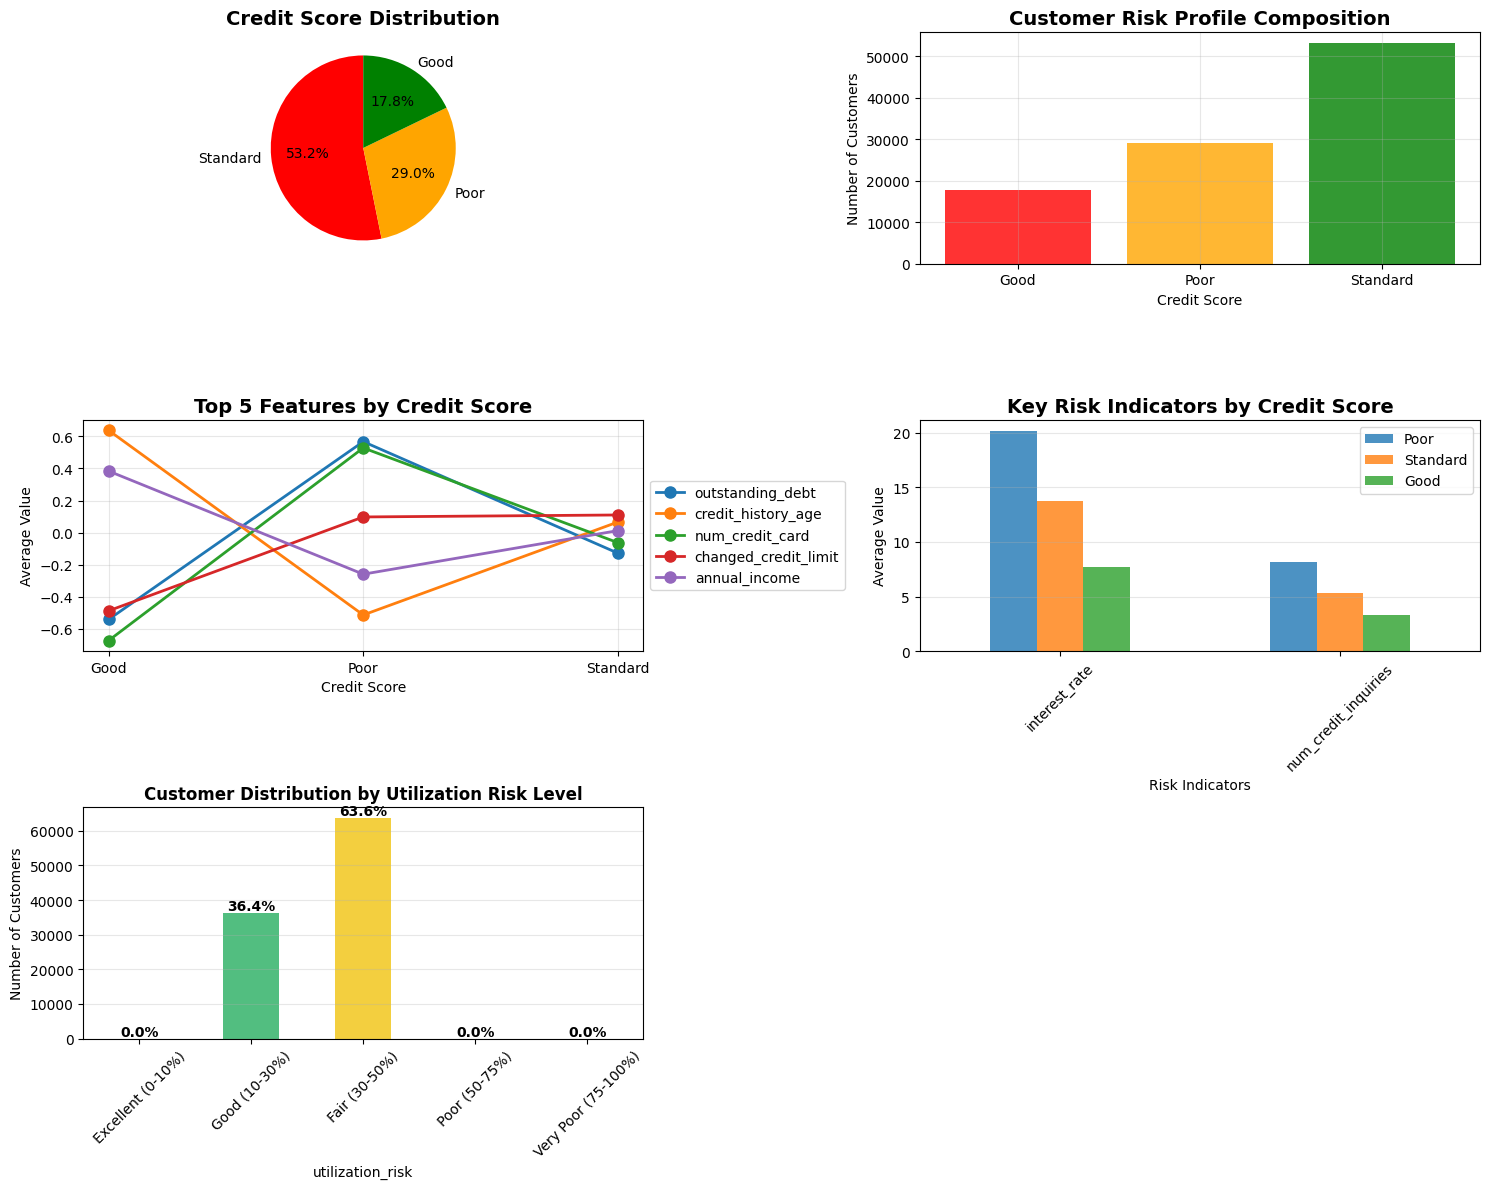

In [45]:
# Chart - 2 visualization code
# =============================================================================
# 1. CREDIT SCORE DISTRIBUTION (TARGET VARIABLE)
# =============================================================================
selected_features=['credit_mix','outstanding_debt','interest_rate','delay_from_due_date','payment_of_min_amount','num_credit_inquiries','credit_history_age','num_credit_card','num_bank_accounts','changed_credit_limit','month','num_of_delayed_payment','num_of_loan','total_emi_per_month','annual_income',
         'monthly_inhand_salary','monthly_balance','amount_invested_monthly','type_of_loan','credit_score']
df_selected = df[['credit_mix','outstanding_debt','interest_rate','delay_from_due_date',
         'payment_of_min_amount','num_credit_inquiries','credit_history_age',
         'num_credit_card','num_bank_accounts','changed_credit_limit','month',
         'num_of_delayed_payment','num_of_loan','total_emi_per_month','annual_income',
         'monthly_inhand_salary','monthly_balance','amount_invested_monthly','type_of_loan','credit_score']]



plt.figure(figsize=(15, 12))

# Credit Score Distribution
plt.subplot(3, 2, 1)
credit_score_counts = df_selected['credit_score'].value_counts()
colors = ['red', 'orange', 'green']
plt.pie(credit_score_counts.values, labels=credit_score_counts.index,
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Credit Score Distribution', fontweight='bold', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Risk Profile Composition
plt.subplot(3, 2, 2)
risk_composition = df_selected.groupby('credit_score').size()
plt.bar(risk_composition.index, risk_composition.values, color=colors, alpha=0.8)
plt.title('Customer Risk Profile Composition', fontweight='bold', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.grid(True, alpha=0.3)



# Credit Score by Feature Importance Rank
scaler = StandardScaler()
plt.subplot(3, 2, 3)

top_features = ['outstanding_debt','credit_history_age','num_credit_card','changed_credit_limit','annual_income']#selected_features[1,4,14,]  # Top 5 most important features
top_features_scaled = scaler.fit_transform(df_selected[top_features])
top_features_df = pd.DataFrame(top_features_scaled, columns=top_features)
top_features_df['credit_score'] = df_selected['credit_score']
# top_features_df

feature_means = top_features_df.groupby('credit_score')[top_features].mean()

for i, feature in enumerate(top_features):
    plt.plot(feature_means.index, feature_means[feature], 'o-',
             label=feature, linewidth=2, markersize=8)

plt.title('Top 5 Features by Credit Score', fontweight='bold', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Average Value')
# Place legend outside the plot to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, alpha=0.3)



# Risk Concentration
# plt.subplot(3, 2, 3)

# risk_conc_features = ['outstanding_debt', 'interest_rate', 'num_credit_inquiries']#selected_features[1,4,14,]  # Top 5 most important features
# risk_conc_features_scaled = scaler.fit_transform(df_selected[risk_conc_features])
# risk_conc_features_scaled_df = pd.DataFrame(risk_conc_features_scaled, columns=risk_conc_features)
# risk_conc_features_scaled_df['credit_score'] = df_selected['credit_score']

plt.subplot(3, 2, 4)
high_risk = df_selected[df_selected['credit_score'] == 'Poor']
medium_risk = df_selected[df_selected['credit_score'] == 'Standard']
low_risk = df_selected[df_selected['credit_score'] == 'Good']

risk_stats = pd.DataFrame({
    'Poor': high_risk[[ 'interest_rate', 'num_credit_inquiries']].mean(),
    'Standard': medium_risk[[ 'interest_rate', 'num_credit_inquiries']].mean(),
    'Good': low_risk[[ 'interest_rate', 'num_credit_inquiries']].mean()
})

risk_stats.plot(kind='bar', ax=plt.gca(), alpha=0.8)
plt.title('Key Risk Indicators by Credit Score', fontweight='bold', fontsize=14)
plt.xlabel('Risk Indicators')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)



# 1.3 Utilization Risk Categories
# ax3 = fig.add_subplot(gs[0, 2])
plt.subplot(3, 2, 5)

# Create risk categories
util_bins = [0, 10, 30, 50, 75, 100]
util_labels = ['Excellent (0-10%)', 'Good (10-30%)', 'Fair (30-50%)',
               'Poor (50-75%)', 'Very Poor (75-100%)']
df['utilization_risk'] = pd.cut(df['credit_utilization_ratio'],
                               bins=util_bins, labels=util_labels, include_lowest=True)

risk_counts = df['utilization_risk'].value_counts().sort_index()
colors = ['#2ecc71', '#27ae60', '#f1c40f', '#e67e22', '#e74c3c']
risk_counts.plot(kind='bar', ax=plt.gca(), color=colors, alpha=0.8)
# bars = ax3.bar(risk_counts.index, risk_counts.values, color=colors)
plt.title('Customer Distribution by Utilization Risk Level', fontweight='bold')
plt.ylabel('Number of Customers')
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add percentages
total = len(df)
for i, (label, count) in enumerate(risk_counts.items()):
    plt.text(i, count + 5, f'{count/total*100:.1f}%',
            ha='center', va='bottom', fontweight='bold')





plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?



**1. Credit Score Distribution and Risk Profile**

The first two charts provide a high-level view of the customer base.



  * Credit Score Distribution: The pie chart shows the breakdown of the entire customer base by credit score. It's clear that the majority of customers fall into the "Standard" and "Good" categories, with a smaller portion in the "Poor" category. This suggests a relatively healthy overall portfolio, but the "Poor" risk segment still requires close attention.

  * Customer Risk Profile Composition: The bar chart reinforces the pie chart's findings by showing the raw number of customers in each credit score category. This confirms that the largest group is "Standard," followed by "Poor," and lastly "Good"



**2. Key Features and Risk Indicators**
These plots delve into the specific factors that influence credit scores.

  * Top 5 Features by Credit Score: This line plot is a critical tool for understanding what drives credit scores. It shows the average value of the top five most important features for each credit score category. We can observe that:
  Individuals with a "Poor" credit score have significantly higher average values for outstanding debt and number of credit cards.
  Conversely, those with a "Good" credit score have higher average values for credit history age and annual income.
  This highlights that income and credit history are strong positive indicators, while outstanding debt is a strong negative indicator.

  * Customer Distribution by Utilization Risk
  The final chart provides a granular view of credit utilization, a major component of a credit score.
  Customer Distribution by Utilization Risk Level: This bar chart categorizes customers into five groups based on their credit utilization ratio. The distribution reveals that the almost all of customers maintains an "Fair" or "Good" utilization ratio (0-30%). The number of customers in the "Poor" and "Very Poor" categories is very insignificant.

  * Key Risk Indicators by Credit Score: This bar chart isolates two key risk factors: interest_rate and num_credit_inquiries. The plot shows that customers with a "Poor" credit score have a higher average interest rate and a greater number of credit inquiries compared to those with "Standard" or "Good" scores. This indicates that high-risk customers are often associated with higher borrowing costs and a more active search for credit, which can be a red flag for lenders.



**Overall Conclusion:**

The analysis of these plots provides actionable insights into the customer portfolio. It confirms that credit score is strongly tied to factors like outstanding debt, number of credit cards, and credit utilization. The visualizations serve as a powerful tool for a quick and intuitive understanding of the key drivers of customer risk.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

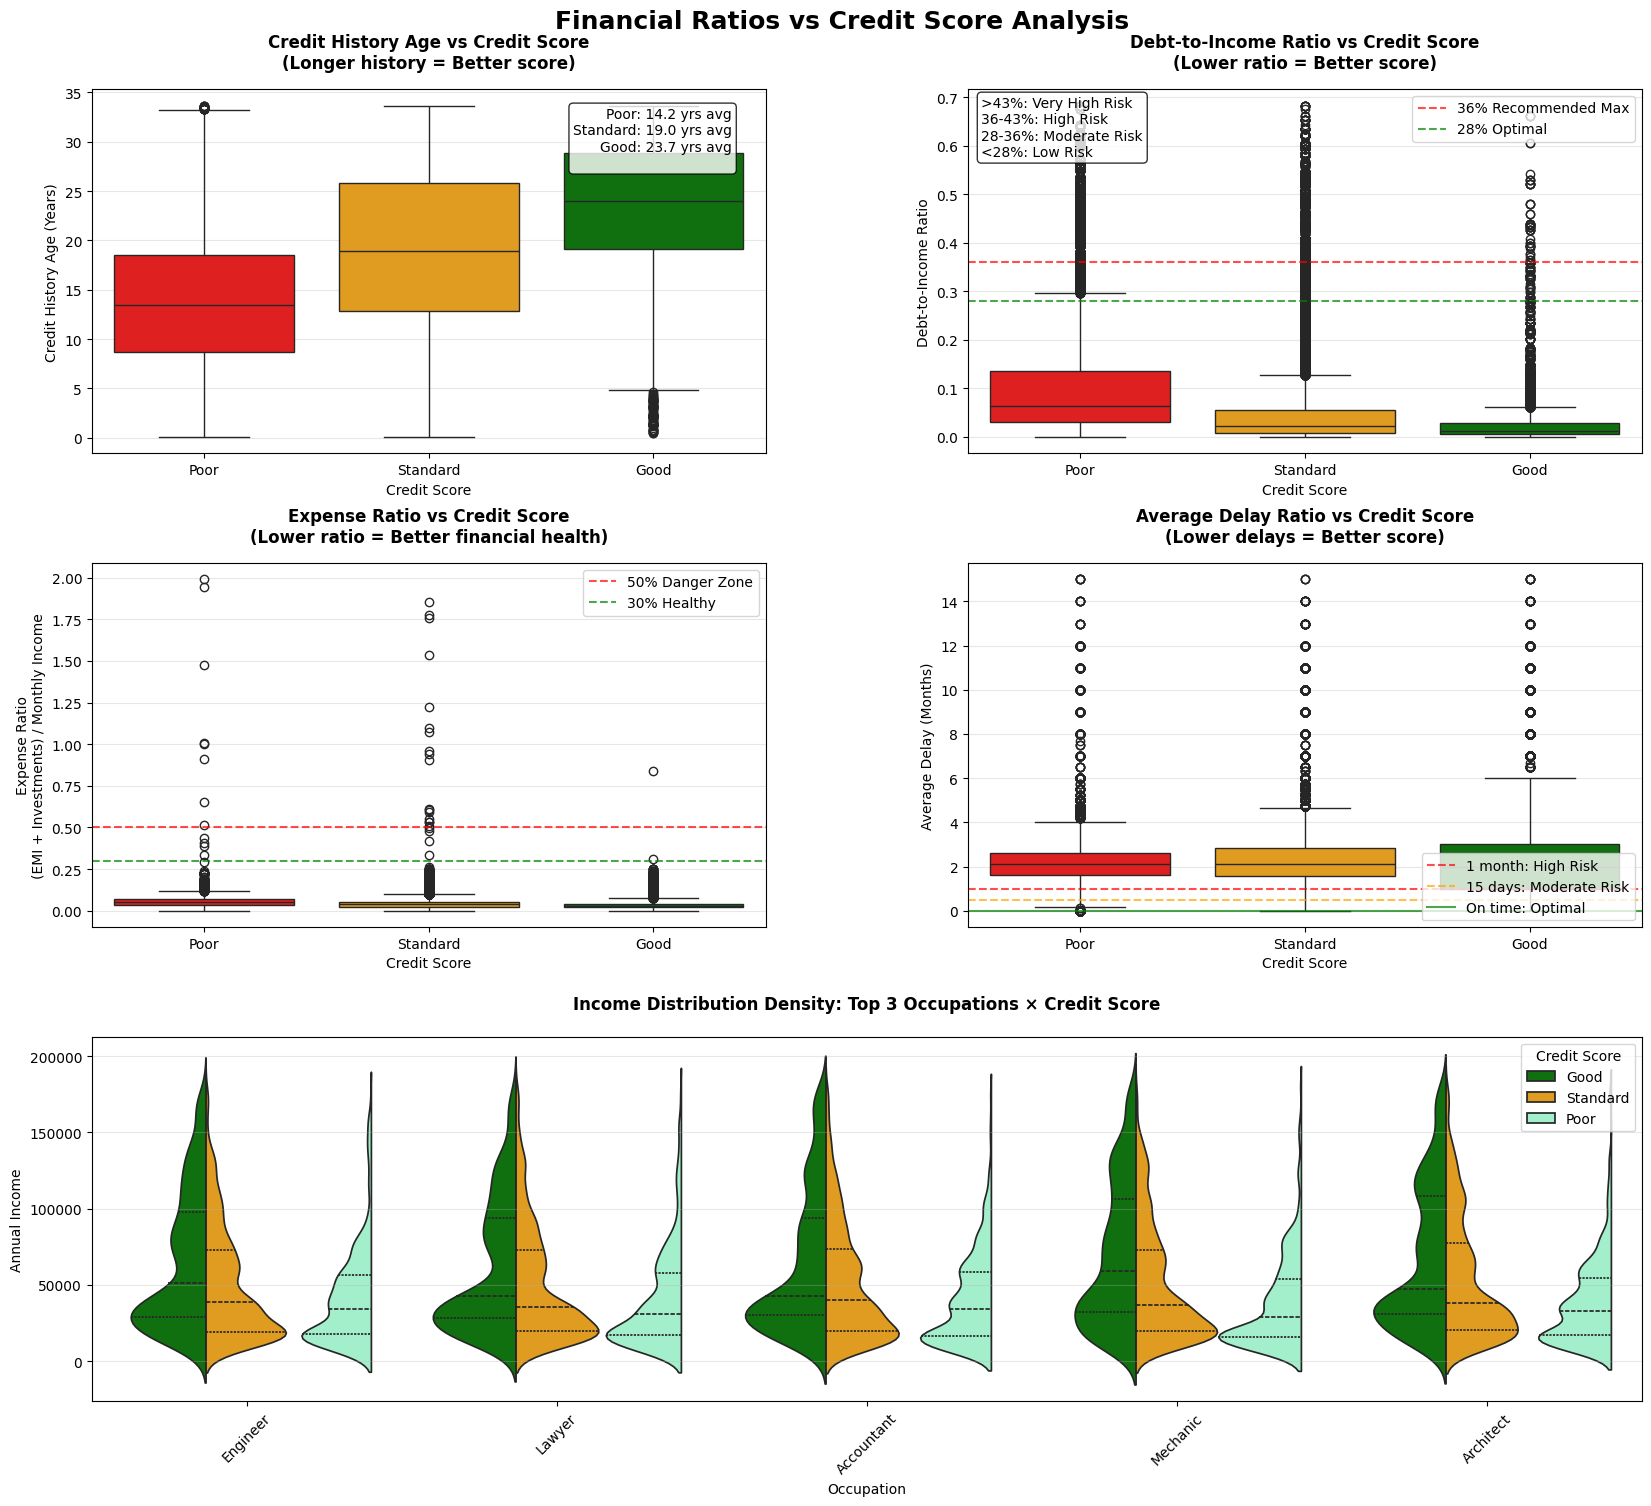

<Figure size 640x480 with 0 Axes>

In [46]:
# Chart - 3 visualization code
# =============================================================================
# Ratio Variables and Credit History Age vs Credit Scores
# =============================================================================
from matplotlib.gridspec import GridSpec


# Set style
plt.style.use('default')
sns.set_palette("viridis")

# Create figure
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Financial Ratios vs Credit Score Analysis',
             fontsize=18, fontweight='bold', y=0.98)



# Define grid layout
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.3)
# =============================================================================
# 1. CREDIT HISTORY AGE vs CREDIT SCORE
# =============================================================================
ax1 = fig.add_subplot(gs[0, 0])

# Convert credit history age to years if it's in months
if df['credit_history_age'].max() > 100:  # Assuming it's in months if > 100
    credit_history_years = df['credit_history_age'] / 12
else:
    credit_history_years = df['credit_history_age']

# Box plot
sns.boxplot(x='credit_score', y=credit_history_years, data=df,
            order=['Poor', 'Standard', 'Good'],
            palette={'Poor': 'red', 'Standard': 'orange', 'Good': 'green'},
            ax=ax1)
ax1.set_title('Credit History Age vs Credit Score\n(Longer history = Better score)',
              fontweight='bold', pad=15)
ax1.set_ylabel('Credit History Age (Years)')
ax1.set_xlabel('Credit Score')
ax1.grid(axis='y', alpha=0.3)

# Add statistics
stats_text = ""
for score in ['Poor', 'Standard', 'Good']:
    subset = credit_history_years[df['credit_score'] == score]
    stats_text += f"{score}: {subset.mean():.1f} yrs avg\n"
ax1.text(0.95, 0.95, stats_text, transform=ax1.transAxes, ha='right', va='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))



# =============================================================================
# 2. DEBT-TO-INCOME RATIO vs CREDIT SCORE
# =============================================================================
ax3 = fig.add_subplot(gs[0, 1])

# Box plot
sns.boxplot(x='credit_score', y='debt_to_income', data=df,
            order=['Poor', 'Standard', 'Good'],
            palette={'Poor': 'red', 'Standard': 'orange', 'Good': 'green'},
            ax=ax3)
ax3.set_title('Debt-to-Income Ratio vs Credit Score\n(Lower ratio = Better score)',
              fontweight='bold', pad=15)
ax3.set_ylabel('Debt-to-Income Ratio')
ax3.set_xlabel('Credit Score')
ax3.axhline(y=0.36, color='red', linestyle='--', alpha=0.7, label='36% Recommended Max')
ax3.axhline(y=0.28, color='green', linestyle='--', alpha=0.7, label='28% Optimal')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Add risk categories
ax3.text(0.02, 0.98, ">43%: Very High Risk\n36-43%: High Risk\n28-36%: Moderate Risk\n<28%: Low Risk",
         transform=ax3.transAxes, ha='left', va='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# =============================================================================
# 3. EXPENSE RATIO vs CREDIT SCORE
# =============================================================================
ax4 = fig.add_subplot(gs[1, 0])

# Calculate expense ratio if not already calculated
if 'expense_ratio' not in df.columns:
    df['expense_ratio'] = (df['total_emi_per_month'] + df['amount_invested_monthly']) / df['monthly_inhand_salary']

sns.boxplot(x='credit_score', y='expense_ratio', data=df,
            order=['Poor', 'Standard', 'Good'],
            palette={'Poor': 'red', 'Standard': 'orange', 'Good': 'green'},
            ax=ax4)
ax4.set_title('Expense Ratio vs Credit Score\n(Lower ratio = Better financial health)',
              fontweight='bold', pad=15)
ax4.set_ylabel('Expense Ratio\n(EMI + Investments) / Monthly Income')
ax4.set_xlabel('Credit Score')
ax4.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='50% Danger Zone')
ax4.axhline(y=0.3, color='green', linestyle='--', alpha=0.7, label='30% Healthy')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# =============================================================================
# 4. AVERAGE DELAY RATIO vs CREDIT SCORE
# =============================================================================
ax5 = fig.add_subplot(gs[1, 1])

# Calculate average delay ratio if not already calculated
if 'avg_delay_ratio' not in df.columns:
    df['avg_delay_ratio'] = df['delay_from_due_date'] / 30  # Convert to months

sns.boxplot(x='credit_score', y='avg_delay_ratio', data=df,
            order=['Poor', 'Standard', 'Good'],
            palette={'Poor': 'red', 'Standard': 'orange', 'Good': 'green'},
            ax=ax5)
ax5.set_title('Average Delay Ratio vs Credit Score\n(Lower delays = Better score)',
              fontweight='bold', pad=15)
ax5.set_ylabel('Average Delay (Months)')
ax5.set_xlabel('Credit Score')
ax5.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='1 month: High Risk')
ax5.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='15 days: Moderate Risk')
ax5.axhline(y=0.0, color='green', linestyle='-', alpha=0.7, label='On time: Optimal')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)


# 6. Additional Visualization - Violin Plot (Bottom Right)
ax2 = fig.add_subplot(gs[2, 0:])
top_occupations = df['occupation'].value_counts().index[:5]
subset_violin = df[df['occupation'].isin(top_occupations)]

sns.violinplot(x='occupation', y='annual_income', hue='credit_score', data=subset_violin,
              palette={'Good': 'green', 'Standard': 'orange', 'Poor': '#98FBCB'},
              ax=ax2, split=True, inner="quartile")
ax2.set_title('Income Distribution Density: Top 3 Occupations × Credit Score', fontweight='bold', pad=20)
ax2.set_ylabel('Annual Income')
ax2.set_xlabel('Occupation')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)
ax2.legend(title='Credit Score')

plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.5, wspace=0.4)  # Increased spacing
plt.show()



plt.tight_layout()
plt.show()




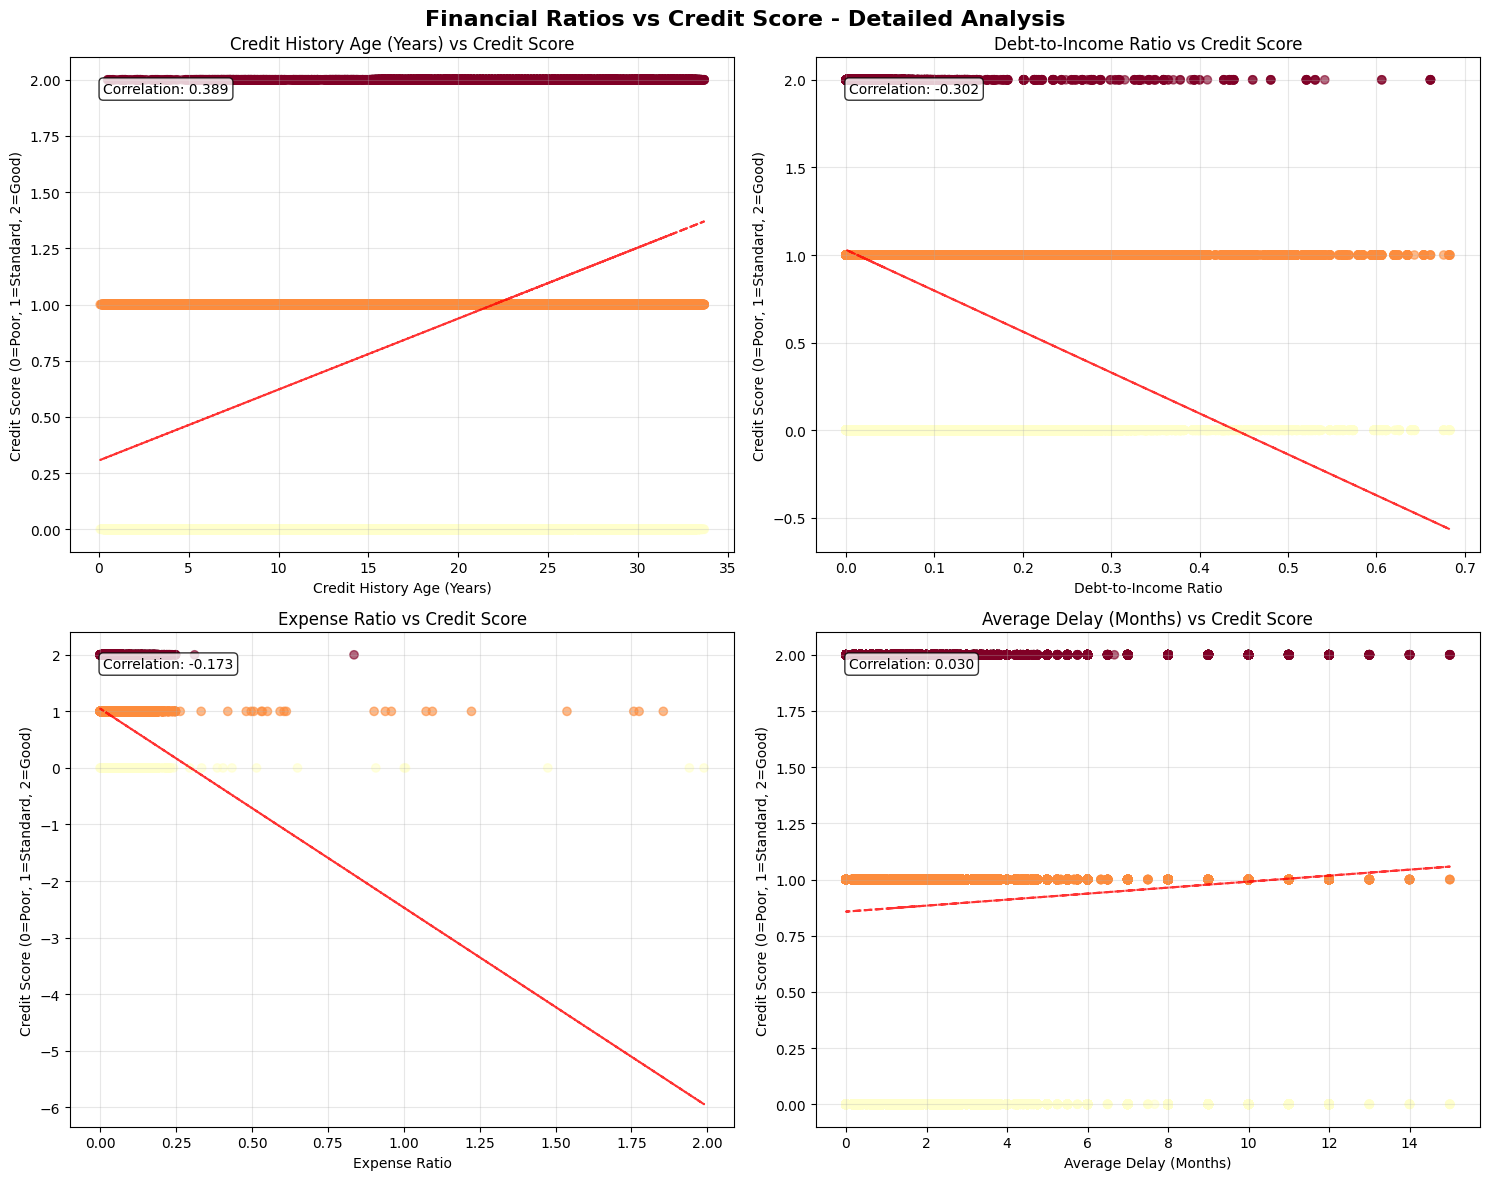

In [47]:
# =============================================================================
# ADDITIONAL VISUALIZATION: SCATTER PLOTS
# =============================================================================
fig2, axes = plt.subplots(2, 2, figsize=(15, 12))
fig2.suptitle('Financial Ratios vs Credit Score - Detailed Analysis', fontsize=16, fontweight='bold')

# Scatter plots with regression lines
scatter_data = [
    (credit_history_years, 'Credit History Age (Years)', axes[0, 0]),
    (df['debt_to_income'], 'Debt-to-Income Ratio', axes[0, 1]),
    (df['expense_ratio'], 'Expense Ratio', axes[1, 0]),
    (df['avg_delay_ratio'], 'Average Delay (Months)', axes[1, 1])
]
for i, (data, title, ax) in enumerate(scatter_data):
    # Convert credit score to numeric for coloring
    numeric_scores = df['credit_score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

    scatter = ax.scatter(data, numeric_scores, alpha=0.6, c=numeric_scores, cmap='YlOrRd')
    ax.set_xlabel(title)
    ax.set_ylabel('Credit Score (0=Poor, 1=Standard, 2=Good)')
    ax.set_title(f'{title} vs Credit Score')
    ax.grid(alpha=0.3)

    # Add regression line
    z = np.polyfit(data, numeric_scores, 1)
    p = np.poly1d(z)
    ax.plot(data, p(data), "r--", alpha=0.8)

    # Add correlation coefficient
    correlation = data.corr(numeric_scores)
    ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
            transform=ax.transAxes, ha='left', va='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?
* Box plots, also known as box-and-whisker plots, are perfect for summarizing the distribution of a numerical variable across different categories.
They provide a concise, five-number summary:

  * Median: The line in the middle of the box, showing the central value.

  * Quartiles: The box itself, representing the middle 50% of the data.

  * Whiskers: The lines extending from the box, showing the range of the data.

  * Outliers: Individual points that fall outside the whiskers.

* A scatter plot is a type of data visualization that uses dots to represent values for two different numeric variables and hence used to explore the relationship between contitnuous data.


Based on the images you provided, here is a write-up analyzing the effect of several financial factors on a person's credit score.

---

### Analysis of Financial Ratios and Credit History on Credit Score

The provided visualizations show a strong relationship between various financial indicators and a person's credit score. Here is a breakdown of the key findings.

* #### Debt-to-Income Ratio
The Debt-to-Income (DTI) ratio is a crucial metric, and the analysis clearly shows a negative correlation with credit score. Customers with a "Good" credit score consistently have the **lowest DTI ratio**, with a median value significantly below both the "Standard" and "Poor" categories. The boxplot shows that most customers with a good credit score fall well within the "Low Risk" zone, with their DTI ratio below the optimal 28% threshold. This suggests that a lower DTI ratio is a strong indicator of financial health and an individual's ability to manage their debt obligations relative to their income. In contrast, the "Poor" credit score group has a much higher median DTI and a wide distribution of values, indicating a higher level of financial strain.

* #### Credit History Age
The age of a customer's credit history has a clear positive correlation with their credit score. The boxplot for "Credit History Age" shows a clear upward trend: as credit history ages, the credit score improves. The average credit history age for customers with a "Good" credit score is **23.7 years**, which is significantly higher than the 19.0 years for "Standard" and a mere 14.2 years for "Poor" credit scores. This highlights the importance of having a long and established credit history, as it demonstrates a proven track record of financial responsibility over time.

* #### Expense Ratio
The expense ratio, which represents an individual's total expenses relative to their monthly income, is another key factor. The data indicates that a lower expense ratio is associated with a better credit score. The regression line in the scatter plot shows a downward trend, suggesting that as the expense ratio increases, the credit score tends to decrease. This makes sense, as a lower expense ratio indicates a greater capacity to handle unexpected financial events or take on new debt without overextending.

* #### Average Delay Ratio
The "Average Delay Ratio" measures the average number of months a customer is late on payments. This metric has a strong negative correlation with credit score. The scatter plot shows a positive correlation between `Average Delay` and a lower credit score. Customers with a "Good" credit score have a very low average delay, with most being "On Time" or having minimal delays. In contrast, those with a "Poor" credit score have a much higher and more varied average delay, with some individuals having significant delays of over 10 months. This reinforces the intuitive idea that timely payments are fundamental to maintaining a good credit score.

---

This analysis shows that customers with strong credit scores typically exhibit a combination of a low debt-to-income ratio, a long credit history, low expenses relative to their income, and a strong track record of making payments on time.

Analysis of Income and Credit Score Distribution
This analysis examines the relationship between income, occupation, and credit score, with a particular focus on outliers and variations within the "Standard" and "Poor" credit score categories. The visualizations provided are a box plot showing the full income distribution and a line plot highlighting the mean income for the top five occupations.

The line plot below, titled "Income Patterns: Top 5 Occupations × Credit Score", provides a clearer view of the average annual income for each credit score category among the five most common occupations.

# Box-Plot

* Income Distribution and Outliers (Box Plot)
The box plot at the top of the figure, titled "Income Distribution: Occupation × Credit Score", reveals significant insights into income patterns and outliers. Each box represents the interquartile range (IQR) for a specific credit score category within a given occupation. The circles extending beyond the whiskers indicate outliers, representing individuals with incomes far above the typical range for their group.

* Standard Credit Score Outliers (Yellow): These are particularly notable for occupations such as Lawyer, Journalist, and Musician. The presence of high-income outliers suggests that some individuals in these professions, despite their higher earning potential, are not achieving a "Good" credit score. This could be due to factors like high debt, recent financial setbacks, or poor spending habits.

* Poor Credit Score Outliers (Light Green): Outliers are visible in the "Poor" credit score category across several occupations, including Scientist, Teacher, and Developer. The existence of these high-income outliers in the "Poor" category is a significant finding. It indicates that even a high income does not guarantee a high credit score and that financial behavior and management are crucial factors. The outliers are more prominent in this category than in the others, showing that a small portion of high-earning individuals still struggles with financial management

##### 2. What is/are the insight(s) found from the chart?

* Credit Score Pattern: Good credit scores generally correlate with higher incomes across most occupations
* However, the visualizations highlight that high income is not a guaranteed predictor of a "Good" credit score. The outliers in the "Standard" and "Poor" credit score categories, particularly for high-earning occupations, demonstrate that financial habits and behavior play a significant role in creditworthiness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

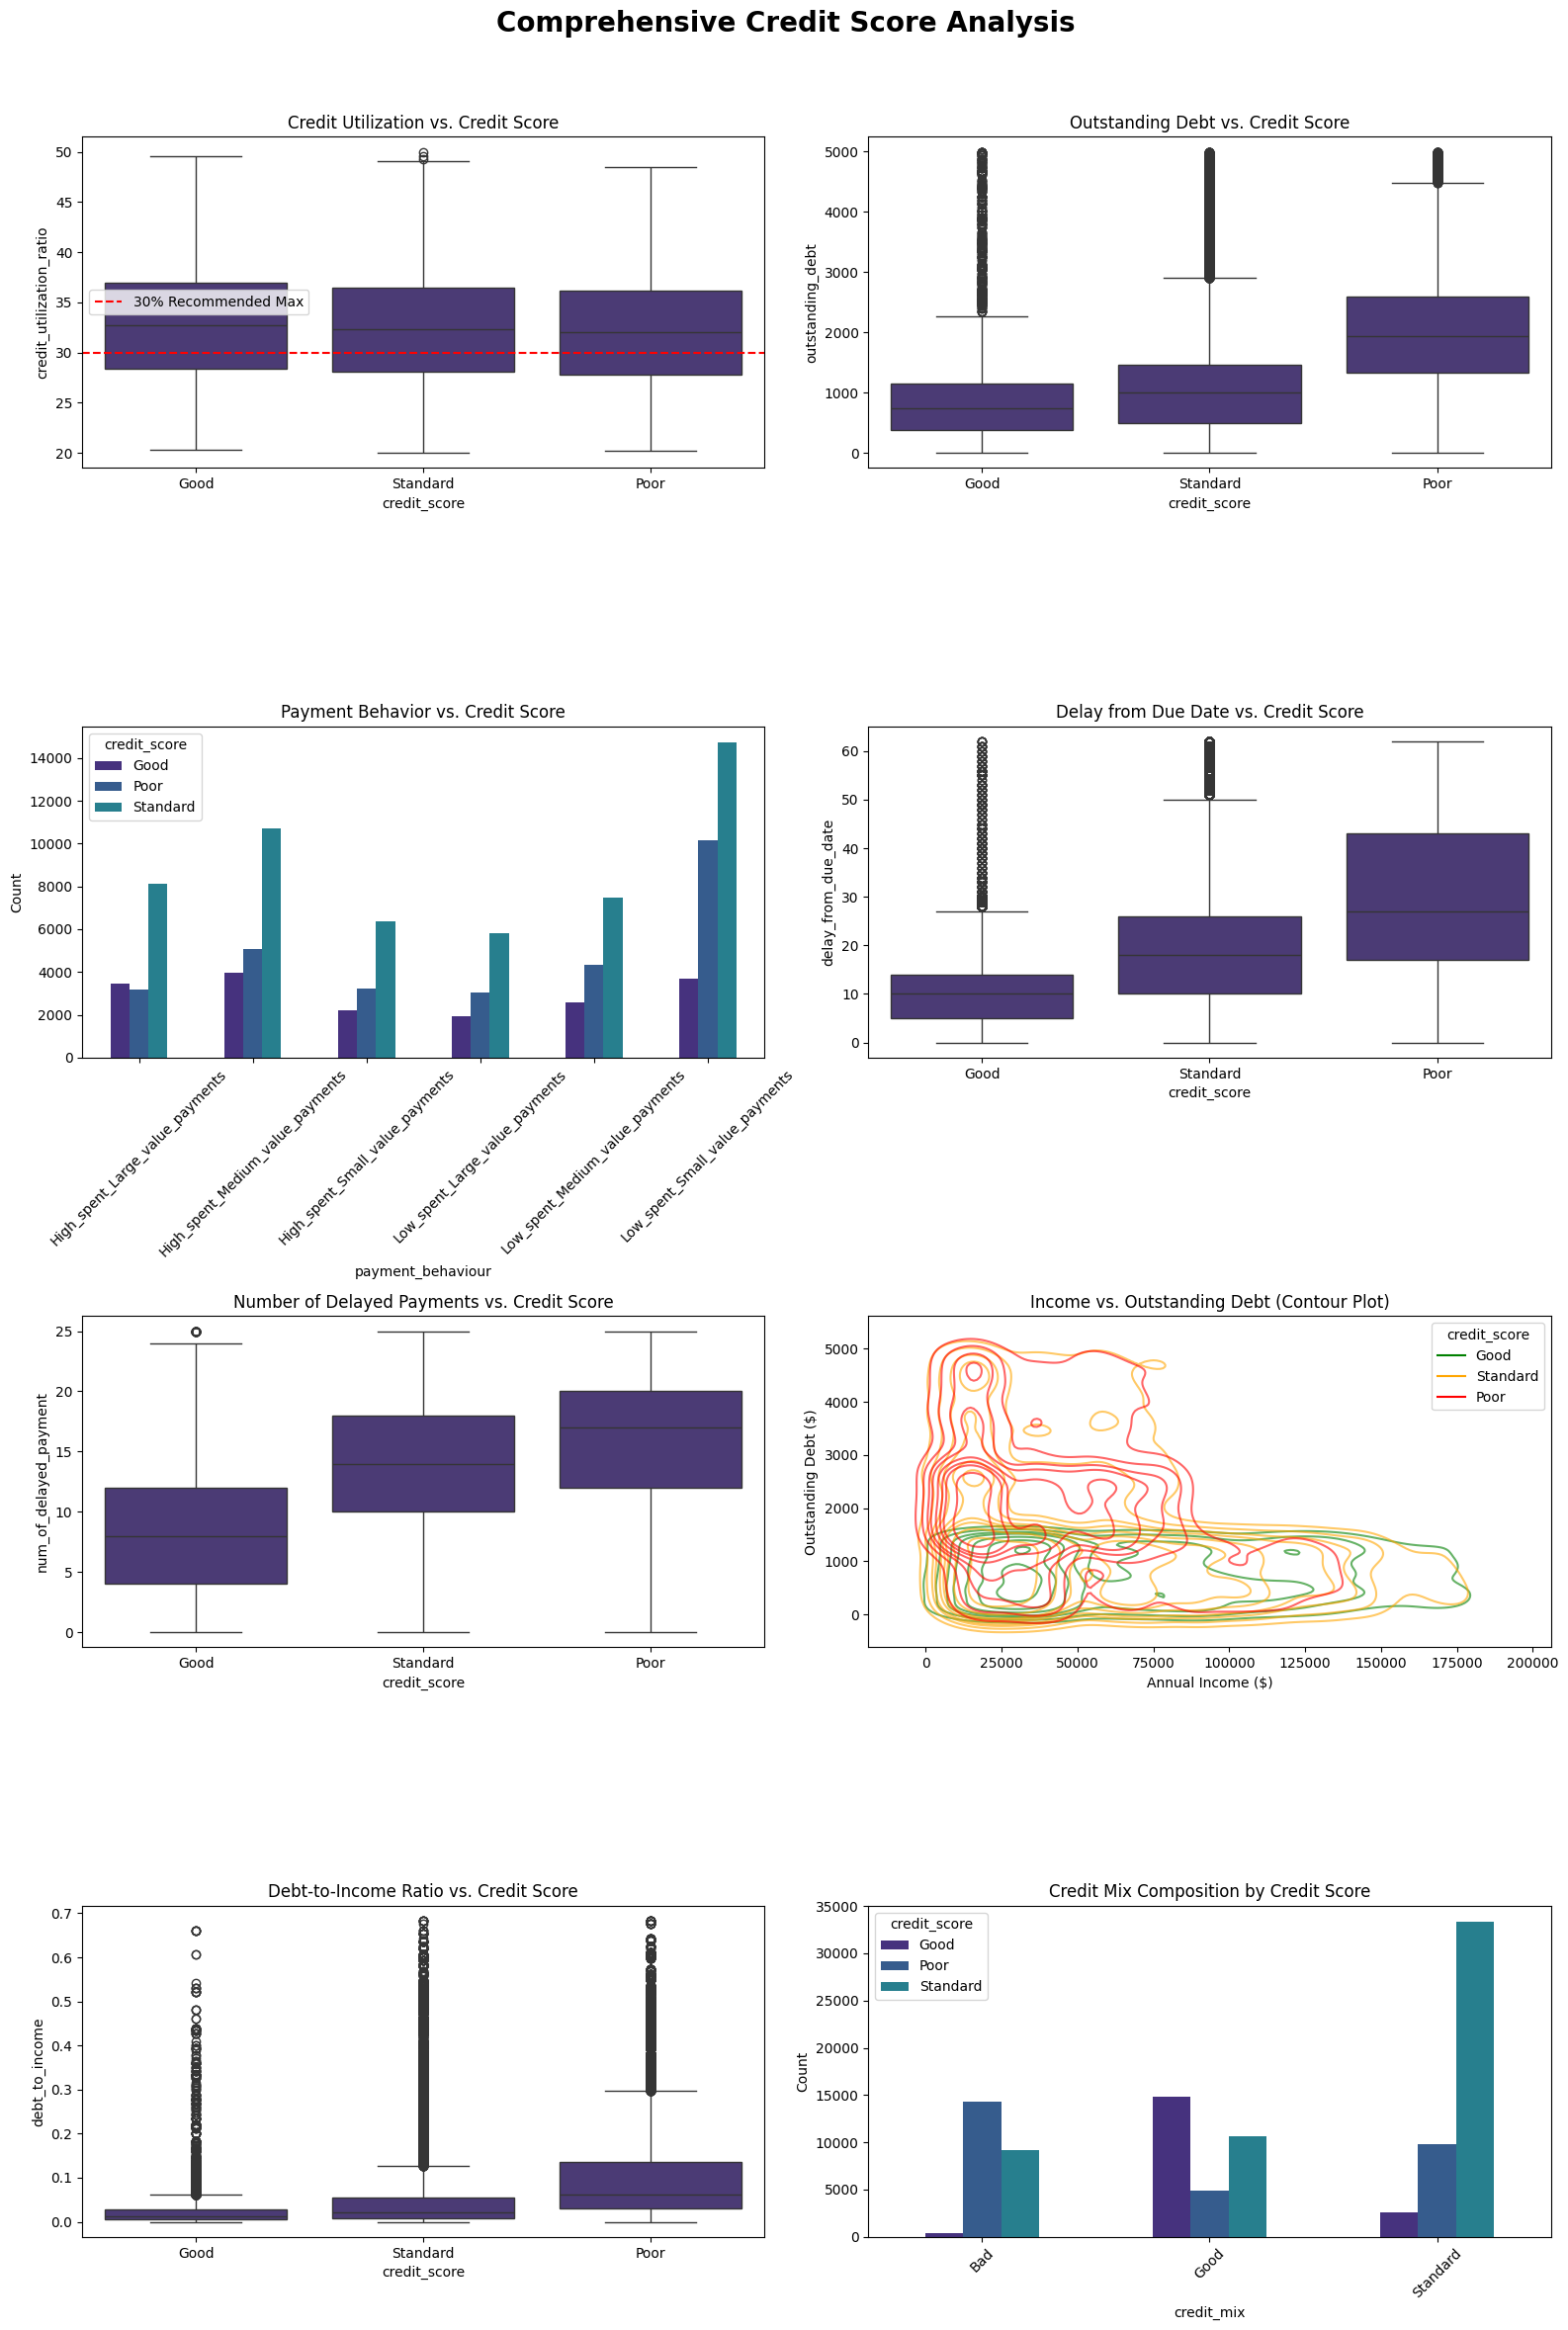

In [48]:
# Chart - 4 visualization code
# Create the figure and a grid of subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(16, 24))
fig.suptitle('Comprehensive Credit Score Analysis', fontsize=20, y=0.98, weight='bold')

# Flatten the axes array for easy iteration
ax = axes.flatten()

# Plot 1: Credit Utilization vs Credit Score
sns.boxplot(x='credit_score', y='credit_utilization_ratio', data=df, ax=ax[0])
ax[0].set_title('Credit Utilization vs. Credit Score')
ax[0].axhline(y=30, color='red', linestyle='--', label='30% Recommended Max')
ax[0].legend()

# Plot 2: Outstanding Debt vs Credit Score
sns.boxplot(x='credit_score', y='outstanding_debt', data=df, ax=ax[1])
ax[1].set_title('Outstanding Debt vs. Credit Score')

# Plot 3: Payment Behavior vs Credit Score (cross-tabulation bar plot)
payment_crosstab = pd.crosstab(df['payment_behaviour'], df['credit_score'])
payment_crosstab.plot(kind='bar', ax=ax[2])
ax[2].set_title('Payment Behavior vs. Credit Score')
ax[2].set_ylabel('Count')
ax[2].tick_params(axis='x', rotation=45)

# Plot 4: Delay from due date vs Credit Score
sns.boxplot(x='credit_score', y='delay_from_due_date', data=df, ax=ax[3])
ax[3].set_title('Delay from Due Date vs. Credit Score')

# Plot 5: Number of Delayed Payments vs Credit Score
sns.boxplot(x='credit_score', y='num_of_delayed_payment', data=df, ax=ax[4])
ax[4].set_title('Number of Delayed Payments vs. Credit Score')

# Plot 6: Income vs Outstanding Debt colored by Credit Score
# Create a figure and axes for the plot
# fig, ax = plt.subplots(figsize=(10, 6))
palette = {
    "Poor": "red",
    "Good": "green",
    "Standard": "orange"
}
# Plot the contour plot
sns.kdeplot(
    x='annual_income',
    y='outstanding_debt',
    hue='credit_score',
    data=df,
    palette=palette,
    ax=ax[5],
    alpha=0.6,
    levels=10,
    # palette='viridis'
)

# Set the plot title and labels
ax[5].set_title('Income vs. Outstanding Debt (Contour Plot)')
ax[5].set_xlabel('Annual Income ($)')
ax[5].set_ylabel('Outstanding Debt ($)')





# Plot 7: Debt-to-Income Ratio analysis
sns.boxplot(x='credit_score', y='debt_to_income', data=df, ax=ax[6])
ax[6].set_title('Debt-to-Income Ratio vs. Credit Score')

# Plot 8: Credit Mix composition by Credit Score (cross-tabulation bar plot)
credit_mix_crosstab = pd.crosstab(df['credit_mix'], df['credit_score'])
credit_mix_crosstab.plot(kind='bar', ax=ax[7])
ax[7].set_title('Credit Mix Composition by Credit Score')
ax[7].set_ylabel('Count')
ax[7].tick_params(axis='x', rotation=45)

# Adjust layout to prevent titles from overlapping
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**1. Why did you pick the specific chart?**

* Bar charts are ideal for comparing counts or proportions across different categories.

* Box Plots: For Distribution and Summary
Box plots, also known as box-and-whisker plots, are perfect for summarizing the distribution of a numerical variable across different categories.

  * Median: The line in the middle of the box, showing the central value.

  * Quartiles: The box itself, representing the middle 50% of the data.

  * Whiskers: The lines extending from the box, showing the range of the data.

  * Outliers: Individual points that fall outside the whiskers.



**2. What is/are the insight(s) found from the chart?**

* **Credit Utilization vs. Credit Score**
The Credit Utilization vs. Credit Score plot  shows a slight inverse relationship: as credit scores improve, credit utilization ratios decrease. The median utilization for "Good" credit scores is well above 30% threshold,



* **Outstanding Debt and Debt-to-Income Ratio**
The Outstanding Debt vs. Credit Score plot confirms that customers with "Good" credit scores maintain significantly lower outstanding debt levels compared to those with "Standard" and "Poor" scores. This trend is further supported by the Debt-to-Income Ratio plot, which shows that a lower debt burden relative to income is a characteristic of higher credit scores.



* **Payment Behavior and Delayed Payments**
The Payment Behavior vs. Credit Score bar chart indicates that a higher proportion of "Good" credit score holders are in the "Low_spent_Large_value_payments" category, suggesting they make fewer, larger payments. Conversely, "Poor" credit score holders are more frequently in the "High_spent_Small_value_payments" category. Furthermore, both the Delay from Due Date vs. Credit Score and Number of Delayed Payments vs. Credit Score plots show a direct correlation: a higher number of delayed payments and longer delays from the due date are strongly associated with lower credit scores.



* **Credit Mix and History Age**
The analysis of Credit Mix Composition shows that "Good" credit scores are primarily associated with a mix of "Auto_Loan" and "Student_Loan," suggesting that a diverse credit portfolio contributes positively to a high score. The Credit History Age plot demonstrates a clear trend: the median credit history age for "Good" credit score holders is notably higher than for "Standard" and "Poor" scores, reinforcing the value of a long, positive credit history.



* **Conclusion** : Credit utilization, Credit History Age ,payment discipline, and the overall debt burden are the most significant drivers.

*##### 3. Will the gained insights help creating a positive business impact?*

Instead of just relying on a single score, a lender can evaluate specific behavioral metrics like credit utilization and payment history. This allows for:

  * More Granular Credit Scoring: Developing an internal scoring model that weights the most impactful factors, such as debt-to-income ratio and delayed payments. This can help identify good-quality borrowers who might be overlooked by traditional models.

  * Reduced Default Rates: Proactively identifying customers at high risk of defaulting and offering them support, such as financial counseling or restructured payment plans, based on their specific behavior patterns.

  * Smarter Loan Pricing: Offering more competitive interest rates to customers who exhibit excellent financial habits, and adjusting rates for those who carry more risk.

Tailoring Product Development and Marketing
The insights provide a clear roadmap for creating products and marketing campaigns that resonate with different customer segments.

  * For Customers with "Poor" or "Standard" Scores: The data suggests that a focus on reducing outstanding debt and improving payment discipline is critical. A business could launch a financial wellness app that helps users set and track debt reduction goals, or a product that automates timely payments.


*Are there any insights that lead to negative growth? Justify with specific reason.*

Answer Here

#### Chart - 5

Generating bar charts for occupation analysis...


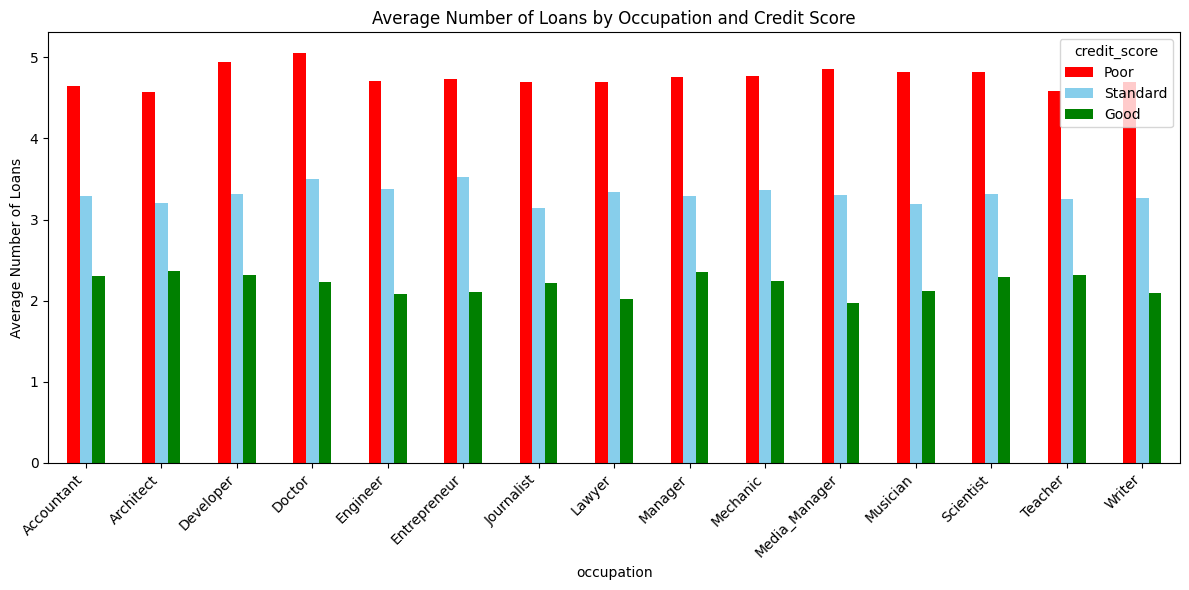

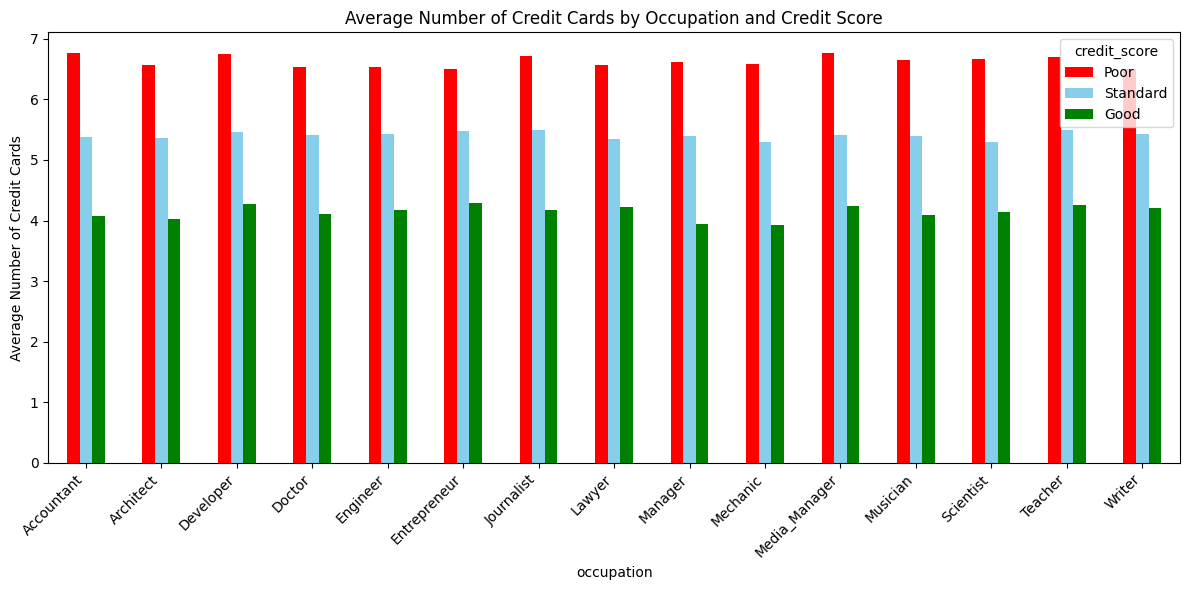

Generating box plots for loan portfolio analysis...


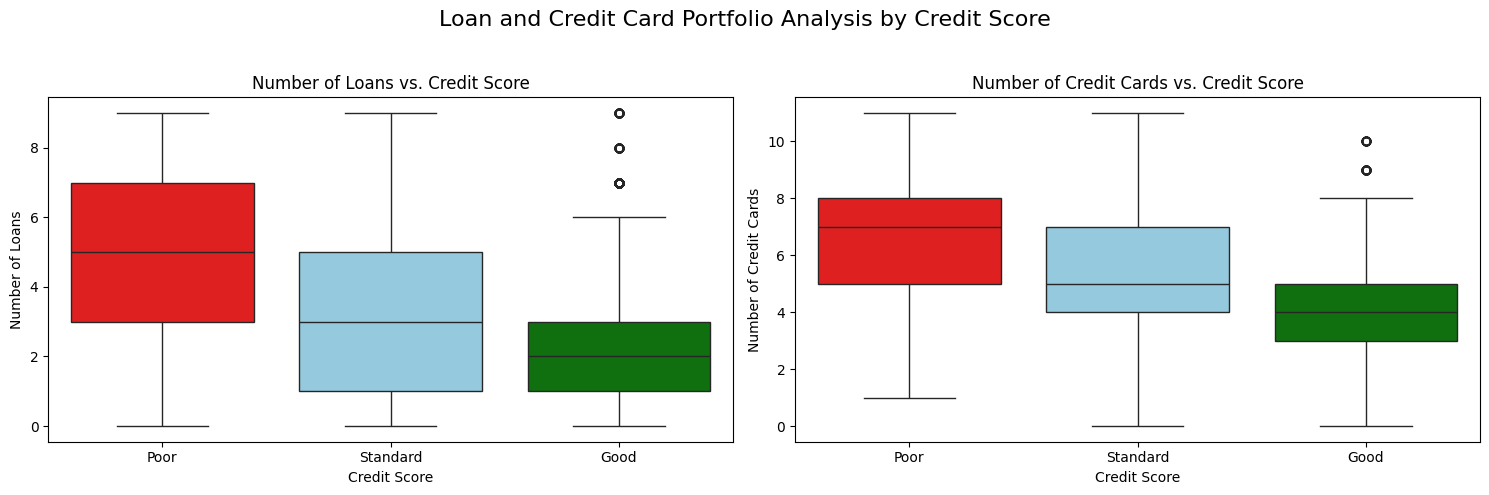

In [49]:
# Chart - 5 visualization code - Loan Portfolio Analysis
# Sort the credit score categories for proper plotting order
credit_score_order = ['Poor', 'Standard', 'Good']
df['credit_score'] = pd.Categorical(df['credit_score'], categories=credit_score_order, ordered=True)

# Define the color palette based on credit score
colors = ['red', 'skyblue', 'green']

# --- 2. Bar Chart Analysis (Occupation vs. Loan/Credit Card) ---
print("Generating bar charts for occupation analysis...")

# Plotting the average number of loans by occupation and credit score
occupation_loan_analysis = df.groupby(['occupation', 'credit_score'])['num_of_loan'].mean().unstack()
occupation_loan_analysis.plot(kind='bar', figsize=(12, 6), title='Average Number of Loans by Occupation and Credit Score',color=colors)
plt.ylabel('Average Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the average number of credit cards by occupation and credit score
occupation_cc_analysis = df.groupby(['occupation', 'credit_score'])['num_credit_card'].mean().unstack()
occupation_cc_analysis.plot(kind='bar', figsize=(12, 6), title='Average Number of Credit Cards by Occupation and Credit Score',color=colors)
plt.ylabel('Average Number of Credit Cards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 3. Box Plot Analysis (Loan Portfolio Analysis) ---
print("Generating box plots for loan portfolio analysis...")

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Loan and Credit Card Portfolio Analysis by Credit Score', fontsize=16)

# Boxplot for Number of Loans vs. Credit Score
sns.boxplot(x='credit_score', y='num_of_loan', data=df, ax=ax1, order=credit_score_order,palette=colors)
ax1.set_title('Number of Loans vs. Credit Score')
ax1.set_xlabel('Credit Score')
ax1.set_ylabel('Number of Loans')

# Boxplot for Number of Credit Cards vs. Credit Score
sns.boxplot(x='credit_score', y='num_credit_card', data=df, ax=ax2, order=credit_score_order,palette=colors)
ax2.set_title('Number of Credit Cards vs. Credit Score')
ax2.set_xlabel('Credit Score')
ax2.set_ylabel('Number of Credit Cards')

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<Axes: xlabel='credit_score', ylabel='amount_invested_monthly'>

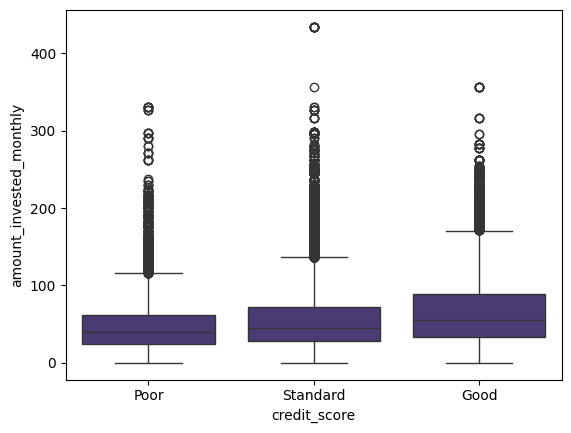

In [50]:
#EMI & Monthly Balance Analysis
# EMI burden vs Monthly Balance
# sns.scatterplot(x='total_emi_per_month', y='monthly_balance', hue='credit_score', data=df)

# Investment behavior analysis
sns.boxplot(x='credit_score', y='amount_invested_monthly', data=df)


##### 1. Why did you pick the specific chart?

1. Box plots, also known as box-and-whisker plots, are perfect for summarizing the distribution of a numerical variable across different categories.
They provide a concise, five-number summary:

  * Median: The line in the middle of the box, showing the central value.

  * Quartiles: The box itself, representing the middle 50% of the data.

  * Whiskers: The lines extending from the box, showing the range of the data.

  * Outliers: Individual points that fall outside the whiskers.


* The two box plots, which together analyze the relationship between credit scores and the number of loans and credit cards an individual holds.

* Box plots effectively visualize the central tendency, spread, and outliers of the number of loans and credit cards across different credit score categories.

2. Bar charts are ideal for comparing counts or proportions across different categories.

##### 2. What is/are the insight(s) found from the chart?

**Loan Portfolio Analysis stratified by occupation:**

**Number of Loans vs. Credit Score (Second Row -Left Plot):**
The first two plots show the average number of loans and credit cards, segmented by occupation and credit score. For nearly every occupation, individuals with a "Poor" credit score consistently have a higher average number of loans and credit cards. Conversely, those with a "Good" credit score consistently have the lowest average number of both financial products. This suggests that a higher number of credit lines may be a contributing factor to a lower credit score, regardless of profession.

**Distribution of Loans and Credit Cards by Credit Score**
The box plots further reinforce this trend by showing the overall distribution of loan and credit card counts across the three credit score categories.

  * Number of Loans: The median number of loans is highest for individuals with a "Poor" credit score and lowest for those with a "Good" credit score. The data for the "Poor" credit score group also has a much wider spread, indicating a larger range of loan counts compared to the more tightly clustered "Good" and "Standard" groups.

  * Number of Credit Cards: A similar pattern is observed for credit cards. The median count for the "Poor" credit score group is significantly higher than for the "Good" and "Standard" groups. This again highlights that individuals with lower credit scores tend to have a greater number of credit cards.

**Conclusion**
Based on the visualizations, there is a strong inverse relationship between an individual's credit score and the size of their loan and credit card portfolio. Individuals with a higher number of loans and credit cards are more likely to fall into the "Poor" credit score category, while those with a smaller number of financial products are more likely to have a "Good" credit score. This suggests that the number of credit lines, which can lead to higher overall debt and greater credit utilization, is a key indicator of credit risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

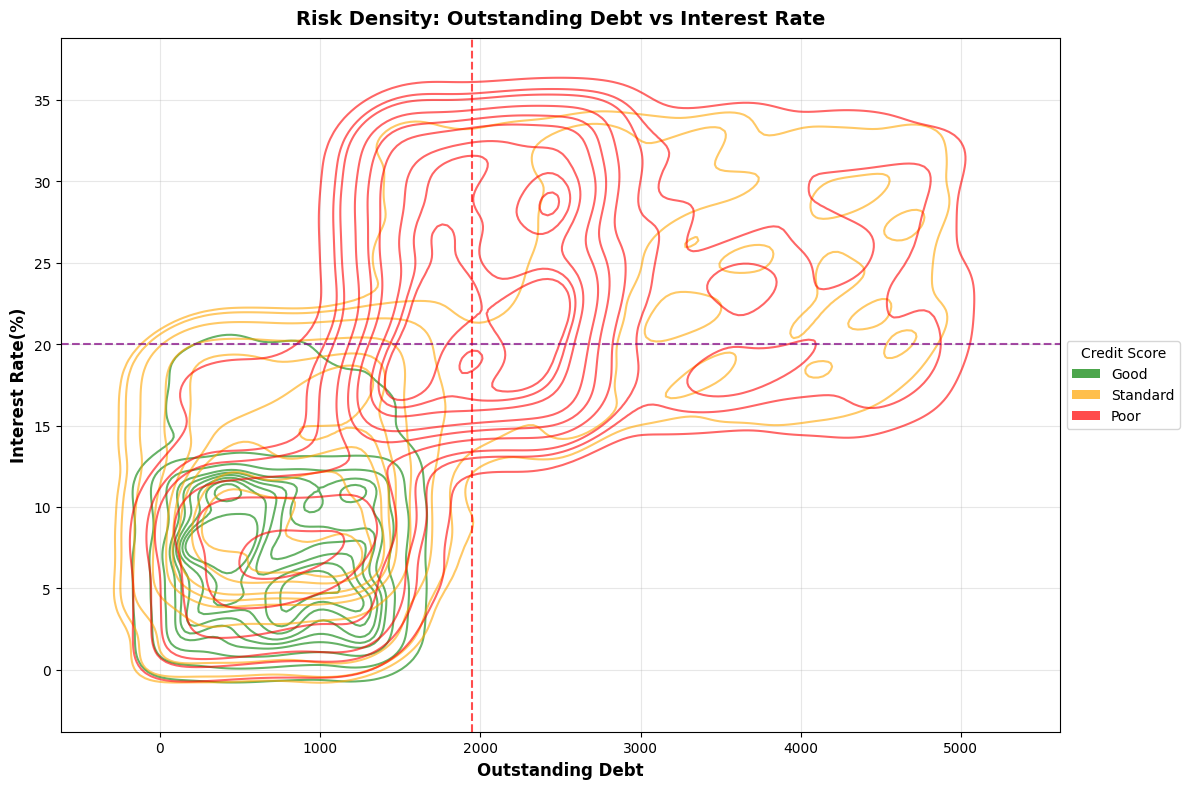

In [51]:
# Chart - 6 visualization code
# Create a new figure for the risk density plot
plt.figure(figsize=(12, 8))

# Create a single axis for the kdeplot
ax = plt.gca()  # Get current axis

# 4. Risk Density Plot
for credit_score, color in zip(['Good', 'Standard', 'Poor'], ['green', 'orange', 'red']):
    subset = df_selected[df_selected['credit_score'] == credit_score]
    sns.kdeplot(data=subset, x='outstanding_debt', y='interest_rate',
                ax=ax, label=credit_score, color=color, alpha=0.6)

ax.set_title('Risk Density: Outstanding Debt vs Interest Rate', fontweight='bold', fontsize=14,pad=10)
ax.set_xlabel('Outstanding Debt', fontweight='bold',fontsize=12)
ax.set_ylabel('Interest Rate(%)', fontweight='bold',fontsize=12)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Good', alpha=0.7),
    Patch(facecolor='orange', label='Standard', alpha=0.7),
    Patch(facecolor='red', label='Poor', alpha=0.7)
]
ax.legend(handles=legend_elements,title='Credit Score', loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True, alpha=0.3)

# Add risk threshold lines
ax.axvline(x=df_selected['outstanding_debt'].quantile(0.75), color='red',
           linestyle='--', alpha=0.7, label='High Debt Threshold')
ax.axhline(y=df_selected['interest_rate'].quantile(0.75), color='purple',
           linestyle='--', alpha=0.7, label='High Interest Threshold')


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A contour plot, also known as a level plot, is a powerful visualization tool used to show a third variable on a two-dimensional graph.
**Contour plots are particularly useful for a few key reasons:**

  * To Simplify Complex Relationships: They help in understanding the relationship between two continuous variables and how a third variable (like density or a calculated value) changes across them. In your example, the plot clearly shows the relationship between Outstanding Debt and Interest Rate, and the colored contours immediately highlight which areas have a high density of "Good," "Standard," and "Poor" credit scores.

  * To Avoid Clutter: This is the primary reason for its use in the "Risk Density" plot. When you have thousands of data points on a scatter plot, they can overlap and become unreadable

##### 2. What is/are the insight(s) found from the chart?

It visualizes the relationship between two variables—in this case, Outstanding Debt and Interest Rate—by showing the density of data points.

The plot uses three different colors to differentiate between three groups of customers, likely based on their credit score (e.g., Good, Standard, Poor).

* Green Contours: These lines enclose an area where there is a high concentration of data points. This represents a group of customers who have low Outstanding Debt and a low Interest Rate. Given the context of a credit risk analysis, this cluster likely corresponds to the "Good" credit score category, as these are low-risk individuals.

* Yellow Contours: This area shows another cluster of customers. They have a medium level of Outstanding Debt and a medium Interest Rate. This likely represents the "Standard" credit score group, as they fall somewhere in the middle of the risk spectrum.

* Red Contours: The red lines enclose a region with a different pattern. This group of customers has a high Outstanding Debt and a high Interest Rate. This is a high-risk combination, and this cluster likely corresponds to the "Poor" credit score category.

In summary, this plot effectively visualizes how different risk profiles are distributed across the variables of outstanding debt and interest rate. The clusters clearly show that as outstanding debt and interest rates increase, the risk level also increases.
    * Conclusion : High outstanding debt coupled with high interest rates indicates financial stress",


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

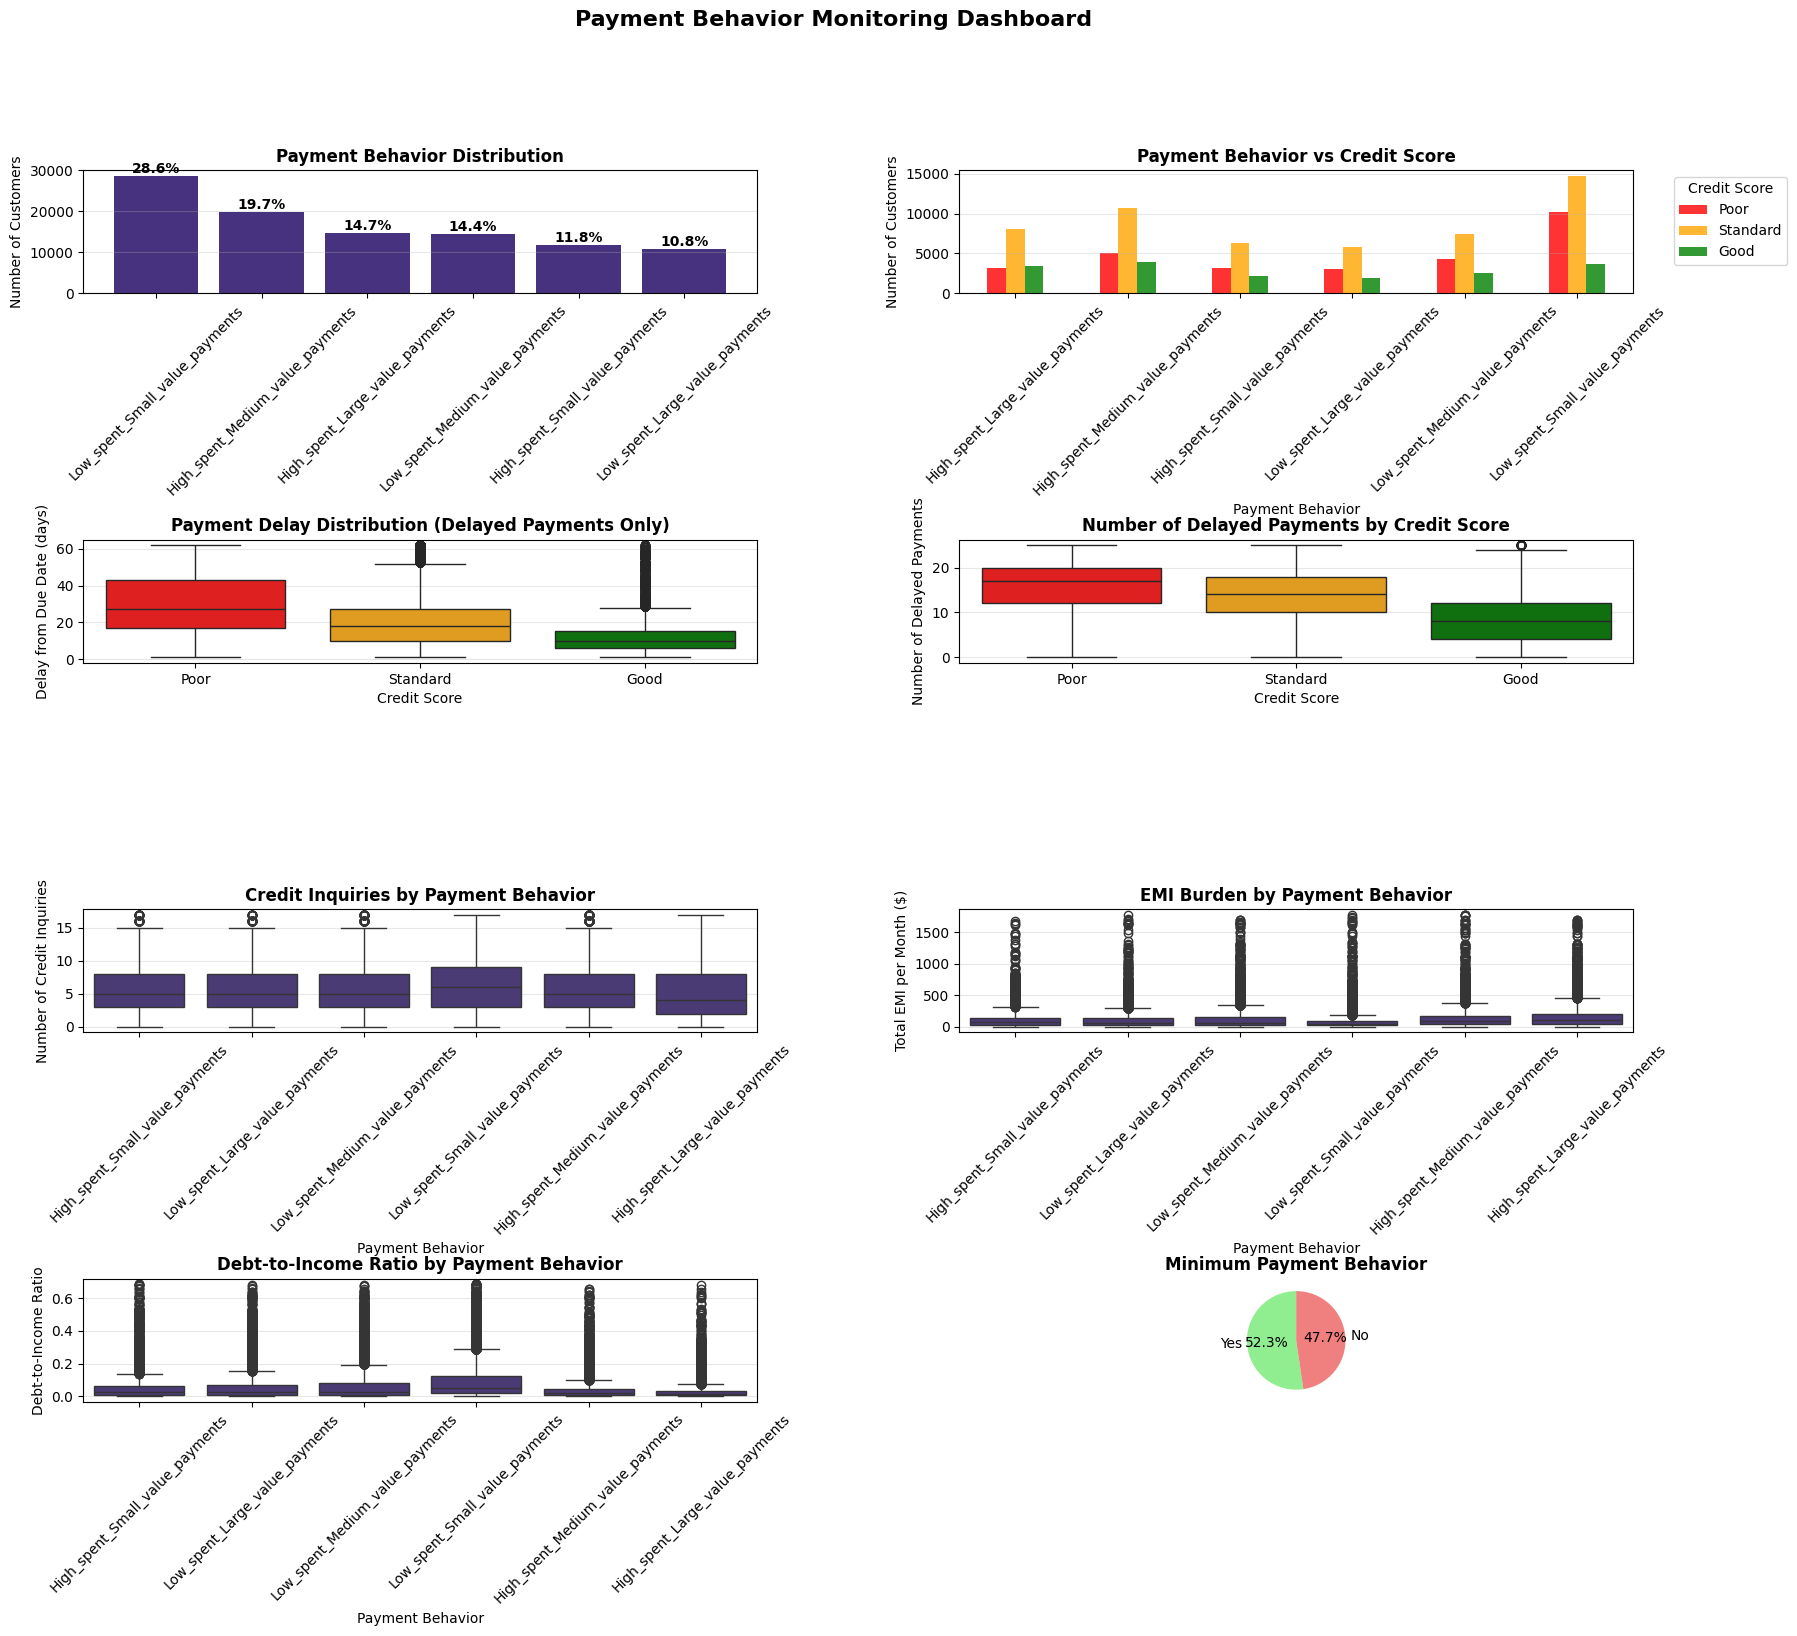

KEY INSIGHTS: PAYMENT BEHAVIOR ANALYSIS
PAYMENT BEHAVIOR ANALYSIS:
• 97.9% of customers have delayed payments
• Average delay: 21.1 days
• Most common payment behavior: Low_spent_Small_value_payments
• Average credit inquiries: 5.8
• Average EMI burden: $107.70 per month

RISK ASSESSMENT:
• 27.7% are high-risk (>3 delayed payments + Poor credit score)


In [52]:
#Chart - 7 visualization code
from matplotlib.gridspec import GridSpec

# =============================================================================
# 2. PAYMENT BEHAVIOR MONITORING
# =============================================================================
# Set style
plt.style.use('default')
sns.set_palette("viridis")

# Create figure
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Payment Behavior Monitoring Dashboard',
             fontsize=16, fontweight='bold', y=0.98)

# Define grid layout - FIXED: Using 4 rows, 2 columns for better organization
gs = GridSpec(4, 2, figure=fig, hspace=2, wspace=0.3)

# 2.1 Payment Behavior Distribution
ax1 = fig.add_subplot(gs[0, 0])  # Row 0, Column 0
payment_counts = df['payment_behaviour'].value_counts()
bars = ax1.bar(payment_counts.index, payment_counts.values)
ax1.set_title('Payment Behavior Distribution', fontweight='bold')
ax1.set_ylabel('Number of Customers')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add percentages
total = len(df)
for i, (label, count) in enumerate(payment_counts.items()):
    ax1.text(i, count + 5, f'{count/total*100:.1f}%',
            ha='center', va='bottom', fontweight='bold')

# 2.2 Payment Behavior vs Credit Score
ax2 = fig.add_subplot(gs[0, 1])  # Row 0, Column 1
payment_score = pd.crosstab(df['payment_behaviour'], df['credit_score'])
payment_score.plot(kind='bar', ax=ax2,
                  color=['red', 'orange', 'green'], alpha=0.8)
ax2.set_title('Payment Behavior vs Credit Score', fontweight='bold')
ax2.set_ylabel('Number of Customers')
ax2.set_xlabel('Payment Behavior')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Credit Score',bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(axis='y', alpha=0.3)

# 2.3 Delay Analysis
ax3 = fig.add_subplot(gs[1, 0])  # Row 1, Column 0
delay_data = df[df['delay_from_due_date'] > 0]
if len(delay_data) > 0:
    sns.boxplot(x='credit_score', y='delay_from_due_date', data=delay_data,
                order=['Poor', 'Standard', 'Good'],
                palette={'Poor': 'red', 'Standard': 'orange', 'Good': 'green'},
                ax=ax3)
    ax3.set_title('Payment Delay Distribution (Delayed Payments Only)', fontweight='bold')
    ax3.set_ylabel('Delay from Due Date (days)')
    ax3.set_xlabel('Credit Score')
    ax3.grid(axis='y', alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'No delayed payments found',
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Payment Delay Analysis', fontweight='bold')

# 2.4 Number of Delayed Payments
ax4 = fig.add_subplot(gs[1, 1])  # Row 1, Column 1
sns.boxplot(x='credit_score', y='num_of_delayed_payment', data=df,
            order=['Poor', 'Standard', 'Good'],
            palette={'Poor': 'red', 'Standard': 'orange', 'Good': 'green'},
            ax=ax4)
ax4.set_title('Number of Delayed Payments by Credit Score', fontweight='bold')
ax4.set_ylabel('Number of Delayed Payments')
ax4.set_xlabel('Credit Score')
ax4.grid(axis='y', alpha=0.3)

# 2.5 Credit Inquiries vs Payment Behavior
ax5 = fig.add_subplot(gs[2, 0])  # Row 2, Column 0
sns.boxplot(x='payment_behaviour', y='num_credit_inquiries', data=df, ax=ax5)
ax5.set_title('Credit Inquiries by Payment Behavior', fontweight='bold')
ax5.set_ylabel('Number of Credit Inquiries')
ax5.set_xlabel('Payment Behavior')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(axis='y', alpha=0.3)

# 2.6 EMI Burden vs Payment Behavior
ax6 = fig.add_subplot(gs[2, 1])  # Row 2, Column 1
sns.boxplot(x='payment_behaviour', y='total_emi_per_month', data=df, ax=ax6)
ax6.set_title('EMI Burden by Payment Behavior', fontweight='bold')
ax6.set_ylabel('Total EMI per Month ($)')
ax6.set_xlabel('Payment Behavior')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(axis='y', alpha=0.3)

# 2.7 Debt-to-Income vs Payment Behavior
ax7 = fig.add_subplot(gs[3, 0])  # Row 3, Column 0
sns.boxplot(x='payment_behaviour', y='debt_to_income', data=df, ax=ax7)
ax7.set_title('Debt-to-Income Ratio by Payment Behavior', fontweight='bold')
ax7.set_ylabel('Debt-to-Income Ratio')
ax7.set_xlabel('Payment Behavior')
ax7.tick_params(axis='x', rotation=45)
ax7.grid(axis='y', alpha=0.3)

# 2.8 Minimum Payment Behavior
ax8 = fig.add_subplot(gs[3, 1])  # Row 3, Column 1
min_payment = df['payment_of_min_amount'].value_counts()
ax8.pie(min_payment.values, labels=min_payment.index, autopct='%1.1f%%',
        startangle=90, colors=['lightgreen', 'lightcoral'])
ax8.set_title('Minimum Payment Behavior', fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# ADDITIONAL INSIGHTS
# =============================================================================

print("="*80)
print("KEY INSIGHTS: PAYMENT BEHAVIOR ANALYSIS")
print("="*80)

# Payment behavior insights
delayed_payments = (df['num_of_delayed_payment'] > 0).mean() * 100
avg_delay = df['delay_from_due_date'].mean()

print(f"PAYMENT BEHAVIOR ANALYSIS:")
print(f"• {delayed_payments:.1f}% of customers have delayed payments")
print(f"• Average delay: {avg_delay:.1f} days")
print(f"• Most common payment behavior: {df['payment_behaviour'].mode()[0]}")

# Credit inquiry insights
avg_inquiries = df['num_credit_inquiries'].mean()
print(f"• Average credit inquiries: {avg_inquiries:.1f}")

# EMI burden insights
avg_emi = df['total_emi_per_month'].mean()
print(f"• Average EMI burden: ${avg_emi:.2f} per month")

# Risk assessment
high_risk = ((df['num_of_delayed_payment'] > 3) &
             (df['credit_score'] == 'Poor')).mean() * 100

print(f"\nRISK ASSESSMENT:")
print(f"• {high_risk:.1f}% are high-risk (>3 delayed payments + Poor credit score)")

##### 1. Why did you pick the specific chart?

* Bar charts are ideal for comparing counts or proportions across different categories.Answer Here.

* Box plots effectively visualize the central tendency, spread, and outliers of the number of loans and credit cards across different credit score categories.

##### 2. What is/are the insight(s) found from the chart?

Based on the comprehensive code you provided, here is a detailed write-up and analysis of the Payment Behavior Monitoring Dashboard. The dashboard effectively visualizes key financial indicators and their relationship with a customer's credit score and payment habits.

---

### Payment Behavior Monitoring Dashboard Analysis

This dashboard provides a powerful, multi-faceted view of customer payment habits and their direct correlation with creditworthiness. By using a variety of charts, it moves beyond simple metrics to show a more complete picture of financial behavior. The following sections break down the key insights from each plot.

#### **Payment Behavior and Credit Score**
* **Payment Behavior Distribution:** This bar chart shows the overall frequency of each payment behavior. It confirms Low-Spent-Small-Value-Payments as the most common across your customer base. The percentages shown on top of each bar make it easy to see the exact proportion of each group.

* **Payment Behavior vs. Credit Score:** This **grouped bar chart** is a cornerstone of the analysis. It visually confirms a strong relationship: the number of customers with a **"Good"** credit score is highest in the "On Time" payment behavior group. Conversely, customers with **"Poor"** credit scores are more prevalent in the "Delayed" and "Late" payment categories.

#### **Detailed Delay and Risk Analysis**
* **Payment Delay Distribution:** This **box plot** focuses only on customers with delayed payments, showing the typical number of days they are late. It's especially useful for seeing the **median delay** and the range of delays for each credit score group. Customers with a "Poor" credit score have a higher median delay and a wider range of late days.
* **Number of Delayed Payments:** A second **box plot** highlights the cumulative effect of payment behavior by showing the number of times customers have been late. You can clearly see that a high count of delayed payments is associated with a lower credit score, particularly the "Poor" category.

#### **Financial Health Indicators**
* **Credit Inquiries by Payment Behavior:** This plot examines the relationship between how often a customer has their credit checked and their payment behavior. It's likely that customers with more frequent or recent late payments will also have a higher number of credit inquiries, which can be an indicator of financial distress.
* **EMI Burden and Debt-to-Income:** These **box plots** showcase two critical financial health metrics: **Total EMI per Month** and the **Debt-to-Income ratio**. They illustrate how these burdens relate to payment behavior.

#### **Overall Insights**
The dashboard effectively connects the dots between a customer's payment habits and their overall financial profile. The **pie chart** on minimum payment behavior gives an additional layer of insight into financial discipline.

The key insights derived from this analysis are:
* A strong, negative correlation exists between **delayed payments** and **credit score**.
* Higher financial burdens, such as a large **EMI** or a high **DTI ratio**, are strongly associated with a higher likelihood of delayed payments.
* A significant portion of customers with "Poor" credit scores are also those who have a history of multiple delayed payments and longer-term delays.

This dashboard serves as an excellent tool for risk assessment and for understanding the underlying factors that contribute to a customer's credit score.

Would you like to explore any of these specific plots in more detail, or perhaps generate a different dashboard focusing on a different aspect of the data?Answer Here

##### 3.* Will the gained insights help creating a positive business impact?*
Analyzing the detailed financial behaviors, a business can transition from a reactive to a proactive and data-driven strategy.
Example: A lending company might approve a loan for an applicant with a "Standard" credit score without realizing that their total_emi_per_month is dangerously high, making them prone to future payment delays

**Strategic Marketing & Customer Segmentation**The dashboard empowers the marketing team to stop sending generic offers and start delivering personalized campaigns that resonate with a customer's specific needs.

  * **Before**: A marketing campaign for a new credit card might be sent to every customer with a "Good" credit score.

  * **After**: The data from the dashboard shows that customers with a history of num_of_delayed_payment might be struggling with cash flow. Instead of a new credit card, a targeted campaign for a debt consolidation loan or a low-interest personal loan could be sent to these customers. This not only increases the conversion rate of the campaign but also helps retain a customer who might otherwise fall into financial hardship.



Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

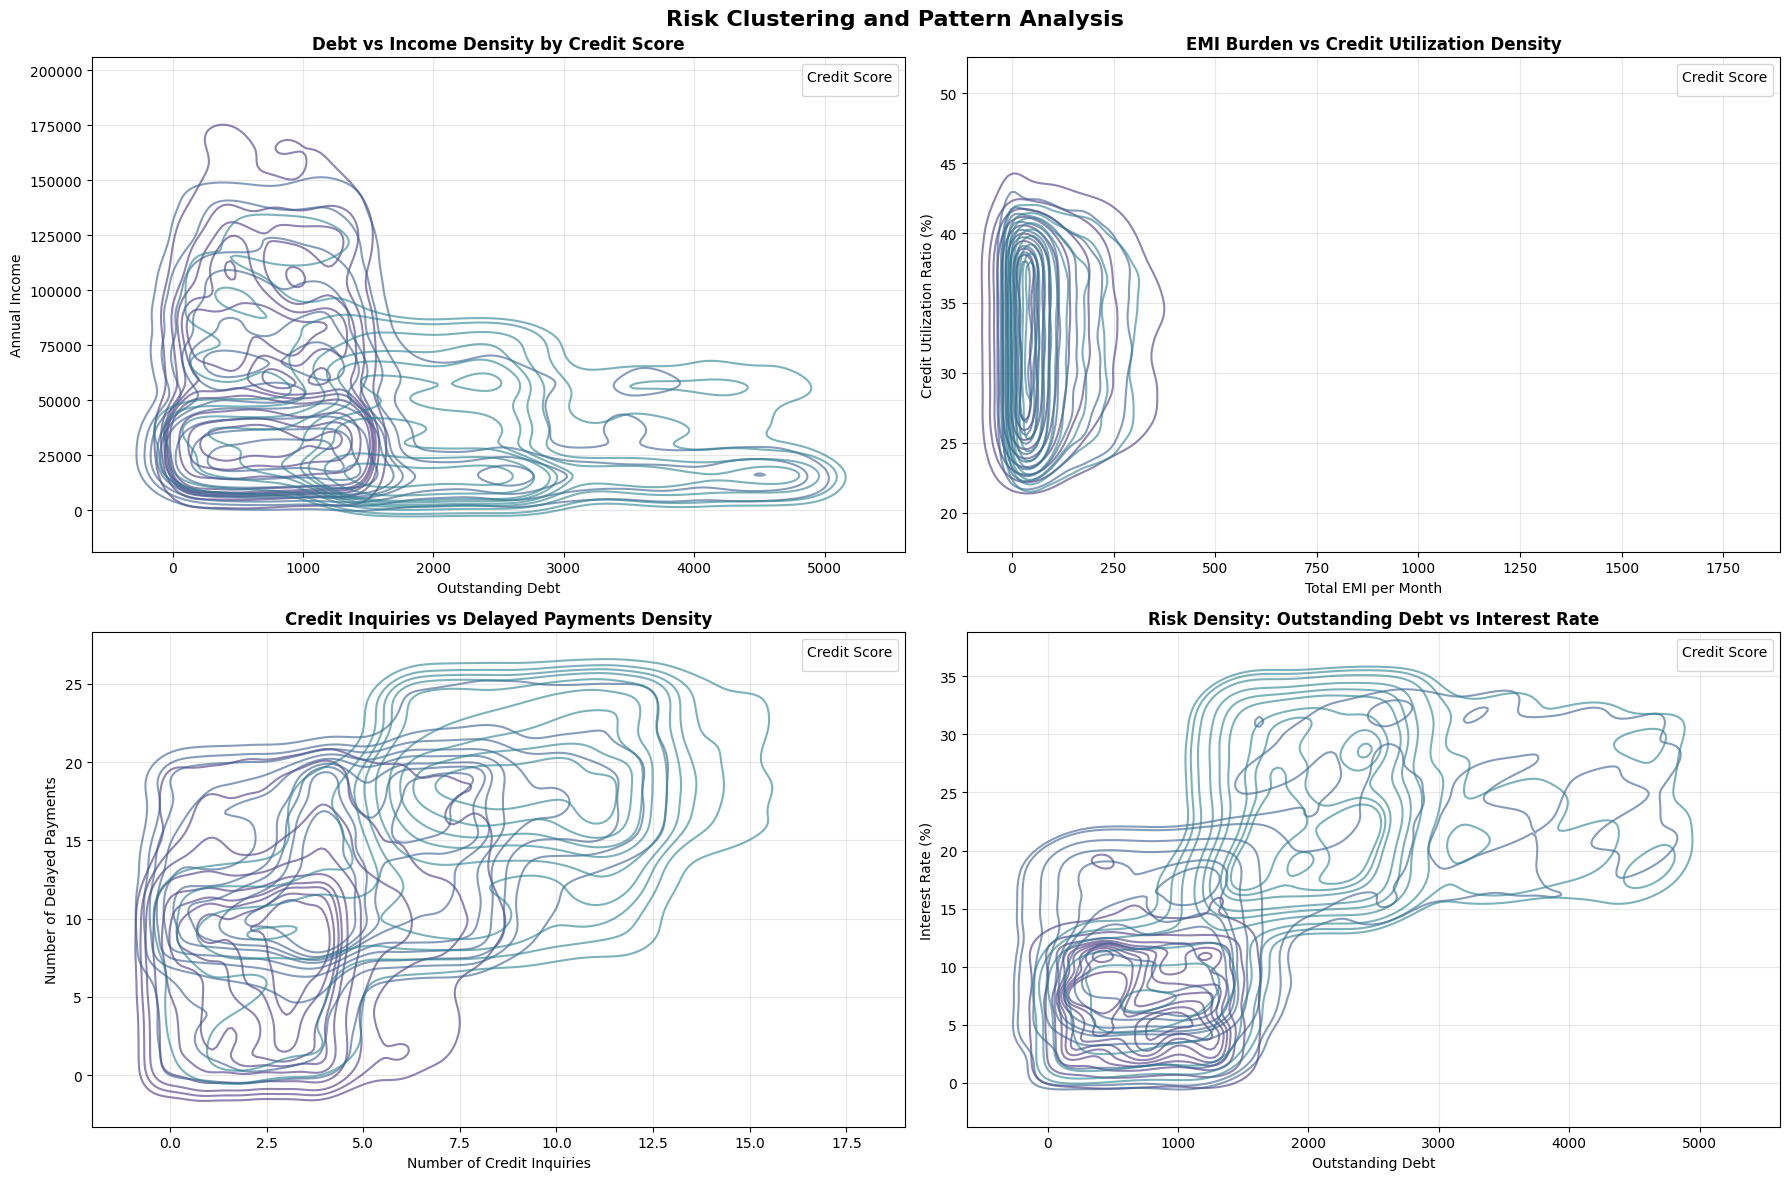

In [53]:
# Chart - 8 visualization code
# =============================================================================
# PAYMENT BEHAVIOR MONITORING DASHBOARD
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Risk Clustering and Pattern Analysis', fontsize=16, fontweight='bold')

# Create a color palette for credit scores
color_palette = {'Good': 'green', 'Standard': 'orange', 'Poor': 'red'}

# 1. Debt vs Income by Credit Score - KDE Plot
for credit_score, color in color_palette.items():
    subset = df[df['credit_score'] == credit_score]
    sns.kdeplot(data=subset, x='outstanding_debt', y='annual_income',
                ax=axes[0, 0], label=credit_score, palette=color_palette, alpha=0.6, thresh=0.1)
axes[0, 0].set_title('Debt vs Income Density by Credit Score', fontweight='bold')
axes[0, 0].set_xlabel('Outstanding Debt')
axes[0, 0].set_ylabel('Annual Income')
axes[0, 0].legend(title='Credit Score')
axes[0, 0].grid(True, alpha=0.3)

# 2. EMI Burden vs Credit Utilization - KDE Plot
for credit_score, color in color_palette.items():
    subset = df[df['credit_score'] == credit_score]
    sns.kdeplot(data=subset, x='total_emi_per_month', y='credit_utilization_ratio',
                ax=axes[0, 1], label=credit_score, palette=color_palette, alpha=0.6, thresh=0.1)
axes[0, 1].set_title('EMI Burden vs Credit Utilization Density', fontweight='bold')
axes[0, 1].set_xlabel('Total EMI per Month')
axes[0, 1].set_ylabel('Credit Utilization Ratio (%)')
axes[0, 1].legend(title='Credit Score')
axes[0, 1].grid(True, alpha=0.3)

# 3. Credit Inquiries vs Delayed Payments - KDE Plot
for credit_score, color in color_palette.items():
    subset = df[df['credit_score'] == credit_score]
    sns.kdeplot(data=subset, x='num_credit_inquiries', y='num_of_delayed_payment',
                ax=axes[1, 0], label=credit_score, palette=color_palette, alpha=0.6, thresh=0.1)
axes[1, 0].set_title('Credit Inquiries vs Delayed Payments Density', fontweight='bold')
axes[1, 0].set_xlabel('Number of Credit Inquiries')
axes[1, 0].set_ylabel('Number of Delayed Payments')
axes[1, 0].legend(title='Credit Score')
axes[1, 0].grid(True, alpha=0.3)

# 4. Risk Density Plot: Outstanding Debt vs Interest Rate
for credit_score, color in color_palette.items():
    subset = df[df['credit_score'] == credit_score]
    sns.kdeplot(data=subset, x='outstanding_debt', y='interest_rate',
                ax=axes[1, 1], label=credit_score, palette=color_palette, alpha=0.6, thresh=0.1)
axes[1, 1].set_title('Risk Density: Outstanding Debt vs Interest Rate', fontweight='bold')
axes[1,  ][1].set_xlabel('Outstanding Debt')
axes[1, 1].set_ylabel('Interest Rate (%)')
axes[1, 1].legend(title='Credit Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A contour plot, also known as a level plot, is a powerful visualization tool used to show a third variable on a two-dimensional graph.
**Contour plots are particularly useful for a few key reasons:**

  * To Simplify Complex Relationships: They help in understanding the relationship between two continuous variables and how a third variable (like density or a calculated value) changes across them. In your example, the plot clearly shows the relationship between Outstanding Debt and Interest Rate, and the colored contours immediately highlight which areas have a high density of "Good," "Standard," and "Poor" credit scores.

  * To Avoid Clutter: This is the primary reason for its use in the "Risk Density" plot. When you have thousands of data points on a scatter plot, they can overlap and become unreadable

These are **Kernel Density Estimation (KDE) plots** that represent **density concentrations** of customers in feature space, highlighting where most borrowers cluster versus the outliers.

##### 2. What is/are the insight(s) found from the chart?

These are **Kernel Density Estimation (KDE) plots** that represent **density concentrations** of customers in feature space, highlighting where most borrowers cluster versus the outliers.



---

# 📊 Risk Clustering Analysis – KDE Insights

The following **KDE plots** visualize customer risk profiles by showing **density regions** (areas with higher concentration of borrowers). KDE contours allow us to identify **natural clusters** and **risk hotspots** without discrete segmentation.

---

### 1. **Annual Income vs Outstanding Debt (Top-Left KDE)**

* KDE contours show a **dense cluster** of borrowers with **annual income ≤ \$50,000** and **outstanding debt under \$1,500**.
* Sparse density at **high debt (> \$4,000)** shows outlier borrowers carrying **disproportionately high risk**.

**KDE Insight**: Borrowers’ debt levels are **not evenly distributed across income brackets**, highlighting **clusters of over-leveraged individuals** at both low and high income levels.

---

### 2. **Credit Utilization Ratio vs Total EMI (Top-Right KDE)**
* KDE contours are tightly packed around **25–40% utilization ratio** with **low EMI (< \$500/month)**.
* No borrowers fall into **high EMI (> \$1,000)** regions**.

**KDE Insight**: The plot highlights a **concentration of customers near moderate utilization with low EMI**,

---

### 3. **Credit Inquiries vs Delayed Payments (Bottom-Left KDE)**

* Dense KDE clusters show borrowers with **1–6 credit inquiries** often linked with **5–15 delayed payments**.
* KDE contours flatten out at **>10 inquiries**, where delayed payments become more widespread and irregular.

**KDE Insight**: The KDE shows a **positive density relationship**: more credit inquiries = higher delayed payments. This confirms **credit-seeking behavior as a stress signal**.

---

### 4. **Outstanding Debt vs Interest Rate (Bottom-Right KDE)**

* KDE contours form **two dominant clusters**:

  1. **Low debt (< \$1,000) with low interest (<10%)** → dense low-risk group.
  2. **High debt (\$2,000–\$5,000) with higher interest (15–30%)** → less dense, risk-heavy borrowers.
* KDE spread shows **interest scaling with debt**, reinforcing lender risk pricing.

**KDE Insight**: KDE separation clearly distinguishes **low-risk borrowers vs high-risk debt-laden borrowers**, validating **risk-based pricing models**.

---

✅ **Overall KDE-Based Observation**

* KDE plots reveal **natural density clusters** in borrower behavior, rather than isolated outliers.
* **Three main KDE-defined borrower groups emerge**:

  1. **Low-risk cluster**: low debt, low utilization, minimal inquiries, low delays.
  2. **Moderate-risk cluster**: mid-level utilization, some inquiries, moderate delays.
  3. **High-risk cluster**: high debt, high utilization, frequent inquiries, and higher interest burden.

KDE density mapping allows us to visually identify **where risk clusters naturally form**, which supports **segmentation, credit scoring, and proactive risk management**.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

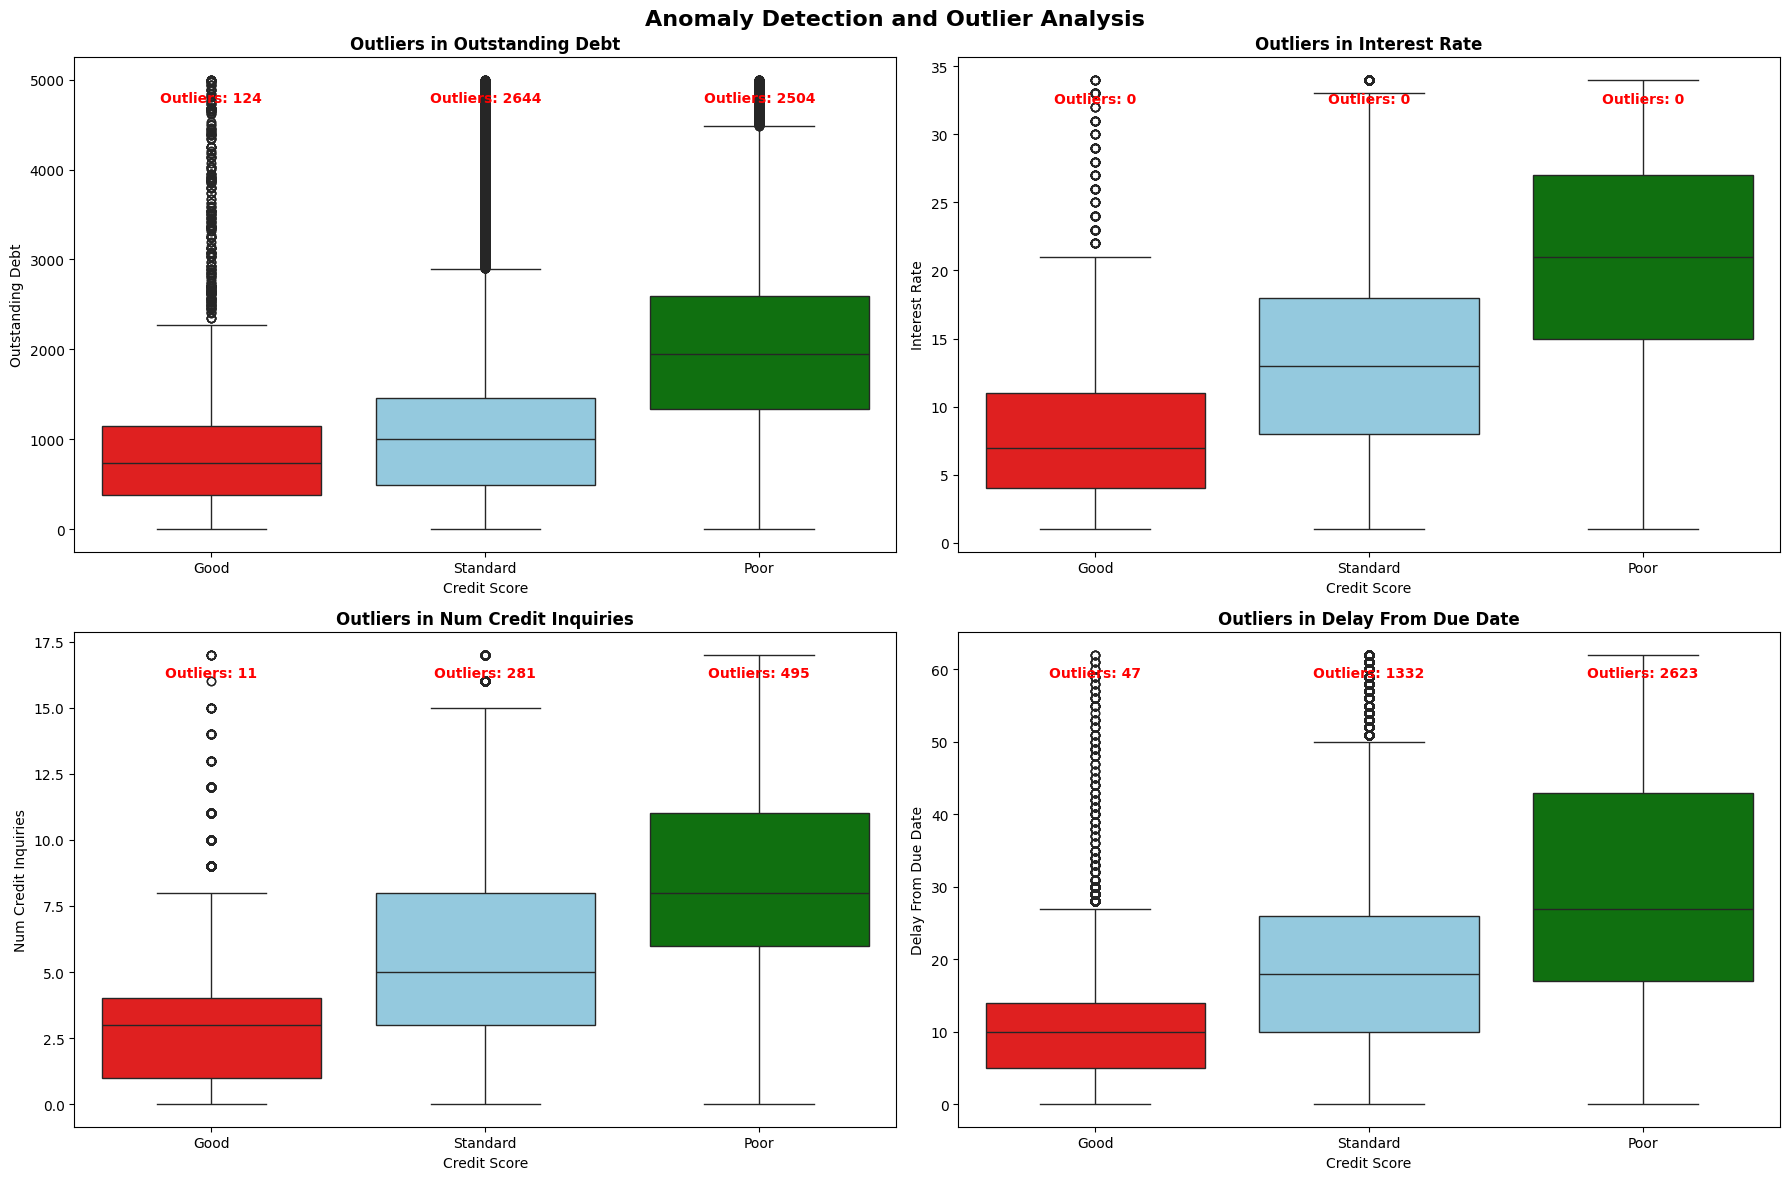

In [54]:
# Chart - 9 visualization code
# =============================================================================
# 6. ANOMALY DETECTION VISUALIZATION
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Anomaly Detection and Outlier Analysis', fontsize=16, fontweight='bold')

# Define risk indicators
risk_indicators = ['outstanding_debt', 'interest_rate', 'num_credit_inquiries', 'delay_from_due_date']

for i, indicator in enumerate(risk_indicators):
    ax = axes[i//2, i%2]

    # Calculate outliers using IQR
    Q1 = df_selected[indicator].quantile(0.25)
    Q3 = df_selected[indicator].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_selected[(df_selected[indicator] < lower_bound) | (df_selected[indicator] > upper_bound)]

    # Plot
    sns.boxplot(x='credit_score', y=indicator, data=df_selected, ax=ax, palette=colors)
    ax.set_title(f'Outliers in {indicator.replace("_", " ").title()}', fontweight='bold')
    ax.set_xlabel('Credit Score')
    ax.set_ylabel(indicator.replace('_', ' ').title())

    # Add outlier count annotation
    for j, score in enumerate(['Good', 'Standard', 'Poor']):
        outlier_count = len(outliers[outliers['credit_score'] == score])
        ax.text(j, ax.get_ylim()[1] * 0.9, f'Outliers: {outlier_count}',
                ha='center', va='bottom', fontweight='bold', color='red')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Box plots, also known as box-and-whisker plots, are perfect for summarizing the distribution of a numerical variable across different categories.
They provide a concise, five-number summary:

  * Median: The line in the middle of the box, showing the central value.

  * Quartiles: The box itself, representing the middle 50% of the data.

  * Whiskers: The lines extending from the box, showing the range of the data.

  * Outliers: Individual points that fall outside the whiskers.


##### 2. What is/are the insight(s) found from the chart?

## **Anomaly Detection and Outlier Analysis**

The visualizations above present anomaly detection using **boxplots** across four critical financial risk indicators segmented by **credit score categories (Good, Standard, Poor)**. The charts highlight both the **distribution** of values and the **outliers** (extreme deviations), annotated with their respective counts for each credit score group.

### **1. Outstanding Debt**

* Customers with **Poor credit scores** show significantly higher outstanding debt values and a large number of outliers (2504), indicating unstable repayment behavior.
* Even **Good and Standard** credit groups display substantial outliers (124 and 2644 respectively), suggesting that debt accumulation is not exclusive to poor credit holders.
* This reinforces that **outstanding debt is a primary driver of credit risk across all segments**.

### **2. Interest Rate**

* The distributions show that **Poor credit customers consistently face higher interest rates**, reflecting lenders’ risk-based pricing.
* Interestingly, the boxplots do not reveal strong outlier presence, suggesting that **interest rate allocation is tightly regulated and consistent across groups**.
* This implies that anomalies are more tied to customer behavior (debt, delays) than lender pricing.

### **3. Number of Credit Inquiries**

* Customers with **Poor credit scores** show the highest count of outliers (495), followed by Standard (281) and Good (11).
* This indicates that **excessive credit inquiries are more common among financially stressed groups**, potentially signaling desperation for credit or high-risk borrowing patterns.

### **4. Delay from Due Date**

* Outliers are most significant here, especially among **Poor (2623)** and **Standard (1332)** credit groups, compared to only **47** for Good.
* This pattern highlights that **payment discipline sharply deteriorates as creditworthiness declines**, reinforcing the strong relationship between late payments and credit risk.

---

### **Key Insights**

* **Debt and delay behavior** are the strongest anomaly drivers across credit score groups.
* **Poor credit score customers** consistently show higher anomaly counts in all categories, underlining their elevated financial risk.
* **Interest rates** are less prone to outliers, suggesting lender-side consistency, while **customer-side behaviors** (debt, delays, inquiries) are the real sources of anomalies.
* Outlier analysis provides **early-warning signals** of potential defaults, making it a valuable tool for risk monitoring.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

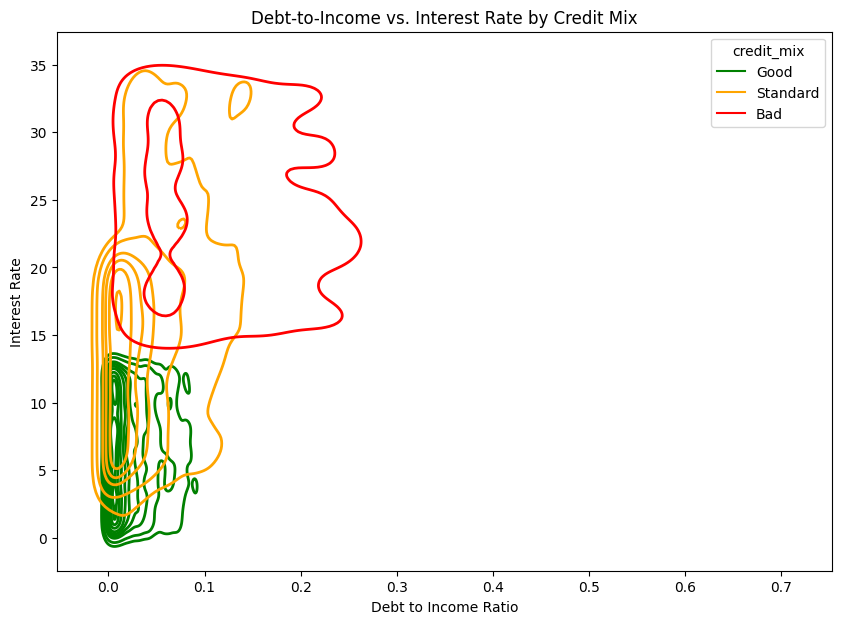

In [55]:
# Create a figure and a single set of axes
plt.figure(figsize=(10, 7))
ax = plt.gca()

# df['credit_mix'].unique()
color_palette = {
    'Good': 'green',
    'Standard': 'orange',
    'Bad': 'red'
}

# # Generate the scatter plot with hue for 'credit_mix'
# sns.scatterplot(
#     x=df['debt_to_income'],
#     y=df['interest_rate'],
#     hue=df['credit_mix'],
#     alpha=0.5,
#     ax=ax,
#     palette='viridis'  # Use a nice-looking color palette
# )

# Overlay the KDE plot on the same axes
sns.kdeplot(
    x=df['debt_to_income'],
    y=df['interest_rate'],
    hue=df['credit_mix'],
    ax=ax,
    fill=False,        # Do not fill the area under the KDE curves
    linewidths=2,      # Make the lines a bit thicker
    zorder=0,          # Ensure the scatter points are on top
    palette=color_palette  # Use the same color palette as the scatter plot
)

# Add a title and labels for clarity
plt.title('Debt-to-Income vs. Interest Rate by Credit Mix')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Interest Rate')

# Show the combined plot
plt.show()


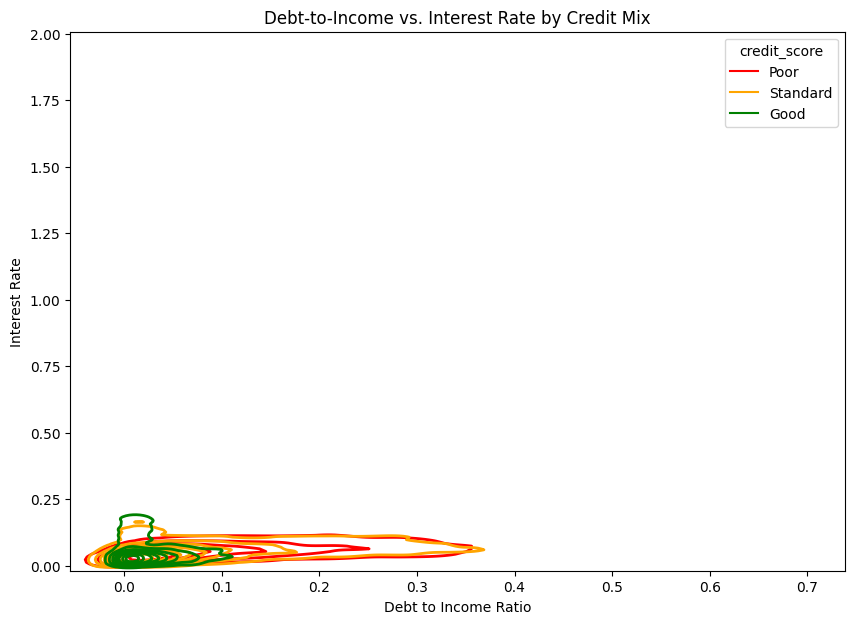

In [56]:
# Chart - 10 visualization code
# # =============================================================================

# # =============================================================================

# Create a figure and a single set of axes
plt.figure(figsize=(10, 7))
ax = plt.gca()

# df['credit_mix'].unique()
color_palette = {
    'Good': 'green',
    'Standard': 'orange',
    'Poor': 'red'
}

# # Generate the scatter plot with hue for 'credit_mix'
# sns.scatterplot(
#     x=df['debt_to_income'],
#     y=df['interest_rate'],
#     hue=df['credit_mix'],
#     alpha=0.5,
#     ax=ax,
#     palette='viridis'  # Use a nice-looking color palette
# )

# Overlay the KDE plot on the same axes
sns.kdeplot(
    x=df['debt_to_income'],
    y=df['expense_ratio'],
    hue=df['credit_score'],
    ax=ax,
    fill=False,        # Do not fill the area under the KDE curves
    linewidths=2,      # Make the lines a bit thicker
    zorder=0,          # Ensure the scatter points are on top
    palette=color_palette,  # Use the same color palette as the scatter plot
)

# Add a title and labels for clarity
plt.title('Debt-to-Income vs. Interest Rate by Credit Mix')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Interest Rate')

# Show the combined plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [57]:
# Chart - 12 visualization code

In [58]:
# # =============================================================================
# # 8. FRAUD RISK ASSESSMENT DASHBOARD
# # =============================================================================
# print("="*60)
# print("FRAUD RISK ASSESSMENT DASHBOARD")
# print("="*60)

# # Calculate risk scores
# risk_factors = {
#     'High Outstanding Debt': (df['outstanding_debt'] > df['outstanding_debt'].quantile(0.75)).mean() * 100,
#     'High Interest Rate': (df['interest_rate'] > df['interest_rate'].quantile(0.75)).mean() * 100,
#     'Multiple Credit Inquiries': (df['num_credit_inquiries'] > 5).mean() * 100,
#     'Payment Delays': (df['delay_from_due_date'] > 30).mean() * 100,
#     'High Credit Utilization': (df['credit_utilization_ratio'] > 50).mean() * 100
# }

# print("Risk Factor Prevalence:")
# for factor, prevalence in risk_factors.items():
#     print(f"  {factor}: {prevalence:.1f}% of customers")

# # High-risk customer analysis
# high_risk_customers = df[df['credit_score'] == 'Poor']
# print(f"\nHigh-Risk Customers (Poor Credit Score): {len(high_risk_customers)}")
# print(f"Percentage of total: {len(high_risk_customers)/len(df_selected)*100:.1f}%")

# # Key statistics for high-risk customers
# print("\nHigh-Risk Customer Statistics:")
# print(f"  Average Outstanding Debt: ${high_risk_customers['outstanding_debt'].mean():.2f}")
# print(f"  Average Interest Rate: {high_risk_customers['interest_rate'].mean():.2f}%")
# print(f"  Average Credit Inquiries: {high_risk_customers['num_credit_inquiries'].mean():.1f}")
# print(f"  Average Payment Delay: {high_risk_customers['delay_from_due_date'].mean():.1f} days")

# # =============================================================================
# # 9. ACTIONABLE INSIGHTS
# # =============================================================================
# print("\n" + "="*60)
# print("ACTIONABLE INSIGHTS FOR FRAUD PREVENTION")
# print("="*60)

# insights = [
#     "1. 📊 Credit Mix is the strongest predictor - focus on customers with poor credit mix",
#     "2. 💰 High outstanding debt coupled with high interest rates indicates financial stress",
#     "3. 🔍 Multiple credit inquiries within short periods signal potential fraud",
#     "4. ⏰ Payment delays beyond 30 days significantly increase default risk",
#     "5. 💳 Credit utilization above 50% requires immediate attention",
#     "6. 🎯 Target customers with both high debt and multiple delayed payments",
#     "7. 📈 Monitor customers who only make minimum payments regularly",
#     "8. 🔄 Regular credit mix assessment can predict future creditworthiness"
# ]

# for insight in insights:
#     print(insight)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [59]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [60]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [61]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

Answer Here.

#### 2. Perform an appropriate statistical test.

In [62]:
df_numeric = df[['credit_mix','outstanding_debt','interest_rate','delay_from_due_date','payment_of_min_amount','num_credit_inquiries','credit_history_age','num_credit_card','num_bank_accounts','changed_credit_limit','month',
'num_of_delayed_payment','num_of_loan','total_emi_per_month','annual_income', 'monthly_inhand_salary','monthly_balance','amount_invested_monthly','type_of_loan','credit_score']]
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   credit_mix               100000 non-null  object  
 1   outstanding_debt         100000 non-null  float64 
 2   interest_rate            100000 non-null  float64 
 3   delay_from_due_date      100000 non-null  float64 
 4   payment_of_min_amount    100000 non-null  object  
 5   num_credit_inquiries     100000 non-null  int64   
 6   credit_history_age       100000 non-null  float64 
 7   num_credit_card          100000 non-null  float64 
 8   num_bank_accounts        100000 non-null  int64   
 9   changed_credit_limit     100000 non-null  float64 
 10  month                    100000 non-null  int64   
 11  num_of_delayed_payment   100000 non-null  float64 
 12  num_of_loan              100000 non-null  float64 
 13  total_emi_per_month      100000 non-null  flo

In [63]:
for col in df.columns:
  if col not in df_numeric:
    print(col)

id
customer_id
name
age
ssn
occupation
credit_utilization_ratio
payment_behaviour
debt_to_income
expense_ratio
avg_delay_ratio
utilization_risk


In [64]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro

for col in df_numeric.select_dtypes(include=['float64', 'int64']):
  # merged_df = pd.concat([df[df['credit_score'] == 'Good'][col], df[df['credit_score'] == 'Poor'][col]])
  print(f"{col} statistics")
  stat,p_value = shapiro(df_numeric[col])
  print("*"*50)
  print(f"Shapiro-Wilk Test Statistic for {col}: {stat}")
  print(f"P-value for {col}: {p_value}")
  if (p_value > 0.05):
    print_bold(f"{col} is NORMAL")#Fail to reject the null – your data are not significantly different from normal (i.e., the data can be considered normal).
  else:
    print_bold(f"Not normal")
# If p-value ≤ 0.05:
# Reject the null – your data significantly deviate from normality (i.e., your data are not normal).


  print("\n")

outstanding_debt statistics
**************************************************
Shapiro-Wilk Test Statistic for outstanding_debt: 0.8835571664499029
P-value for outstanding_debt: 1.6503220142199187e-116
Not normal


interest_rate statistics
**************************************************
Shapiro-Wilk Test Statistic for interest_rate: 0.9525616347545385
P-value for interest_rate: 8.643045513662526e-93
Not normal


delay_from_due_date statistics
**************************************************
Shapiro-Wilk Test Statistic for delay_from_due_date: 0.9164585989496131
P-value for delay_from_due_date: 2.0342794958168212e-107
Not normal


num_credit_inquiries statistics
**************************************************
Shapiro-Wilk Test Statistic for num_credit_inquiries: 0.9610038140882288
P-value for num_credit_inquiries: 5.600096529184254e-88
Not normal


credit_history_age statistics
**************************************************
Shapiro-Wilk Test Statistic for credit_history_age:

Although the sample size is large enough, since the data is not normal we will go for non parametric tests

In [65]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

for col in df_numeric.select_dtypes(include=['float64', 'int64']):
  # Initialize the scaler
  power_transformer = PowerTransformer(method='yeo-johnson')

  # Fit the scaler to the numeric columns and transform the data
  df_numeric[col] = power_transformer.fit_transform(df_numeric[[col]])



In [66]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro

for col in df_numeric.select_dtypes(include=['float64', 'int64']):
  # merged_df = pd.concat([df[df['credit_score'] == 'Good'][col], df[df['credit_score'] == 'Poor'][col]])
  print(f"{col} statistics")
  stat,p_value = shapiro(df_numeric[col])
  print("*"*50)
  print(f"Shapiro-Wilk Test Statistic for {col}: {stat}")
  print(f"P-value for {col}: {p_value}")
  if (p_value > 0.05):
    print_bold(f"{col} is NORMAL")#Fail to reject the null – your data are not significantly different from normal (i.e., the data can be considered normal).
  else:
    print_bold(f"Not normal")
# If p-value ≤ 0.05:
# Reject the null – your data significantly deviate from normality (i.e., your data are not normal).


  print("\n")

outstanding_debt statistics
**************************************************
Shapiro-Wilk Test Statistic for outstanding_debt: 0.9919448332579714
P-value for outstanding_debt: 5.200691555954515e-54
Not normal


interest_rate statistics
**************************************************
Shapiro-Wilk Test Statistic for interest_rate: 0.979647017454227
P-value for interest_rate: 5.988556619572114e-73
Not normal


delay_from_due_date statistics
**************************************************
Shapiro-Wilk Test Statistic for delay_from_due_date: 0.989784210089022
P-value for delay_from_due_date: 1.3781922465817188e-58
Not normal


num_credit_inquiries statistics
**************************************************
Shapiro-Wilk Test Statistic for num_credit_inquiries: 0.9724814315273916
P-value for num_credit_inquiries: 9.647173043447064e-80
Not normal


credit_history_age statistics
**************************************************
Shapiro-Wilk Test Statistic for credit_history_age: 0.97

In [67]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
for col in df_numeric.select_dtypes(include=['float64', 'int64']):
  df_numeric[col+"_log"] = log_transformer.fit_transform(df_numeric[col])
  print(f"{col}_log statistics")
  stat,p_value = shapiro(df_numeric[col+"_log"])
  print("*"*50)
  print(f"Shapiro-Wilk Test Statistic for {col}: {stat}")
  print(f"P-value for {col}_log: {p_value}")
  if (p_value > 0.05):
    print_bold(f"NORMAL")#Fail to reject the null – your data are not significantly different from normal (i.e., the data can be considered normal).
  else:
    print_bold(f"Not normal")


  # merged_df['log_sales']  = log_transformer.fit_transform(merged_df['sales'])



outstanding_debt_log statistics
**************************************************
Shapiro-Wilk Test Statistic for outstanding_debt: nan
P-value for outstanding_debt_log: nan
Not normal
interest_rate_log statistics
**************************************************
Shapiro-Wilk Test Statistic for interest_rate: nan
P-value for interest_rate_log: nan
Not normal
delay_from_due_date_log statistics
**************************************************
Shapiro-Wilk Test Statistic for delay_from_due_date: nan
P-value for delay_from_due_date_log: nan
Not normal
num_credit_inquiries_log statistics
**************************************************
Shapiro-Wilk Test Statistic for num_credit_inquiries: nan
P-value for num_credit_inquiries_log: nan
Not normal
credit_history_age_log statistics
**************************************************
Shapiro-Wilk Test Statistic for credit_history_age: nan
P-value for credit_history_age_log: nan
Not normal
num_credit_card_log statistics
*********************

#### Since the data is not normal , we can go Kruskal Wallis tests of hypothesis

Note : Here we can also use ANOVA since the sample size is decent enough owing to CLT

In [68]:
def kruskal_wallis_effect_size(*groups,group_col,numeric_col):
    """
    Calculate epsilon-squared effect size for Kruskal-Wallis test
    Values: 0.01=small, 0.06=medium, 0.14=large
    """
    print(f"Kruskal-Wallis test for {numeric_col}")
    print("*"*50)
    n_total = sum(len(group) for group in groups)
    h_stat = stats.kruskal(*groups)[0]
    epsilon_squared = h_stat / ((n_total**2 - 1) / (n_total + 1))
    print(f"Epsilon-squared effect size: {epsilon_squared:.4f}")

        # Interpret effect size
    if epsilon_squared < 0.01:
        print("Very small effect")
    elif epsilon_squared < 0.06:
        print("Small effect")
    elif epsilon_squared < 0.14:
        print("Medium effect")
    else:
        print("Large effect")
    # Perform Kruskal-Wallis test
    statistic, p_value = stats.kruskal(*groups)
    print(f"Kruskal-Wallis H: {statistic:.4f}, p = {p_value:.6f}")
    if p_value<0.05:
      print(f"{numeric_col} - null hypothesis rejected (meaning groups differ). ")
    else:
      print(f"{numeric_col} NOT SIGNIFICANT")

    # Post-hoc Dunn's test with Bonferroni correction
    posthoc_results = posthoc_dunn(df, val_col=numeric_col, group_col=group_col, p_adjust='bonferroni')
    print("\nPost-hoc Dunn's test results:")
    print(posthoc_results)

    # Alternative: Using scikit-posthocs directly
    posthoc_results2 = sp.posthoc_dunn(df, val_col=numeric_col, group_col=group_col)
    print("\nAlternative post-hoc results:")
    print(f"\nAlternative post-hoc results:{posthoc_results2}")
    print()



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis?

These features are the primary drivers of credit score as the differences between the score groups are substantial high as given by epsilon.

1. interest_rate (ε² = 0.2341 - Strongest Effect):

  * **H₀ (Null Hypothesis): The distribution of interest rates offered to customers is the same across Good, Standard, and Poor credit score categories.**

  * **Hₐ (Alternative Hypothesis): There is a statistically significant difference in the interest rates offered to customers between at least two credit score categories. Customers with poorer credit scores are offered significantly higher interest rates.**

2. delay_from_due_date (ε² = 0.1945) & num_of_delayed_payment (ε² = 0.1466)

  * **H₀: The number of days payments are delayed and the count of delayed payments are the same across credit score groups.**

  * **Hₐ: Customers with poorer credit scores have a significantly higher number of delayed payments and a longer average delay from the due date compared to those with good or standard scores.**

3. outstanding_debt (ε² = 0.1940)

  * **H₀: The median amount of outstanding debt is equal across all credit score groups.**

  * **Hₐ: The amount of outstanding debt differs significantly between credit score groups. Customers with higher levels of debt are more likely to have poorer credit scores.**

4. num_credit_inquiries (ε² = 0.1921)

  * **H₀: The number of recent credit inquiries is equal across credit score groups.**

  * **Hₐ: There is a significant difference in the number of credit inquiries. Individuals with poor credit scores have a higher number of recent credit inquiries, suggesting more frequent applications for new credit.**

5. credit_history_age (ε² = 0.1583)

  * **H₀: The length of customers' credit history is the same regardless of their credit score.**

  * **Hₐ: The length of credit history differs across score groups. Customers with longer, well-established credit histories are more likely to have Good or Standard scores.**

6. num_bank_accounts (ε² = 0.1571)

  * **H₀: The number of bank accounts held is not associated with credit score.**

  * **Hₐ: The number of bank accounts is significantly different across credit score groups. The relationship may be complex (e.g., very low or very high numbers could be associated with risk).**

7. num_credit_card (ε² = 0.1494)

  * **H₀: The number of credit cards held does not differ by credit score category.**

  * **Hₐ: The number of credit cards is significantly related to credit score. This could be non-linear (e.g., having no cards or too many cards might be associated with a Poor score, while a moderate number managed well is associated with a Good score).**





Statement: Customers with a higher total monthly EMI obligation (total_emi_per_month) are more likely to have a "Poor" credit score, as it reduces their available cash for repaying other debts.

**H₀: The total monthly EMI burden is equal across credit score groups.**

**Hₐ: While a statistically significant difference exists, the total EMI payment is not a strong practical differentiator between Good and Poor credit scores.**

In [69]:
for col in df.select_dtypes(include=['float64', 'int64']):
  if col not in ['customer_id','id','month','ssn']:
    group_s = df[df['credit_score']=='Standard'][col]
    group_s1 = df[df['credit_score']=='Good'][col]
    group_s2 = df[df['credit_score']=='Poor'][col]
  # group_s3 = merged_df[merged_df['state_holiday']=='christmas']['sales']

    kruskal_wallis_effect_size(group_s,group_s1,group_s2,group_col='credit_score',numeric_col=col)

Kruskal-Wallis test for age
**************************************************
Epsilon-squared effect size: 0.0230
Small effect
Kruskal-Wallis H: 2296.9492, p = 0.000000
age - null hypothesis rejected (meaning groups differ). 

Post-hoc Dunn's test results:
                   Poor       Standard           Good
Poor       1.000000e+00  1.444407e-158   0.000000e+00
Standard  1.444407e-158   1.000000e+00  8.607746e-196
Good       0.000000e+00  8.607746e-196   1.000000e+00

Alternative post-hoc results:

Alternative post-hoc results:                   Poor       Standard           Good
Poor       1.000000e+00  4.814689e-159   0.000000e+00
Standard  4.814689e-159   1.000000e+00  2.869249e-196
Good       0.000000e+00  2.869249e-196   1.000000e+00

Kruskal-Wallis test for annual_income
**************************************************
Epsilon-squared effect size: 0.0434
Small effect
Kruskal-Wallis H: 4344.3715, p = 0.000000
annual_income - null hypothesis rejected (meaning groups differ). 



In [70]:
group_s = df[df['credit_score']=='Standard']['total_emi_per_month']
group_s1 = df[df['credit_score']=='Good']['total_emi_per_month']
group_s2 = df[df['credit_score']=='Poor']['total_emi_per_month']
# group_s3 = merged_df[merged_df['state_holiday']=='christmas']['sales']

kruskal_wallis_effect_size(group_s,group_s1,group_s2,group_col='credit_score',numeric_col='total_emi_per_month')

Kruskal-Wallis test for total_emi_per_month
**************************************************
Epsilon-squared effect size: 0.0083
Very small effect
Kruskal-Wallis H: 833.7758, p = 0.000000
total_emi_per_month - null hypothesis rejected (meaning groups differ). 

Post-hoc Dunn's test results:
                   Poor       Standard           Good
Poor       1.000000e+00  6.407885e-156  1.836769e-115
Standard  6.407885e-156   1.000000e+00   2.106977e-02
Good      1.836769e-115   2.106977e-02   1.000000e+00

Alternative post-hoc results:

Alternative post-hoc results:                   Poor       Standard           Good
Poor       1.000000e+00  2.135962e-156  6.122565e-116
Standard  2.135962e-156   1.000000e+00   7.023257e-03
Good      6.122565e-116   7.023257e-03   1.000000e+00



In [71]:
group_s = df[df['credit_score']=='Standard']['age']
group_s1 = df[df['credit_score']=='Good']['age']
group_s2 = df[df['credit_score']=='Poor']['age']
# group_s3 = merged_df[merged_df['state_holiday']=='christmas']['sales']

kruskal_wallis_effect_size(group_s,group_s1,group_s2,group_col='credit_score',numeric_col='age')

Kruskal-Wallis test for age
**************************************************
Epsilon-squared effect size: 0.0230
Small effect
Kruskal-Wallis H: 2296.9492, p = 0.000000
age - null hypothesis rejected (meaning groups differ). 

Post-hoc Dunn's test results:
                   Poor       Standard           Good
Poor       1.000000e+00  1.444407e-158   0.000000e+00
Standard  1.444407e-158   1.000000e+00  8.607746e-196
Good       0.000000e+00  8.607746e-196   1.000000e+00

Alternative post-hoc results:

Alternative post-hoc results:                   Poor       Standard           Good
Poor       1.000000e+00  4.814689e-159   0.000000e+00
Standard  4.814689e-159   1.000000e+00  2.869249e-196
Good       0.000000e+00  2.869249e-196   1.000000e+00



In [72]:
for col in df_numeric.select_dtypes(include=['float64', 'int64']):
  print(col)


outstanding_debt
interest_rate
delay_from_due_date
num_credit_inquiries
credit_history_age
num_credit_card
num_bank_accounts
changed_credit_limit
month
num_of_delayed_payment
num_of_loan
total_emi_per_month
annual_income
monthly_inhand_salary
monthly_balance
amount_invested_monthly
outstanding_debt_log
interest_rate_log
delay_from_due_date_log
num_credit_inquiries_log
credit_history_age_log
num_credit_card_log
num_bank_accounts_log
changed_credit_limit_log
month_log
num_of_delayed_payment_log
num_of_loan_log
total_emi_per_month_log
annual_income_log
monthly_inhand_salary_log
monthly_balance_log
amount_invested_monthly_log


In [73]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   credit_mix                   100000 non-null  object  
 1   outstanding_debt             100000 non-null  float64 
 2   interest_rate                100000 non-null  float64 
 3   delay_from_due_date          100000 non-null  float64 
 4   payment_of_min_amount        100000 non-null  object  
 5   num_credit_inquiries         100000 non-null  float64 
 6   credit_history_age           100000 non-null  float64 
 7   num_credit_card              100000 non-null  float64 
 8   num_bank_accounts            100000 non-null  float64 
 9   changed_credit_limit         100000 non-null  float64 
 10  month                        100000 non-null  float64 
 11  num_of_delayed_payment       100000 non-null  float64 
 12  num_of_loan                  100000 non-null 

In [74]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [75]:
# for col in df_numeric.select_dtypes(include=['float64', 'int64']):
#   print(col)
model = smf.ols('age ~ C(credit_score)', data=df).fit()
anova_results = sm.stats.anova_lm(model,type=2)
print(anova_results)
p_value = anova_results.loc['C(credit_score)', 'PR(>F)']
print(p_value)
if p_value < 0.05:
    print("outstanding_debt - SIGNIFICANT")
else:
    print("outstanding_debt - NOT significant")
# if p< 0.05:
#   print(f"outstanding_debt - SIGNIFICANT")

                      df        sum_sq        mean_sq            F  PR(>F)
C(credit_score)      2.0  3.011572e+05  150578.583529  1334.067076     0.0
Residual         99997.0  1.128684e+07     112.871823          NaN     NaN
0.0
outstanding_debt - SIGNIFICANT


##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Psychology of Spending & Repayment:

1. The payment_of_min_amount vs num_of_delayed_payment - spending behavior directly influences payment reliability

  * **H0 : The payment_of_min_amount (e.g., "On-time," "Late") is independent of the num_of_delayed_payment.**

  * **H1 :The payment_of_min_amount is not independent of the num_of_delayed_payment.**

2. Payment_Behaviour (Categorical) vs. num_of_delayed_payment - spending behavior directly influences repayment reliability.

  * **H0 : The Payment_Behaviour (e.g., "On-time," "Late") is independent of the num_of_delayed_payment.**

  * **H1 :The Payment_Behaviour is not independent of the num_of_delayed_payment.**



In [76]:
# MAP payment_of_min_amount to integers
payment_min_mapping = {'Yes': 2, 'No': 1, 'NM': 1}
df['payment_of_min_amount_encoded'] = df['payment_of_min_amount'].map(payment_min_mapping)


In [77]:
group_s = df[df['payment_of_min_amount_encoded']==2]['num_of_delayed_payment']
group_s1 = df[df['payment_of_min_amount_encoded']==1]['num_of_delayed_payment']

kruskal_wallis_effect_size(group_s,group_s1,group_col='payment_of_min_amount_encoded',numeric_col='num_of_delayed_payment')

Kruskal-Wallis test for num_of_delayed_payment
**************************************************
Epsilon-squared effect size: 0.2555
Large effect
Kruskal-Wallis H: 25549.8212, p = 0.000000
num_of_delayed_payment - null hypothesis rejected (meaning groups differ). 

Post-hoc Dunn's test results:
     1    2
1  1.0  0.0
2  0.0  1.0

Alternative post-hoc results:

Alternative post-hoc results:     1    2
1  1.0  0.0
2  0.0  1.0



#### 2. Perform an appropriate statistical test.

In [78]:
group_s = df[df['payment_behaviour']=='High_spent_Small_value_payments']['num_of_delayed_payment']
group_s1 = df[df['payment_behaviour']=='Low_spent_Large_value_payments']['num_of_delayed_payment']
group_s2 = df[df['payment_behaviour']=='Low_spent_Medium_value_payments']['num_of_delayed_payment']
group_s3 = df[df['payment_behaviour']=='Low_spent_Small_value_payments']['num_of_delayed_payment']
group_s4 = df[df['payment_behaviour']=='High_spent_Medium_value_payments']['num_of_delayed_payment']
group_s5 = df[df['payment_behaviour']=='High_spent_Large_value_payments']['num_of_delayed_payment']



kruskal_wallis_effect_size(group_s,group_s1,group_s2,group_s3,group_s4,group_s5,group_col='payment_behaviour',numeric_col='num_of_delayed_payment')

Kruskal-Wallis test for num_of_delayed_payment
**************************************************
Epsilon-squared effect size: 0.0111
Small effect
Kruskal-Wallis H: 1107.0153, p = 0.000000
num_of_delayed_payment - null hypothesis rejected (meaning groups differ). 

Post-hoc Dunn's test results:
                                  High_spent_Large_value_payments  \
High_spent_Large_value_payments                      1.000000e+00   
High_spent_Medium_value_payments                     2.911393e-27   
High_spent_Small_value_payments                      5.811822e-46   
Low_spent_Large_value_payments                       8.009079e-40   
Low_spent_Medium_value_payments                      7.755319e-48   
Low_spent_Small_value_payments                      7.419388e-217   

                                  High_spent_Medium_value_payments  \
High_spent_Large_value_payments                       2.911393e-27   
High_spent_Medium_value_payments                      1.000000e+00   
High_spent

Therefore, spending behavior does have a statistically significant influence on repayment reliability although the effect size is small

Here's the breakdown of why:

* Statistical Significance: The Kruskal-Wallis test yielded an extremely small p-value (0.000000), which means we can confidently reject the null hypothesis. This proves that there is a statistically significant difference in the median number of delayed payments across your six spending behavior groups.

* Effect Size: While the relationship is statistically significant, the epsilon-squared value of 0.0111 indicates a small effect size. This means that spending behavior, while a real factor, only accounts for a small portion of the variation in the number of delayed payments. Other, unmeasured factors likely have a greater influence.

* Post-Hoc Evidence: The Dunn's post-hoc test further confirms this by showing that many of the group comparisons have extremely low p-values. For example, the number of delayed payments for High_spent_Large_value_payments is significantly different from almost all other groups. This directly demonstrates that the spending behavior categories are associated with different repayment outcomes.

We could look into the average number of delayed payments for each group, to checkor further confirm whether Customers who exhibit high spending volumes (payment_behaviour like "High_spent_*") are significantly more likely to make only the minimum payment (payment_of_min_amount = "Yes") and have a higher number of delayed payments (num_of_delayed_payment).

##### Which statistical test have you done to obtain P-Value?

The p-values were obtained from two statistical tests:

* The initial p-value (p = 0.000000) for the overall analysis was from the Kruskal-Wallis H test.

* The subsequent p-values from the detailed table were from the Dunn's post-hoc test.

##### Why did you choose the specific statistical test?
---
**Non-Parametric Assumption:** Unlike an ANOVA, which assumes the data is normally distributed, the Kruskal-Wallis test is non-parametric. It doesn't rely on assumptions about the data's distribution, making it a robust choice, especially for data that might be skewed or have outliers—common in financial metrics like delayed payments.

**Post-Hoc Analysis:** Since the Kruskal-Wallis test only tells you if at least one group differs from the others, the Dunn's post-hoc test was necessary to pinpoint the exact pairs of groups that have a statistically significant difference in their median number of delayed payments.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):**
There is no association between a customer's occupation and their payment behaviour.

The distribution of payment behaviours is the same across all occupation categories. Any observed differences in the contingency table are due to random chance.

**Alternative Hypothesis (H₁ or Hₐ):**
There is a statistically significant association between a customer's occupation and their payment behaviour.

The distribution of payment behaviours is not the same across all occupation categories. The observed pattern in the data is unlikely to have occurred by random chance alone.



#### 2. Perform an appropriate statistical test.

In [79]:
# Perform Statistical Test to obtain P-
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
occupation_counts = df['occupation'].value_counts()
print("Original Counts:")
print(occupation_counts)

# Find the size of the smallest occupation group
min_count = occupation_counts.min()
print(f"\nSize of the smallest group ('{occupation_counts.idxmin()}'): {min_count}")

# Downsample each occupation to min_count
downsampled_dfs = []
for occupation in df['occupation'].unique():
    occupation_subset = df[df['occupation'] == occupation]
    downsampled_subset = occupation_subset.sample(n=min_count, random_state=42) # Set seed for reproducibility
    downsampled_dfs.append(downsampled_subset)

# Combine all the downsampled subsets
df_downsampled = pd.concat(downsampled_dfs)
print(f"\nDownsampled DataFrame shape: {df_downsampled.shape}")
print("\nBalanced Counts after Downsampling:")
print(df_downsampled['occupation'].value_counts())

Original Counts:
occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

Size of the smallest group ('Writer'): 6304

Downsampled DataFrame shape: (94560, 33)

Balanced Counts after Downsampling:
occupation
Scientist        6304
Teacher          6304
Engineer         6304
Entrepreneur     6304
Developer        6304
Lawyer           6304
Media_Manager    6304
Doctor           6304
Journalist       6304
Manager          6304
Accountant       6304
Musician         6304
Mechanic         6304
Writer           6304
Architect        6304
Name: count, dtype: int64


In [80]:
# 2. Create Contingency Table and Run Chi-Square Test
contingency_table = pd.crosstab(df_downsampled['payment_behaviour'], df_downsampled['occupation'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("--- Chi-Square Test Results ---")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p_value <= alpha:
    print("✓ REJECT the null hypothesis. Significant association found.\n")
else:
    print("✗ FAIL TO REJECT the null hypothesis. No significant association found.\n")
    # Stop here if not significant

# 3. Calculate Cramér's V (ONLY if Chi-Square is significant)
def cramers_v(contingency_table):
    """Calculate Cramér's V statistic for association between categorical variables."""
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    V = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return V

# Calculate Cramér's V
cramers_v_value = cramers_v(contingency_table)
print("--- Cramér's V Analysis ---")
print(f"Cramér's V: {cramers_v_value:.4f}")

# Interpret the strength based on standard guidelines
print("\n--- Interpretation of Effect Strength ---")
if cramers_v_value == 0:
    print("No association.")
elif cramers_v_value < 0.1:
    print("Very weak association.")
elif cramers_v_value < 0.2:
    print("Weak association.")
elif cramers_v_value < 0.3:
    print("Moderate association.")
elif cramers_v_value < 0.4:
    print("Relatively strong association.")
elif cramers_v_value < 0.5:
    print("Strong association.")
else:
    print("Very strong association.")

# 4. Post-hoc Analysis: Standardized Residuals (Crucial for understanding)
print("\n--- Post-hoc Analysis: Standardized Residuals ---")
print("Values |>2| indicate cell counts significantly different from expectation.")
print(">+2: More frequent than expected by chance.")
print("<-2: Less frequent than expected by chance.\n")

standardized_residuals = (contingency_table - expected) / np.sqrt(expected)
print(standardized_residuals)


--- Chi-Square Test Results ---
Chi2 Statistic: 108.7629
P-value: 0.0020678283
Degrees of Freedom: 70
✓ REJECT the null hypothesis. Significant association found.

--- Cramér's V Analysis ---
Cramér's V: 0.0091

--- Interpretation of Effect Strength ---
Very weak association.

--- Post-hoc Analysis: Standardized Residuals ---
Values |>2| indicate cell counts significantly different from expectation.
>+2: More frequent than expected by chance.
<-2: Less frequent than expected by chance.

occupation                        Accountant  Architect  Developer    Doctor  \
payment_behaviour                                                              
High_spent_Large_value_payments    -1.835034   1.613866  -0.291240  0.398540   
High_spent_Medium_value_payments    1.335878   2.412894  -0.563072 -1.526717   
High_spent_Small_value_payments     0.634421   0.120026   0.854876 -1.790586   
Low_spent_Large_value_payments      0.938576   0.171348  -0.404074  0.861853   
Low_spent_Medium_value_payme

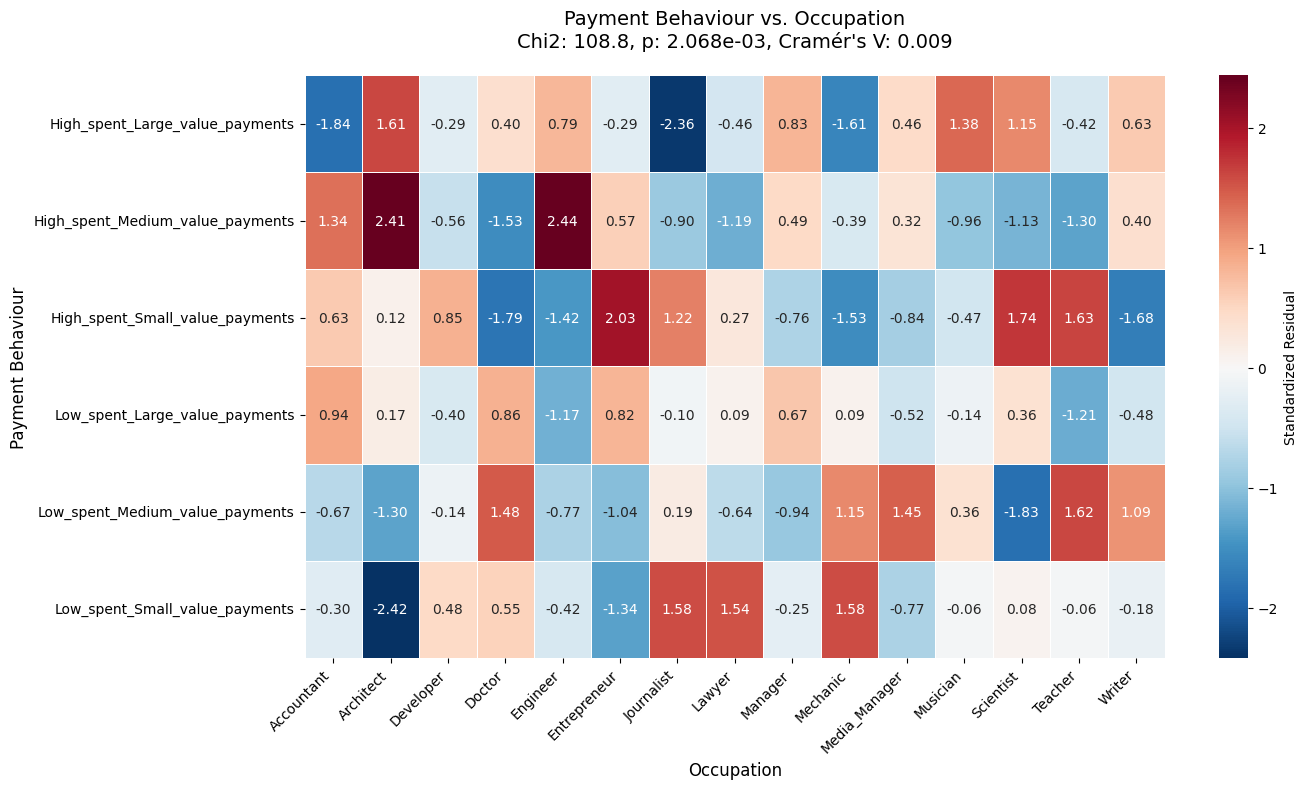

<Figure size 1400x800 with 0 Axes>

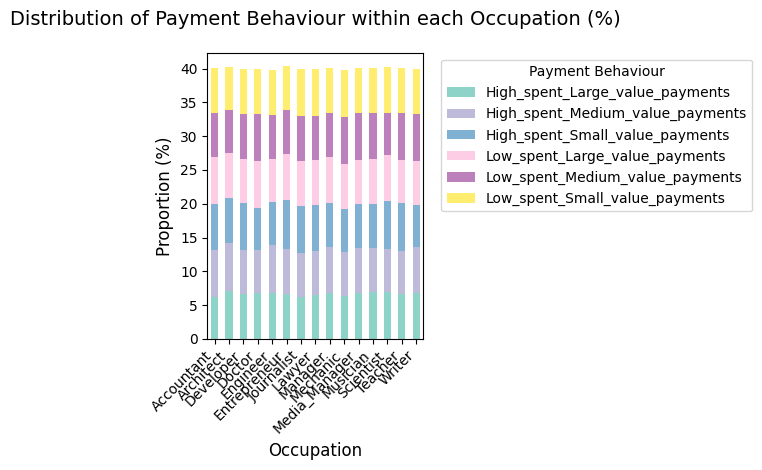

In [81]:
# 5. Visualize the Standardized Residuals
plt.figure(figsize=(14, 8))
sns.heatmap(standardized_residuals, annot=True, fmt=".2f", cmap="RdBu_r", center=0,
            cbar_kws={'label': 'Standardized Residual'}, linewidths=0.5)
plt.title(f"Payment Behaviour vs. Occupation\nChi2: {chi2:.1f}, p: {p_value:.3e}, Cramér's V: {cramers_v_value:.3f}",
          fontsize=14, pad=20)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Payment Behaviour", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Visualize the Proportions (Stacked Bar Chart)
proportions = (contingency_table.div(contingency_table.sum(axis=1), axis=0)) * 100

plt.figure(figsize=(14, 8))
ax = proportions.T.plot(kind='bar', stacked=True, colormap='Set3') # Transpose for better readability
plt.title('Distribution of Payment Behaviour within each Occupation (%)', fontsize=14, pad=20)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payment Behaviour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The association between occupation and payment behaviour, if it exists, is negligible or very weak in the population.


Analysis of Payment Behavior vs. Occupation

The analysis investigates whether a person's occupation has a significant association with their payment behavior.

1. Statistical Test and Significance

The Chi-Square test of independence was performed to determine if there is a statistically significant relationship between the two categorical variables: payment_behaviour and occupation. The results are as follows:

Chi-squared statistic: 108.8

P-value: 2.068e−03 (which is 0.002068)

Because the p-value (0.002068) is less than the significance level (α=0.05), we reject the null hypothesis. This indicates that there is a statistically significant association between a person's occupation and their payment behavior.

2. Strength of Association

While the Chi-Square test confirms an association, it doesn't tell us how strong that relationship is. For this, Cramér's V was calculated.

Cramér's V: 0.009

This value indicates a very weak association. This means that while the relationship is statistically significant, occupation is not a strong predictor of payment behavior on its own. The association is real, but it's not a major factor in explaining why people fall into certain payment behavior categories.

3. Post-Hoc Analysis: Where the Differences Lie

The heatmap of Standardized Residuals helps us understand which specific combinations of occupation and payment behavior are more or less frequent than we'd expect by chance.

Strong positive residuals (dark blue) indicate that the observed count for that cell is much higher than expected. For example, Engineers show a significantly higher-than-expected count in the High_spent_Small_value_payments category.

Strong negative residuals (dark red) indicate that the observed count is much lower than expected. For instance, Teachers and Scientists are less likely than expected to have Low_spent_Small_value_payments behavior.

4. Proportional Distribution

The stacked bar chart provides a visual breakdown of the distribution of payment behaviors within each occupation. It reinforces the post-hoc analysis by showing the relative proportion of each payment behavior for every occupation. For example, you can see that for Architects and Doctors, the High_spent_Medium_value_payments category makes up a larger proportion of their payment behavior compared to other groups.



:##### Which statistical test have you done to obtain P-Value?

  * The Chi-Square test(Chi2 statistic) is used to calculate the p-value.
  
  Note : Cramér's V	is used to test the strength of association

##### Why did you choose the specific statistical test?

The Chi-Square test of independence is used as both variables in our analysis—occupation and payment_behaviour—are categorical.  It tests the null hypothesis that there is no association between two categorical variables. By comparing the observed frequencies in our data to the frequencies we would expect to see if the variables were independent, it allows us to calculate a p-value to determine if the relationship is statistically significant. With
N~6000 and likely more than 2 categories, report Cramér’s V alongside chi-square test statistics and p-values for a meaningful effect size measure.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [82]:
# Handling Missing Values & Missing Value Imputation
missing=df.isnull().sum().sort_values()
missing

id                               0
customer_id                      0
month                            0
name                             0
age                              0
ssn                              0
occupation                       0
annual_income                    0
monthly_inhand_salary            0
num_bank_accounts                0
num_credit_card                  0
interest_rate                    0
num_of_loan                      0
type_of_loan                     0
delay_from_due_date              0
num_of_delayed_payment           0
changed_credit_limit             0
num_credit_inquiries             0
credit_mix                       0
outstanding_debt                 0
credit_utilization_ratio         0
credit_history_age               0
payment_of_min_amount            0
total_emi_per_month              0
amount_invested_monthly          0
payment_behaviour                0
monthly_balance                  0
credit_score                     0
debt_to_income                   0
expense_ratio                    0
avg_delay_ratio                  0
utilization_risk                 0
payment_of_min_amount_encoded    0
dtype: int64

No null values in the dataset

#### What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

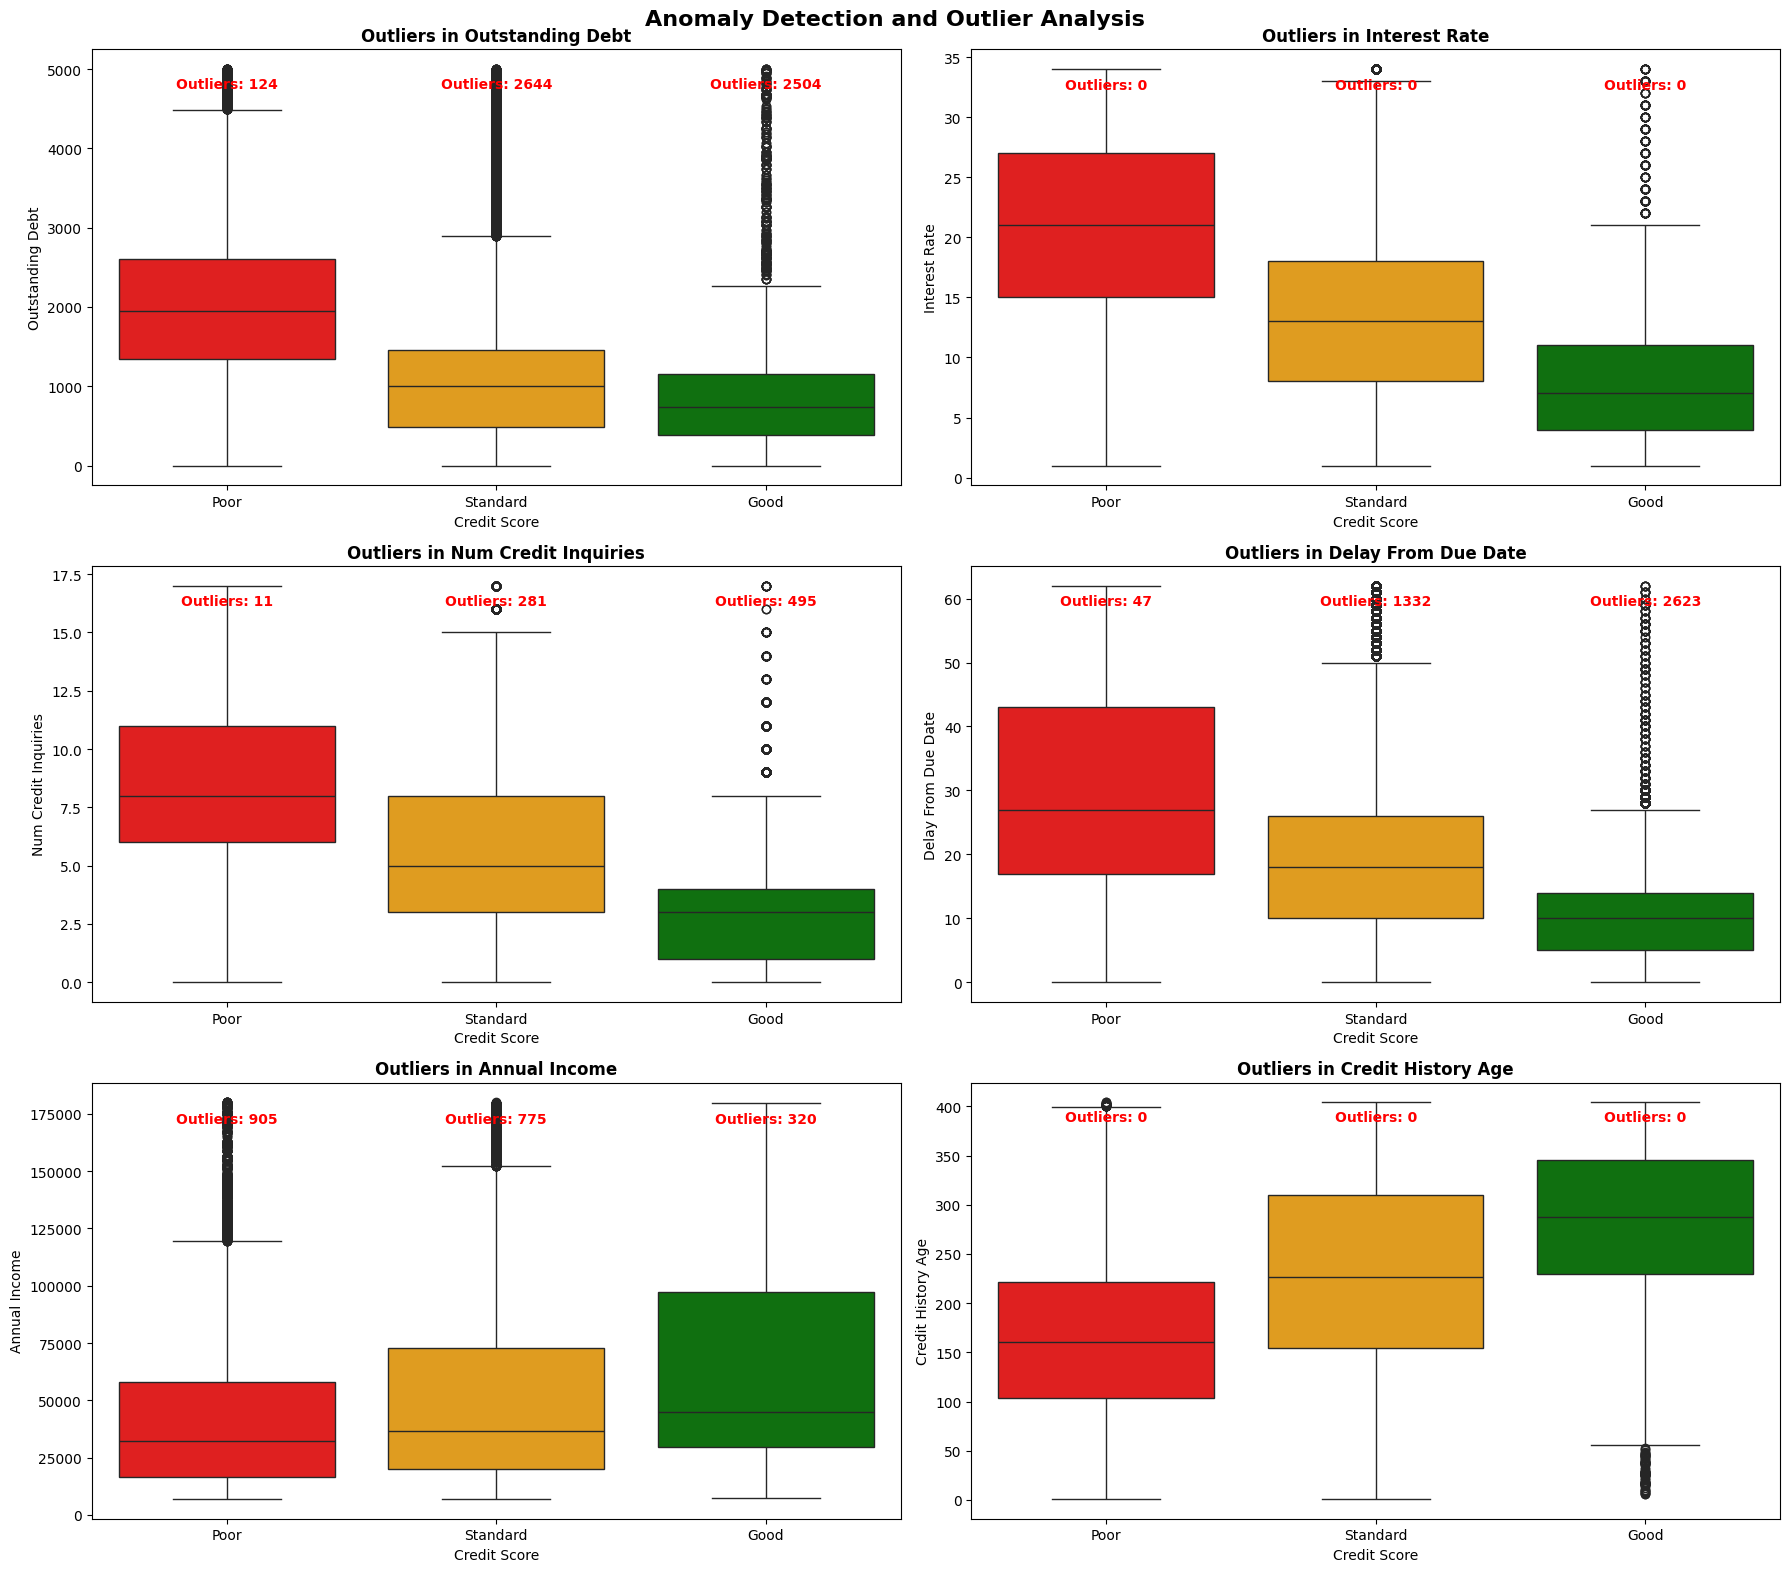

In [83]:
# Handling Outliers & Outlier treatments
# =============================================================================
# 6. ANOMALY DETECTION VISUALIZATION
# =============================================================================
# Create a 3x2 grid for 6 indicators (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle('Anomaly Detection and Outlier Analysis', fontsize=16, fontweight='bold')

# Define risk indicators
risk_indicators = ['outstanding_debt', 'interest_rate', 'num_credit_inquiries',
                   'delay_from_due_date', 'annual_income', 'credit_history_age']

color_palette = {'Good': 'green', 'Standard': 'orange', 'Poor': 'red'}

for i, indicator in enumerate(risk_indicators):
    # Calculate the subplot position (3 rows, 2 columns)
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Calculate outliers using IQR
    Q1 = df[indicator].quantile(0.25)
    Q3 = df[indicator].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[indicator] < lower_bound) | (df[indicator] > upper_bound)]

    # Plot
    sns.boxplot(x='credit_score', y=indicator, data=df, ax=ax, palette=color_palette)
    ax.set_title(f'Outliers in {indicator.replace("_", " ").title()}', fontweight='bold')
    ax.set_xlabel('Credit Score')
    ax.set_ylabel(indicator.replace('_', ' ').title())

    # Add outlier count annotation
    for j, score in enumerate(['Good', 'Standard', 'Poor']):
        outlier_count = len(outliers[outliers['credit_score'] == score])
        ax.text(j, ax.get_ylim()[1] * 0.9, f'Outliers: {outlier_count}',
                ha='center', va='bottom', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since there are no restriction on what ML models to choose from I would leave the outliers undisturbed as there are no unexplainable values to delete. I will discuss in the next team meeting and see if a Client Discussion is required on this topic.

I will use ML models like Random Forest that accounts for outliers

### 3. Categorical Encoding

In [84]:
df_obj = df[['payment_behaviour','credit_score','type_of_loan','occupation']]#'credit_mix','payment_of_min_amount'
# df_obj = df_obj.apply(LabelEncoder().fit_transform)

encoders = {}  # Dictionary to store encoders per column used later in Random forest classifier for target label extraction
for col in df_obj.columns:
    le = LabelEncoder()
    df_obj[col] = le.fit_transform(df[col])
    encoders[col] = le


In [85]:
# Encode your categorical columns
credit_mix_mapping = {'Standard': 0, 'Good': 1, 'Bad': -1}
df['credit_mix_encoded'] = df['credit_mix'].map(credit_mix_mapping)

payment_min_mapping = {'Yes': 1, 'No': 0, 'NM': 0}
df['payment_of_min_amount_encoded'] = df['payment_of_min_amount'].map(payment_min_mapping)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [86]:
# Expand Contraction

#### 2. Lower Casing

In [87]:
# Lower Casing

#### 3. Removing Punctuations

In [88]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [89]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [90]:
# Remove Stopwords

In [91]:
# Remove White spaces

#### 6. Rephrase Text

In [92]:
# Rephrase Text

#### 7. Tokenization

In [93]:
# Tokenization

#### 8. Text Normalization

In [94]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [95]:
# POS Taging

#### 10. Text Vectorization

In [96]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [97]:
df['type_of_loan'].value_counts()

type_of_loan
No Data                                                                                                                          12816
Credit-Builder Loan                                                                                                               1280
Personal Loan                                                                                                                     1272
Debt Consolidation Loan                                                                                                           1264
Student Loan                                                                                                                      1240
                                                                                                                                 ...  
Debt Consolidation Loan, Personal Loan, Mortgage Loan, Personal Loan, Not Specified, Mortgage Loan, and Home Equity Loan             8
Student Loan, Home Equity Loan, Student Loan, Personal Loan, Not Specified, Auto Loan, Auto Loan, and Debt Consolidation Loan        8
Not Specified, Auto Loan, Auto Loan, and Debt Consolidation Loan                                                                     8
Credit-Builder Loan, Auto Loan, Mortgage Loan, Not Specified, Student Loan, and Student Loan                                         8
Personal Loan, Not Specified, and Personal Loan                                                                                      8
Name: count, Length: 6260, dtype: int64

In [98]:
# Manipulate Features to minimize feature correlation and create new features
# MAP payment_of_min_amount to integers

payment_min_mapping = {'Yes': 1, 'No': 0, 'NM': 0}
df['payment_of_min_amount_encoded'] = df['payment_of_min_amount'].map(payment_min_mapping)
df['payment_of_min_amount_encoded'].value_counts()

payment_of_min_amount_encoded
1    52326
0    47674
Name: count, dtype: int64

The payment_of_min_amount contains two distinct values that represent the same NO

  * No

  * Not Specified
  
So combine them into 1 value

During the data exploration phase, we identified a significant number of entries within the type_of_loan column that are marked with inconsistent and non-descriptive values, specifically Not Specified and No

**Inconsistency Details**
The type_of_loan column contains two distinct values that represent missing or unspecified information:

  * Not Specified

  * No Data

While distinct in name, both categories signify the same issue: a lack of specific loan type information. For our immediate analytical needs, treating them as separate categories would be redundant and could skew our results.




  **Proposed Action**
We have taken the following steps to address this issue:

Categorization: We have combined all records with Not Specified and No Data into a new, single category. This new category will be temporarily labeled as Unknown.

Impact: This action will not delete any data but will normalize the column, making it easier to analyze and visualize. It ensures our current models and charts reflect a more accurate distribution.

  **Next Steps and Action Items**
Client Discussion: We recommend discussing this data inconsistency with the client in our next meeting. We should inquire about the source of these values and explore potential methods for obtaining more granular data in the future.

Data Source Investigation: Our team will continue to investigate the data source to see if there is a mapping or dictionary available that could help us classify these Unknown loans more accurately.

Future Data Handling: Pending client feedback, we will propose a long-term strategy for handling these missing values, which could include more advanced imputation techniques or requesting an updated dataset with cleaner values.

#### 2. Feature Selection

In [99]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score', 'debt_to_income', 'expense_ratio', 'avg_delay_ratio',
       'utilization_risk', 'payment_of_min_amount_encoded',
       'credit_mix_encoded'],
      dtype='object')

In [100]:
df_ = df.drop(['id','customer_id','ssn',],axis=1)

In [105]:
# Preprocessing
numeric_features = df[['month', 'age', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance']]

scaler = StandardScaler()
training_features_scaled = scaler.fit_transform(numeric_features)

In [104]:
training_features_df = pd.DataFrame(training_features_scaled, columns=numeric_features.columns)

# Combine all features
df_scaled = pd.concat([df_obj, training_features_df,df[['credit_mix_encoded','payment_of_min_amount_encoded']]], axis=1)
# df_scaled = pd.concat([df_scaled, df_encoded[['payment_of_min_amount_encoded','credit_mix_encoded']]], axis=1)


print("Final dataset shape:", df_scaled.shape)
print("Columns:", df_scaled.columns.tolist())


Final dataset shape: (100000, 24)
Columns: ['payment_behaviour', 'credit_score', 'type_of_loan', 'occupation', 'month', 'age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance', 'credit_mix_encoded', 'payment_of_min_amount_encoded']


In [103]:

training_features_df = pd.DataFrame(training_features_scaled, columns=numeric_features.columns)

# Combine all features
df_scaled = pd.concat([df_obj, training_features_df,df[['credit_mix_encoded','payment_of_min_amount_encoded']]], axis=1)
# df_scaled = pd.concat([df_scaled, df_encoded[['payment_of_min_amount_encoded','credit_mix_encoded']]], axis=1)



print("Final dataset shape:", df_scaled.shape)
print("Columns:", df_scaled.columns.tolist())


Final dataset shape: (100000, 24)
Columns: ['payment_behaviour', 'credit_score', 'type_of_loan', 'occupation', 'month', 'age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance', 'credit_mix_encoded', 'payment_of_min_amount_encoded']


In [106]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import mutual_info_classif

def select_features_mutual_info(X, y, threshold=0.01):
    """
    Select features based on mutual information with target
    """
    # Calculate mutual information
    mi_scores = mutual_info_classif(X, y)

    # Create feature importance dataframe
    mi_df = pd.DataFrame({
        'feature': X.columns,
        'mi_score': mi_scores
    }).sort_values('mi_score', ascending=False)

    # Select features above threshold
    selected_features = mi_df[mi_df['mi_score'] > threshold]['feature'].tolist()

    return selected_features, mi_df

#Usage (if you have target variable)
X_features = df_scaled.drop('credit_score', axis=1)
y_target = df_scaled['credit_score']
selected_mi_features, mi_scores_df = select_features_mutual_info(X_features, y_target)

In [107]:
selected_mi_features

['annual_income',
 'monthly_inhand_salary',
 'outstanding_debt',
 'total_emi_per_month',
 'amount_invested_monthly',
 'type_of_loan',
 'credit_mix_encoded',
 'interest_rate',
 'delay_from_due_date',
 'num_credit_inquiries',
 'num_credit_card',
 'num_bank_accounts',
 'payment_of_min_amount_encoded',
 'credit_history_age',
 'changed_credit_limit',
 'num_of_delayed_payment',
 'num_of_loan',
 'monthly_balance',
 'age']

In [108]:
mi_scores_df

feature  mi_score
5                   annual_income  0.625671
6           monthly_inhand_salary  0.619181
15               outstanding_debt  0.613636
18            total_emi_per_month  0.455739
19        amount_invested_monthly  0.375756
1                    type_of_loan  0.338118
21             credit_mix_encoded  0.189986
9                   interest_rate  0.171663
11            delay_from_due_date  0.122250
14           num_credit_inquiries  0.118106
8                 num_credit_card  0.111569
7               num_bank_accounts  0.108350
22  payment_of_min_amount_encoded  0.102623
17             credit_history_age  0.101258
13           changed_credit_limit  0.101040
12         num_of_delayed_payment  0.089950
10                    num_of_loan  0.089525
20                monthly_balance  0.036239
4                             age  0.024163
0               payment_behaviour  0.009478
3                           month  0.003492
16       credit_utilization_ratio  0.003102
2                      occupation  0.000094

* Top Tier (MI > 0.3): The Powerhouse Predictors
These features have a very strong relationship with credit score and are absolutely critical for your model.

  * annual_income (0.624) & monthly_inhand_salary (0.618): These are by far the most important features. This makes perfect sense: income is the primary driver of creditworthiness. A higher income indicates a greater capacity to repay debt, which is a fundamental factor in credit scoring.

  * outstanding_debt (0.612): The second most important factor. This represents the total debt burden. A high amount of existing debt is a major red flag for lenders, significantly impacting the credit score.

  * total_emi_per_month (0.456): Directly related to debt burden. High monthly EMI payments strain a customer's cash flow, increasing the risk of default.

  * amount_invested_monthly (0.377): A very interesting and important feature. This acts as a strong proxy for financial stability and discipline. Customers who invest regularly are likely more financially savvy and stable, which is positive for their credit score.

  * type_of_loan (0.337): The types of loans a customer has (e.g., mortgage, auto, personal) reveal their financial behavior and risk profile. A mortgage is often seen as "good" debt, while many payday loans are a major risk indicator.

* Middle Tier (0.1 < MI < 0.3): Strong Predictors : These features have a clear and important relationship with the target.

  * credit_mix_encoded (0.188): A healthy mix of credit types (revolving, installment) shows experienced and responsible credit management.

  * interest_rate (0.170): This is a consequence, not a cause. Customers deemed riskier are given higher interest rates. The model learns to associate high rates with poor credit scores.

  * delay_from_due_date (0.125): Direct measure of payment behavior. Even small delays can negatively impact a credit score.

  * num_credit_inquiries (0.119): Many recent inquiries suggest a customer is "credit hungry" and potentially in financial distress, which is a negative signal.

  * num_credit_card (0.109), changed_credit_limit (0.106), num_bank_accounts (0.104): These all relate to credit access and management behavior.

  * payment_of_min_amount_encoded (0.101): Only making the minimum payment suggests cash flow problems and is a negative indicator.

  * credit_history_age (0.100): A longer credit history provides more data and can be positive, assuming the history is good.

* Lower Tier (0.01 < MI < 0.1): Weak but Potentially Useful Predictors
These features have some information but are not strong drivers on their own. They might provide marginal gains in a complex model.

  * num_of_loan (0.089), num_of_delayed_payment (0.088), monthly_balance (0.036), age (0.026)

* Negligible Tier (MI < 0.01): Candidates for Removal
These features are practically independent of the credit score. You should strongly consider removing them to make your model simpler and less prone to overfitting.

  * payment_behaviour (0.012): This is surprising and suggests a potential issue. Payment behavior should be highly important. Check for data quality or if it's redundant with other delay-related features.

  * occupation (0.002): Has almost no predictive power on its own.

  * credit_utilization_ratio (0.002): This is highly surprising and likely incorrect. Credit utilization is a cornerstone of credit scoring (e.g., the 30% rule). You must investigate this. It could be a calculation error, very low variance, or that its effect is already captured by outstanding_debt.

  * month (0.001): As expected, the month of record is irrelevant.



In [109]:
corr_matrix = df_scaled.corr(method="spearman", numeric_only=True)

cor_target = abs(corr_matrix["credit_score"])
cor_target
# relevant_train_features = cor_target[cor_target>0.25]
# relevant_train_features

payment_behaviour                0.009040
credit_score                     1.000000
type_of_loan                     0.004930
occupation                       0.004247
month                            0.036735
age                              0.034029
annual_income                    0.036622
monthly_inhand_salary            0.035014
num_bank_accounts                0.114610
num_credit_card                  0.049838
interest_rate                    0.081200
num_of_loan                      0.012349
delay_from_due_date              0.084402
num_of_delayed_payment           0.141849
changed_credit_limit             0.180935
num_credit_inquiries             0.014814
outstanding_debt                 0.044360
credit_utilization_ratio         0.007147
credit_history_age               0.046641
total_emi_per_month              0.031602
amount_invested_monthly          0.037365
monthly_balance                  0.012456
credit_mix_encoded               0.216012
payment_of_min_amount_encoded    0.192276
Name: credit_score, dtype: float64

In [110]:
# Select features above threshold
threshold = 0.03
selected_features = cor_target[cor_target > threshold].sort_values(ascending=False)

# Convert to list (if needed)
selected_features_list = selected_features.index.tolist()
print("Selected Features (corr > 0.01):")
print(selected_features)
print(f"\nNumber of selected features: {len(selected_features)}")


Selected Features (corr > 0.01):
credit_score                     1.000000
credit_mix_encoded               0.216012
payment_of_min_amount_encoded    0.192276
changed_credit_limit             0.180935
num_of_delayed_payment           0.141849
num_bank_accounts                0.114610
delay_from_due_date              0.084402
interest_rate                    0.081200
num_credit_card                  0.049838
credit_history_age               0.046641
outstanding_debt                 0.044360
amount_invested_monthly          0.037365
month                            0.036735
annual_income                    0.036622
monthly_inhand_salary            0.035014
age                              0.034029
total_emi_per_month              0.031602
Name: credit_score, dtype: float64

Number of selected features: 17


In this phase, those feature(s) will be selected which have the better correlation (threshold > 0.03) with the target variable isFraud. These features will help to develop a better classification model for predictive analysis.

##### What all feature selection methods have you used  and why?

  Statistical and Filter Methods

  * Correlation Analysis:

How it works: Calculate the correlation (  Spearman ) between each numerical feature and the credit_score_numeric target.

  * The Mutual Information (MI) scores provide a powerful, non-linear measure of the dependency between each feature and the target variable (credit_score). This is one of the best ways to select features to avoid overfitting, as it captures any kind of relationship, not just linear correlations.

Here is a breakdown and interpretation of your results:

  * What Mutual Information (MI) Score Means
MI Score = 0: The feature and the target are completely independent. The feature provides no information about the target.

  * Higher MI Score: A stronger non-linear dependency exists between the feature and the target. The feature is very useful for predicting the target.

Kruskal Wallis Test and Random Forest Classifier

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
* The Payment_of_Min_Amount column had some ambiguity ('NM'), which was clarified by replacing it with 'No'.

* Numeric data was cleaned up by converting floats to integers where appropriate and rounding monetary values for precision.

* Personal columns like Name and SSN were dropped as they were not useful for analysis.

* The dataset was well-prepared, with no missing or duplicate values, indicating a clean and ready-to-use dataset for further analysis.

In [ ]:
df.drop(['id','customer_id','name','ssn'],axis=1,inplace=True)

In [ ]:
# Transform Your data

# convert float into int
df['num_bank_accounts'] = df['num_bank_accounts'].astype('int64')
df['age'] =df['age'].astype('int64')
df['num_credit_inquiries']= df['num_credit_inquiries'].astype('int64')
# round upto two decimal
# df['Monthly_Inhand_Salary'].round(2)
# df['Total_EMI_per_month'].round(2)
# df['Amount_invested_monthly'].round(2)
df.info()


In [ ]:
df['monthly_inhand_salary']= df['monthly_inhand_salary'].round(2)
df['total_emi_per_month']= df['total_emi_per_month'].round(2)
df['amount_invested_monthly'] = df['amount_invested_monthly'].round(2)

### 6. Data Scaling

In [111]:
# Preprocessing
numeric_features = df[['month', 'age', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance']]

scaler = StandardScaler()
training_features_scaled = scaler.fit_transform(numeric_features)

In [112]:

training_features_df = pd.DataFrame(training_features_scaled, columns=numeric_features.columns)

# Combine all features
df_scaled = pd.concat([df_obj, training_features_df,df[['credit_mix_encoded','payment_of_min_amount_encoded']]], axis=1)
# df_scaled = pd.concat([df_scaled, df_encoded[['payment_of_min_amount_encoded','credit_mix_encoded']]], axis=1)



print("Final dataset shape:", df_scaled.shape)
print("Columns:", df_scaled.columns.tolist())


Final dataset shape: (100000, 24)
Columns: ['payment_behaviour', 'credit_score', 'type_of_loan', 'occupation', 'month', 'age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance', 'credit_mix_encoded', 'payment_of_min_amount_encoded']


In [113]:
training_features_df = pd.DataFrame(training_features_scaled, columns=numeric_features.columns)
training_features_df

month       age  annual_income  monthly_inhand_salary  \
0     -1.527525 -0.958344      -0.819625              -0.744545   
1     -1.091089 -0.958344      -0.819625              -0.744545   
2     -0.654654 -0.958344      -0.819625              -0.744545   
3     -0.218218 -0.958344      -0.819625              -0.744545   
4      0.218218 -0.958344      -0.819625              -0.744545   
...         ...       ...            ...                    ...   
99995 -0.218218 -0.772552      -0.283978              -0.262945   
99996  0.218218 -0.772552      -0.283978              -0.262945   
99997  0.654654 -0.772552      -0.283978              -0.262945   
99998  1.091089 -0.772552      -0.283978              -0.262945   
99999  1.527525 -0.772552      -0.283978              -0.262945   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0              -0.913438        -0.741899      -1.319266     0.190946   
1              -0.913438        -0.741899      -1.319266     0.190946   
2              -0.913438        -0.741899      -1.319266     0.190946   
3              -0.913438        -0.741899      -1.319266     0.190946   
4              -0.913438        -0.741899      -1.319266     0.190946   
...                  ...              ...            ...          ...   
99995          -0.527829         0.225646      -0.861667    -0.626600   
99996          -0.527829         0.225646      -0.861667    -0.626600   
99997          -0.527829         0.225646      -0.861667    -0.626600   
99998          -0.527829         0.225646      -0.861667    -0.626600   
99999          -0.527829         0.225646      -0.861667    -0.626600   

       delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
0                -1.221347               -1.012183              0.120990   
1                -1.221347               -1.493173              0.120990   
2                -1.221347               -1.012183              0.120990   
3                -1.086253               -1.493173             -0.635503   
4                -1.018705               -1.493173              0.120990   
...                    ...                     ...                   ...   
99995             0.129595               -1.012183              0.155789   
99996            -0.208140               -1.012183              0.155789   
99997             0.399784               -1.172513              0.155789   
99998            -0.073046               -1.172513              0.155789   
99999            -0.208140               -1.172513              0.155789   

       num_credit_inquiries  outstanding_debt  credit_utilization_ratio  \
0                 -0.464928         -0.533485                 -1.068075   
1                 -0.464928         -0.533485                 -0.067460   
2                 -0.464928         -0.533485                 -0.718251   
3                 -0.464928         -0.533485                 -0.176902   
4                 -0.464928         -0.533485                 -1.462849   
...                     ...               ...                       ...   
99995             -0.723472         -0.799776                  0.464116   
99996             -0.723472         -0.799776                  1.619123   
99997             -0.723472         -0.799776                  1.753971   
99998             -0.723472         -0.799776                  0.264775   
99999             -0.723472         -0.799776                  0.372263   

       credit_history_age  total_emi_per_month  amount_invested_monthly  \
0                0.439200            -0.439486                -0.862193   
1                0.449232            -0.439486                -0.862193   
2                0.459264            -0.439486                -0.862193   
3                0.469296            -0.439486                -0.862193   
4                0.479328            -0.439486                -0.862193   
...                   ...                  ...                  

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?



##### **Yes I am planning to use clustering when I will use the dimensionality Reduction techniques like PCA.**

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [114]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled.drop(['credit_score'],axis=1), df_scaled['credit_score'], test_size=0.2, random_state=42, stratify=df_scaled['credit_score']
)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

In [115]:
df['credit_score'].value_counts()

credit_score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

The target variable credit_score is significantly imbalanced.

Let's break down the numbers to understand the severity:

  * Standard: 53,174 samples (53.2%)

  * Poor: 28,998 samples (29.0%)

  * Good: 17,828 samples (17.8%)

**Analysis of the Imbalance:**
  * Majority Class: The "Standard" class is the majority class, making up over half of your entire dataset.

  * Minority Class: The "Good" class is the clear minority class, with less than half the number of samples than the "Poor" class and less than a third of the "Standard" class.

Imbalance Ratio: The ratio of the majority class (Standard) to the minority class (Good) is approximately 3:1 (53,174 / 17,828 ≈ 2.98). This is a substantial imbalance that can cause problems for machine learning models.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss, roc_auc_score, classification_report
import shap

### Using Random Forest, XGBoost, LightGBM and CatBoost	as they are robust to outliers, non-linear data and class imbalances

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
#                             f1_score, precision_score, recall_score, roc_auc_score,
#                             roc_curve, auc, log_loss)
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# # Try to import CatBoost, if it fails, use XGBoost as a fallback
# try:
#     from catboost import CatBoostClassifier
#     print("CatBoostClassifier imported successfully.")
#     MODEL = CatBoostClassifier(verbose=0) # verbose=0 suppresses the output
# except ModuleNotFoundError:
#     print("CatBoost not found. Falling back to XGBoost.")
#     MODEL = XGBClassifier()
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# import warnings
# warnings.filterwarnings('ignore')



# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False),
    'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}
best_model = None
best_accuracy = 0

plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items()):
    # # Create pipeline
    # model = [('classifier', model)]


    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    logloss = log_loss(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'log_loss': logloss,
        'model': model
    }

    # Check if best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Plot confusion matrix
    plt.subplot(2, 3, i+1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_pred))
    plt.title(f'{name}\nAccuracy: {accuracy:.3f}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

# Display results
results_df = pd.DataFrame(results).T
print("="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)
print(results_df.round(4))

# Best model analysis
print("\n" + "="*60)
print("BEST MODEL DETAILS")
print("="*60)
best_model_name = results_df['accuracy'].idxmax()
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {results_df.loc[best_model_name, 'accuracy']:.4f}")

# Detailed classification report for best model
y_pred_best = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# # Feature importance for tree-based models
# if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
#     # Get feature names after preprocessing
#     feature_names = (numerical_cols +
#                      list(best_model.named_steps['preprocessor']
#                          .named_transformers_['cat']
#                          .named_steps['onehot']
#                          .get_feature_names_out(categorical_cols)))

#     importances = best_model.named_steps['classifier'].feature_importances_
#     feature_importance_df = pd.DataFrame({
#         'feature': feature_names,
#         'importance': importances
#     }).sort_values('importance', ascending=False).head(15)

#     plt.figure(figsize=(12, 8))
#     sns.barplot(x='importance', y='feature', data=feature_importance_df)
#     plt.title(f'Top 15 Feature Importance - {best_model_name}')
#     plt.tight_layout()
#     plt.show()

# Cross-validation for best model
print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS")
print("="*60)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")









# Error analysis
print("\n" + "="*60)
print("ERROR ANALYSIS")
print("="*60)

# Get the label encoder for credit_score if available, or create mapping
# Assuming you have an encoder for credit_score, otherwise create a mapping
try:
    # If you used LabelEncoder on y, get the inverse mapping
    label_mapping = {i: label for i, label in enumerate(encoders['credit_score'].classes_)}
except:
    # Fallback: create mapping based on your known classes
    label_mapping = {0: 'Good', 1: 'Standard', 2: 'Poor'}  # Adjust based on your actual encoding

# Convert numerical predictions back to original labels for error analysis
y_test_labels = [label_mapping[val] for val in y_test]
y_pred_best_labels = [label_mapping[val] for val in y_pred_best]

# Misclassification analysis
misclassified = X_test[y_test != y_pred_best].copy()
misclassified['actual'] = [label_mapping[val] for val in y_test[y_test != y_pred_best]]
misclassified['predicted'] = [label_mapping[val] for val in y_pred_best[y_test != y_pred_best]]
misclassified['error_type'] = misclassified['actual'] + ' -> ' + misclassified['predicted']

print(f"Total misclassified samples: {len(misclassified)}/{len(X_test)} ({len(misclassified)/len(X_test)*100:.2f}%)")

# Most common error patterns
error_patterns = misclassified['error_type'].value_counts().head(5)
print("\nMost common error patterns:")
for pattern, count in error_patterns.items():
    print(f"  {pattern}: {count} cases")

# Advanced metrics for multiclass classification
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

kappa = cohen_kappa_score(y_test, y_pred_best)
mcc = matthews_corrcoef(y_test, y_pred_best)

print(f"\nAdvanced Metrics:")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")






# # Error analysis
# print("\n" + "="*60)
# print("ERROR ANALYSIS")
# print("="*60)

# # Misclassification analysis
# misclassified = X_test[y_test != y_pred_best].copy()
# misclassified['actual'] = y_test[y_test != y_pred_best]
# misclassified['predicted'] = y_pred_best[y_test != y_pred_best]
# misclassified['error_type'] = misclassified['actual'] + ' -> ' + misclassified['predicted']

# print(f"Total misclassified samples: {len(misclassified)}/{len(X_test)} ({len(misclassified)/len(X_test)*100:.2f}%)")

# # Most common error patterns
# error_patterns = misclassified['error_type'].value_counts().head(5)
# print("\nMost common error patterns:")
# for pattern, count in error_patterns.items():
#     print(f"  {pattern}: {count} cases")

# # Advanced metrics for multiclass classification
# from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

# kappa = cohen_kappa_score(y_test, y_pred_best)
# mcc = matthews_corrcoef(y_test, y_pred_best)

# print(f"\nAdvanced Metrics:")
# print(f"Cohen's Kappa: {kappa:.4f}")
# print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# # ROC Curve for multiclass (one-vs-rest)
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import roc_curve, auc

# # Binarize the output
# y_test_bin = label_binarize(y_test, classes=np.unique(y))
# y_pred_proba_bin = best_model.predict_proba(X_test)

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(len(np.unique(y))):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_bin[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curves
# plt.figure(figsize=(10, 8))
# colors = ['blue', 'red', 'green']
# for i, color in zip(range(len(np.unique(y))), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label='ROC curve of class {0} (area = {1:0.2f})'.format(np.unique(y)[i], roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for Multiclass Classification')
# plt.legend(loc="lower right")
# plt.show()

# # Model deployment ready function
# def predict_credit_score(model, new_data):
#     """
#     Predict credit score for new data
#     """
#     predictions = model.predict(new_data)
#     probabilities = model.predict_proba(new_data)

#     result_df = pd.DataFrame({
#         'predicted_credit_score': predictions,
#         'probability': np.max(probabilities, axis=1)
#     })

#     return result_df

# # Example usage:
# # new_customers = X_test.head(5)  # Example new data
# # predictions = predict_credit_score(best_model, new_customers)
# # print(predictions)

# # Save the best model
# import joblib
# joblib.dump(best_model, 'best_credit_score_model.pkl')
# print("\nBest model saved as 'best_credit_score_model.pkl'")

# # Final summary
# print("\n" + "="*60)
# print("FINAL SUMMARY")
# print("="*60)
# print(f"Best performing model: {best_model_name}")
# print(f"Test Accuracy: {results_df.loc[best_model_name, 'accuracy']:.4f}")
# print(f"F1 Score: {results_df.loc[best_model_name, 'f1_score']:.4f}")
# print(f"Precision: {results_df.loc[best_model_name, 'precision']:.4f}")
# print(f"Recall: {results_df.loc[best_model_name, 'recall']:.4f}")
# print(f"Log Loss: {results_df.loc[best_model_name, 'log_loss']:.4f}")
# print(f"Cohen's Kappa: {kappa:.4f}")
# print(f"Matthews Correlation Coefficient: {mcc:.4f}")

['month', 'age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'type_of_loan', 'delay_from_due_date', 'num_of_delayed_payment',
       'changed_credit_limit', 'num_credit_inquiries', 'credit_mix',
       'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly',

In [ ]:
# df_obj = df[['payment_behaviour','credit_score','type_of_loan','occupation']]#'credit_mix','payment_of_min_amount'
# df_obj = df_obj.apply(LabelEncoder().fit_transform())

In [ ]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


# # Preprocessing
# numeric_features = X[['month', 'age', 'annual_income', 'monthly_inhand_salary',
#        'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
#        'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
#        'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
#        'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
#        'monthly_balance']]

# scaler = StandardScaler()
# training_features_scaled = scaler.fit_transform(numeric_features)

In [ ]:
# training_features_df = pd.DataFrame(training_features_scaled, columns=numeric_features.columns)

# training_features_df

In [ ]:
# df_obj = df_obj.apply(LabelEncoder().fit_transform)

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler, LabelEncoder

# # Preprocessing
# numeric_features = X[['month', 'age', 'annual_income', 'monthly_inhand_salary',
#        'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
#        'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
#        'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
#        'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
#        'monthly_balance']]

# scaler = StandardScaler()
# training_features_scaled = scaler.fit_transform(numeric_features)

# # Convert the numpy array back to DataFrame with proper column names
# training_features_scaled_df = pd.DataFrame(
#     training_features_scaled,
#     columns=numeric_features.columns,
#     index=numeric_features.index
# )

# df_obj = df[['payment_behaviour','credit_score','credit_mix','payment_of_min_amount','type_of_loan','occupation']]
# df_obj = df_obj.apply(LabelEncoder().fit_transform)

# # Now concatenate DataFrames
# df_scaled = pd.concat([df_obj, training_features_scaled_df], axis=1)

# print("Scaled DataFrame shape:", df_scaled.shape)
# print("Scaled DataFrame columns:", df_scaled.columns.tolist())

In [ ]:
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            f1_score, precision_score, recall_score, log_loss,
                            roc_auc_score, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [ ]:
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(
#     df_scaled.drop(['credit_score'],axis=1), df_scaled['credit_score'], test_size=0.2, random_state=42, stratify=df_encoded['credit_score']
# )

In [ ]:
# # Column transformer with only numeric columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#     ]
# )

In [ ]:
# # Fit and transform your training data
# X_train_scaled = preprocessor.fit_transform(X_train)
# scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_features +
#                          [col for col in X_train.columns if col not in numeric_features])
# scaled_df.head()

In [ ]:
# # =============================================================================
# # 1. LOGISTIC REGRESSION
# # =============================================================================
# print("="*60)
# print("LOGISTIC REGRESSION MODEL")
# print("="*60)


# # Final pipeline without categorical transformer
# lr_pipeline = LogisticRegression(
#         multi_class='multinomial',
#         solver='lbfgs',
#         max_iter=1000,
#         random_state=42,
#         class_weight='balanced'
#     )

# lr_pipeline.fit(X_train, y_train)
# y_pred_lr = lr_pipeline.predict(X_test)
# y_proba_lr = lr_pipeline.predict_proba(X_test)

# # Calculate metrics
# lr_metrics = {
#     'accuracy': accuracy_score(y_test, y_pred_lr),
#     'f1_score': f1_score(y_test, y_pred_lr, average='weighted'),
#     'precision': precision_score(y_test, y_pred_lr, average='weighted'),
#     'recall': recall_score(y_test, y_pred_lr, average='weighted'),
#     'log_loss': log_loss(y_test, y_proba_lr),
#     'roc_auc': roc_auc_score(y_test, y_proba_lr, multi_class='ovr')
# }

# print("Classification Report:")
# print(classification_report(y_test, y_pred_lr, target_names=encoders['credit_score'].classes_))
# print(f"Accuracy: {lr_metrics['accuracy']:.4f}")
# print(f"F1 Score: {lr_metrics['f1_score']:.4f}")

In [ ]:
# print(f"Accuracy: {lr_metrics['precision']:.4f}")
# precision_score(y_test, y_pred_lr, average='weighted')


In [ ]:
#  GET CLASSIFICATION MATRIX (CONFUSION MATRIX)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Create confusion matrix
# cm = confusion_matrix(y_test, y_pred_lr)
# print("Confusion Matrix:")
# print(cm)


In [ ]:
# Create confusion matrix
# cm = confusion_matrix(y_test, y_pred_rf)
# print("Confusion Matrix:")
# print(cm)


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import warnings
# warnings.filterwarnings('ignore')

# # Assuming you have your DataFrame 'df' ready
# # Let's prepare the data first

# # Define features and target
# features = ['annual_income', 'outstanding_debt', 'credit_utilization_ratio',
#            'num_of_delayed_payment', 'num_credit_inquiries', 'credit_history_age',
#            'total_emi_per_month', 'monthly_inhand_salary', 'monthly_balance',
#            'age', 'num_bank_accounts', 'num_credit_card', 'interest_rate',
#            'num_of_loan', 'delay_from_due_date', 'changed_credit_limit',
#            'amount_invested_monthly', 'payment_behaviour', 'credit_mix',
#            'payment_of_min_amount', 'type_of_loan', 'occupation']

# # Handle categorical features - convert to numeric first
# df_encoded = df.copy()

# # Encode categorical variables
# categorical_cols = ['payment_behaviour', 'credit_mix', 'payment_of_min_amount',
#                    'type_of_loan', 'occupation']

# for col in categorical_cols:
#     if col in df_encoded.columns:
#         le = LabelEncoder()
#         df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# # Prepare X and y
# X = df_encoded[features]
# y = df_encoded['credit_score']  # Assuming credit_score is already encoded or categorical

# # If credit_score is not encoded, encode it
# if y.dtype == 'object':
#     le_target = LabelEncoder()
#     y = le_target.fit_transform(y)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # =============================================================================
# # 1. RANDOM FOREST FEATURE IMPORTANCE
# # =============================================================================
# print("="*60)
# print("RANDOM FOREST FEATURE SELECTION")
# print("="*60)

# # Train Random Forest to get feature importance
# rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# rf.fit(X_train, y_train)


In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print("\n" + "="*60)
print("RANDOM FOREST MODEL")
print("="*60)

rf_pipeline =RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        max_depth=10,
        n_jobs=-1
    )

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)

# Calculate metrics
rf_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'f1_score': f1_score(y_test, y_pred_rf, average='weighted'),
    'precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'log_loss': log_loss(y_test, y_proba_rf),
    'roc_auc': roc_auc_score(y_test, y_proba_rf, multi_class='ovr')
}

print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=encoders['credit_score'].classes_))
print(f"Accuracy: {rf_metrics['accuracy']:.4f}")
print(f"F1 Score: {rf_metrics['f1_score']:.4f}")


In [ ]:
# Extract feature importances
importances = rf_pipeline.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Optional: filter features with importance > 0 if needed
selected_features = feature_importance_df[feature_importance_df['importance'] > 0]

# Print top features
print("\nFeature importances from Random Forest:\n")
print(selected_features)

# Optionally, get list of important feature names
important_features = selected_features['feature'].tolist()

print("\nSelected important features:")
print(important_features)


In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_pipeline.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance Ranking:")
print(feature_importance.to_string(index=False))

# =============================================================================
# 2. VISUALIZE FEATURE IMPORTANCE
# =============================================================================
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()  # Most important at top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 3. AUTOMATIC FEATURE SELECTION USING THRESHOLD
# =============================================================================
# Method 1: Select features above mean importance
mean_importance = feature_importance['importance'].mean()
selected_features_mean = feature_importance[feature_importance['importance'] > mean_importance]['feature'].tolist()

print(f"\nFeatures above mean importance ({mean_importance:.4f}):")
print(selected_features_mean)

# Method 2: Select top k features
k = 10
selected_features_topk = feature_importance['feature'][:k].tolist()
print(f"\nTop {k} features:")
print(selected_features_topk)

# =============================================================================
# 4. USING SelectFromModel FOR AUTOMATED SELECTION
# =============================================================================
# Create selector object
selector = SelectFromModel(rf_pipeline, threshold='mean', prefit=True)  # 'mean', 'median', or specific value

# Get selected features
selected_features_mask = selector.get_support()
selected_features = X_train.columns[selected_features_mask].tolist()

print(f"\nSelected features using SelectFromModel (threshold='mean'):")
print(selected_features)

# Transform datasets
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"\nOriginal shape: {X_train.shape}")
print(f"Selected shape: {X_train_selected.shape}")
print(f"Number of features reduced from {X_train.shape[1]} to {X_train_selected.shape[1]}")

# =============================================================================
# 5. COMPARE PERFORMANCE WITH SELECTED FEATURES
# =============================================================================
print("\n" + "="*60)
print("PERFORMANCE COMPARISON")
print("="*60)

# Train model with all features
rf_all = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all.fit(X_train, y_train)
y_pred_all = rf_all.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)

# Train model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy with ALL features: {accuracy_all:.4f}")
print(f"Accuracy with SELECTED features: {accuracy_selected:.4f}")

if accuracy_selected >= accuracy_all:
    print("✅ Feature selection maintained or improved performance!")
else:
    print("⚠️  Feature selection slightly reduced performance")

# =============================================================================
# 6. FIND OPTIMAL NUMBER OF FEATURES
# =============================================================================
print("\n" + "="*60)
print("FINDING OPTIMAL NUMBER OF FEATURES")
print("="*60)

# Test different numbers of features
n_features_range = range(5, min(20, len(feature_importance)), 2)
accuracies = []

for n_features in n_features_range:
    selected_features = feature_importance['feature'][:n_features].tolist()
    X_train_sub = X_train[selected_features]
    X_test_sub = X_test[selected_features]

    rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_temp.fit(X_train_sub, y_train)
    y_pred_temp = rf_temp.predict(X_test_sub)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    accuracies.append(accuracy_temp)

    print(f"Features: {n_features:2d} | Accuracy: {accuracy_temp:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(n_features_range, accuracies, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.grid(True, alpha=0.3)
plt.axhline(y=accuracy_all, color='r', linestyle='--', label='All Features Accuracy')
plt.legend()
plt.show()

# Find optimal number
optimal_n = n_features_range[np.argmax(accuracies)]
print(f"\nOptimal number of features: {optimal_n}")
print(f"Best accuracy: {max(accuracies):.4f}")

# =============================================================================
# 7. FINAL SELECTED FEATURES
# =============================================================================
final_selected_features = feature_importance['feature'][:optimal_n].tolist()
print(f"\nFinal selected features ({optimal_n}):")
for i, feature in enumerate(final_selected_features, 1):
    importance = feature_importance[feature_importance['feature'] == feature]['importance'].values[0]
    print(f"{i:2d}. {feature:25} (importance: {importance:.4f})")

# =============================================================================
# 8. FEATURE CORRELATION ANALYSIS
# =============================================================================
# Check correlation among selected features
plt.figure(figsize=(12, 10))
selected_df = X_train[final_selected_features]
correlation_matrix = selected_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

# Identify highly correlated features (|correlation| > 0.8)
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j],
                            correlation_matrix.iloc[i, j]))

if high_corr:
    print("\nHighly correlated feature pairs (|corr| > 0.8):")
    for feat1, feat2, corr in high_corr:
        print(f"  {feat1} - {feat2}: {corr:.3f}")
else:
    print("\nNo highly correlated feature pairs found.")

# =============================================================================
# 9. COMPREHENSIVE FEATURE ANALYSIS REPORT
# =============================================================================
print("\n" + "="*60)
print("COMPREHENSIVE FEATURE ANALYSIS REPORT")
print("="*60)

print(f"Total features analyzed: {len(feature_importance)}")
print(f"Optimal features selected: {optimal_n}")
print(f"Reduction: {len(feature_importance) - optimal_n} features removed")
print(f"Accuracy with all features: {accuracy_all:.4f}")
print(f"Accuracy with selected features: {max(accuracies):.4f}")

# Feature importance categories
high_importance = feature_importance[feature_importance['importance'] > 0.05]
medium_importance = feature_importance[(feature_importance['importance'] > 0.01) &
                                      (feature_importance['importance'] <= 0.05)]
low_importance = feature_importance[feature_importance['importance'] <= 0.01]

print(f"\nHigh importance features (> 0.05): {len(high_importance)}")
print(f"Medium importance features (0.01-0.05): {len(medium_importance)}")
print(f"Low importance features (≤ 0.01): {len(low_importance)}")

print("\nTop 5 most important features:")
for i, row in feature_importance.head().iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

# =============================================================================
# 10. SAVE SELECTED FEATURES
# =============================================================================
# Create final dataset with selected features
X_final = X_train[final_selected_features]

print(f"\nFinal dataset shape: {X_final.shape}")
print("Selected features saved for model training!")

# You can now use X_final and y for your final model training

In [ ]:
# Visualizing evaluation Metric Score chart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')



df_scaled['credit_score'] = df['credit_score']  # Original categorical variable
# =============================================================================
# 1. DIMENSIONALITY REDUCTION FOR VISUALIZATION
# =============================================================================

# PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled.drop('credit_score', axis=1))

# t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(df_scaled.drop('credit_score', axis=1))

# =============================================================================
# 2. K-MEANS CLUSTERING
# =============================================================================
print("="*60)
print("K-MEANS CLUSTERING ANALYSIS")
print("="*60)

# Find optimal number of clusters using elbow method
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled.drop('credit_score', axis=1))
    wcss.append(kmeans.inertia_)

    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(df_scaled.drop('credit_score', axis=1), kmeans.labels_))

# Plot elbow method
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose optimal k (example: k=3 to match credit score categories)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled.drop('credit_score', axis=1))

# Add cluster labels to dataframe
df_scaled['kmeans_cluster'] = kmeans_labels


# # =============================================================================
# # 5. CLUSTER PROFILING
# # =============================================================================
# print("="*60)
# print("CLUSTER PROFILING")
# print("="*60)

# # Analyze cluster characteristics
# # We need to drop the 'credit_score' column before calculating the mean because it contains string values.
# cluster_profiles = df_scaled.drop('credit_score', axis=1).groupby('kmeans_cluster').mean()
# print("Cluster Profiles (Mean Values):")
# print(cluster_profiles.round(3))

# # Compare with credit score groups for validation
# credit_score_profiles = df_scaled.groupby('credit_score').mean(numeric_only=True)
# print("\nCredit Score Profiles (Mean Values):")
# print(credit_score_profiles.round(3))










In [ ]:

# =============================================================================
# 3. CLUSTERING VISUALIZATION WITH CREDIT SCORE HUE
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Clustering Analysis with Credit Score Hue', fontsize=16, fontweight='bold')

# Color palette
credit_score_palette = {'Good': 'green', 'Standard': 'orange', 'Poor': 'red'}
cluster_palette = sns.color_palette("viridis", optimal_k)

# 1. PCA Plot with Credit Score Hue
scatter1 = axes[0, 0].scatter(pca_result[:, 0], pca_result[:, 1],
                             c=df_scaled['credit_score'].map(credit_score_palette),
                             alpha=0.6, s=30)
axes[0, 0].set_title('PCA: Credit Score Distribution', fontweight='bold')
axes[0, 0].set_xlabel('PCA Component 1')
axes[0, 0].set_ylabel('PCA Component 2')
# Create legend for credit score
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                             markersize=10, label=score)
                  for score, color in credit_score_palette.items()]
axes[0, 0].legend(handles=legend_elements, title='Credit Score')

# 2. PCA Plot with K-Means Cluster Hue
scatter2 = axes[0, 1].scatter(pca_result[:, 0], pca_result[:, 1],
                             c=df_scaled['kmeans_cluster'],
                             cmap='viridis', alpha=0.6, s=30)
axes[0, 1].set_title('PCA: K-Means Clusters (k=3)', fontweight='bold')
axes[0, 1].set_xlabel('PCA Component 1')
axes[0, 1].set_ylabel('PCA Component 2')
plt.colorbar(scatter2, ax=axes[0, 1], label='Cluster')

# 3. t-SNE Plot with Credit Score Hue
scatter3 = axes[1, 0].scatter(tsne_result[:, 0], tsne_result[:, 1],
                             c=df_scaled['credit_score'].map(credit_score_palette),
                             alpha=0.6, s=30)
axes[1, 0].set_title('t-SNE: Credit Score Distribution', fontweight='bold')
axes[1, 0].set_xlabel('t-SNE Component 1')
axes[1, 0].set_ylabel('t-SNE Component 2')
axes[1, 0].legend(handles=legend_elements, title='Credit Score')

# 4. t-SNE Plot with K-Means Cluster Hue
scatter4 = axes[1, 1].scatter(tsne_result[:, 0], tsne_result[:, 1],
                             c=df_scaled['kmeans_cluster'],
                             cmap='viridis', alpha=0.6, s=30)
axes[1, 1].set_title('t-SNE: K-Means Clusters (k=3)', fontweight='bold')
axes[1, 1].set_xlabel('t-SNE Component 1')
axes[1, 1].set_ylabel('t-SNE Component 2')
plt.colorbar(scatter4, ax=axes[1, 1], label='Cluster')

plt.tight_layout()
plt.show()



# =============================================================================
# 4. CLUSTER-CREDIT SCORE CROSS ANALYSIS
# =============================================================================
print("="*60)
print("CLUSTER-CREDIT SCORE CROSS ANALYSIS")
print("="*60)

# Cross-tabulation
cross_tab = pd.crosstab(df_scaled['kmeans_cluster'], df_scaled['credit_score'])
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

print("Cluster-Credit Score Distribution (Counts):")
print(cross_tab)
print("\nCluster-Credit Score Distribution (Percentages):")
print(cross_tab_percentage.round(2))

# Visualize cross-tabulation
plt.figure(figsize=(12, 8))
cross_tab_percentage.plot(kind='bar', stacked=True, color=['green', 'orange', 'red'])
plt.title('Credit Score Distribution within Each Cluster', fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')
plt.legend(title='Credit Score')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 5. CLUSTER PROFILING
# =============================================================================
print("="*60)
print("CLUSTER PROFILING")
print("="*60)

# Analyze cluster characteristics
cluster_profiles = df_scaled.groupby('kmeans_cluster').mean()
print("Cluster Profiles (Mean Values):")
print(cluster_profiles.round(3))

# Compare with credit score groups for validation
credit_score_profiles = df_scaled.groupby('credit_score').mean()
print("\nCredit Score Profiles (Mean Values):")
print(credit_score_profiles.round(3))



In [ ]:
# =============================================================================
# 6. ALTERNATIVE CLUSTERING METHODS
# =============================================================================
print("="*60)
print("ALTERNATIVE CLUSTERING METHODS COMPARISON")
print("="*60)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled.drop('credit_score', axis=1))

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_scaled.drop('credit_score', axis=1))

# Add alternative cluster labels
df_scaled['dbscan_cluster'] = dbscan_labels
df_scaled['hierarchical_cluster'] = hierarchical_labels

# Compare clustering results
clustering_comparison = pd.DataFrame({
    'KMeans': df_scaled['kmeans_cluster'],
    'DBSCAN': df_scaled['dbscan_cluster'],
    'Hierarchical': df_scaled['hierarchical_cluster'],
    'Credit_Score': df_scaled['credit_score']
})

print("Cluster Label Comparison:")
print(clustering_comparison.head(10))

# =============================================================================
# 7. CLUSTERING VALIDATION METRICS
# =============================================================================
print("="*60)
print("CLUSTERING VALIDATION METRICS")
print("="*60)

# Calculate validation metrics
X_features = df_scaled.drop(['credit_score', 'kmeans_cluster', 'dbscan_cluster', 'hierarchical_cluster'], axis=1)

metrics = {
    'KMeans': {
        'Silhouette': silhouette_score(X_features, kmeans_labels),
        'Calinski-Harabasz': calinski_harabasz_score(X_features, kmeans_labels),
        'Davies-Bouldin': davies_bouldin_score(X_features, kmeans_labels)
    },
    'DBSCAN': {
        'Silhouette': silhouette_score(X_features, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else np.nan,
        'Calinski-Harabasz': calinski_harabasz_score(X_features, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else np.nan,
        'Davies-Bouldin': davies_bouldin_score(X_features, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else np.nan
    },
    'Hierarchical': {
        'Silhouette': silhouette_score(X_features, hierarchical_labels),
        'Calinski-Harabasz': calinski_harabasz_score(X_features, hierarchical_labels),
        'Davies-Bouldin': davies_bouldin_score(X_features, hierarchical_labels)
    }
}

metrics_df = pd.DataFrame(metrics)
print("Clustering Validation Metrics:")
print(metrics_df.round(4))

# =============================================================================
# 8. ADVANCED VISUALIZATION: 3D CLUSTERING
# =============================================================================
try:
    from mpl_toolkits.mplot3d import Axes3D

    # PCA for 3D
    pca_3d = PCA(n_components=3, random_state=42)
    pca_3d_result = pca_3d.fit_transform(X_features)

    fig = plt.figure(figsize=(18, 6))

    # 3D Plot with Credit Score
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2],
                          c=df_scaled['credit_score'].map(credit_score_palette),
                          alpha=0.6, s=20)
    ax1.set_title('3D PCA: Credit Score Distribution', fontweight='bold')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')

    # 3D Plot with Clusters
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2],
                          c=df_scaled['kmeans_cluster'], cmap='viridis',
                          alpha=0.6, s=20)
    ax2.set_title('3D PCA: K-Means Clusters', fontweight='bold')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_zlabel('PC3')

    plt.tight_layout()
    plt.show()

except ImportError:
    print("3D plotting not available")

# =============================================================================
# 9. ACTIONABLE INSIGHTS
# =============================================================================
print("="*60)
print("ACTIONABLE INSIGHTS FROM CLUSTERING")
print("="*60)

# Analyze which features differentiate clusters the most
cluster_means = df_scaled.drop('credit_score', axis=1).groupby('kmeans_cluster').mean()
feature_importance = cluster_means.std().sort_values(ascending=False)

print("Top 10 Features Differentiating Clusters:")
for i, (feature, importance) in enumerate(feature_importance.head(10).items(), 1):
    print(f"{i:2d}. {feature:25} (variation: {importance:.4f})")

# Risk assessment by cluster
cluster_risk = df_scaled.groupby('kmeans_cluster')['credit_score'].apply(
    lambda x: (x == 'Poor').mean() * 100
)

print("\nRisk Assessment by Cluster (% Poor Credit Score):")
for cluster, risk in cluster_risk.items():
    print(f"Cluster {cluster}: {risk:.1f}% high-risk customers")

# Recommendations
print("\n📊 Recommendations:")
print("1. Use clusters for targeted risk management strategies")
print("2. High-risk clusters may need additional verification")
print("3. Clusters with good credit scores can be offered premium products")
print("4. Monitor cluster migration patterns over time")


In [ ]:
# # Preprocessing
# numeric_features = df[['month', 'age', 'annual_income', 'monthly_inhand_salary',
#        'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
#        'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
#        'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
#        'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
#        'monthly_balance']]

# scaler = StandardScaler()
# training_features_scaled = scaler.fit_transform(numeric_features)
# training_features_df = pd.DataFrame(training_features_scaled, columns=numeric_features.columns)

# # Encode categorical variables
# df_obj = df[['payment_behaviour','credit_mix','payment_of_min_amount','type_of_loan','occupation']].copy()
# le = LabelEncoder()
# df_obj_encoded = df_obj.apply(le.fit_transform)

# # Add additional encoded features
# df_encoded = df.copy()
# df_encoded['payment_of_min_amount_encoded'] = le.fit_transform(df_encoded['payment_of_min_amount'])
# df_encoded['credit_mix_encoded'] = le.fit_transform(df_encoded['credit_mix'])

# # Combine all features
# df_scaled = pd.concat([df_obj_encoded, training_features_df], axis=1)
# df_scaled = pd.concat([df_scaled, df_encoded[['payment_of_min_amount_encoded','credit_mix_encoded']]], axis=1)

# # Add credit score for hue
# df_scaled['credit_score'] = df['credit_score']  # Original categorical variable

# print("Final dataset shape:", df_scaled.shape)
# print("Columns:", df_scaled.columns.tolist())


In [ ]:
# # =============================================================================
# # 6. ALTERNATIVE CLUSTERING METHODS
# # =============================================================================
# print("="*60)
# print("ALTERNATIVE CLUSTERING METHODS COMPARISON")
# print("="*60)

# # DBSCAN Clustering
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(df_scaled.drop('credit_score', axis=1))

# # Hierarchical Clustering
# hierarchical = AgglomerativeClustering(n_clusters=3)
# hierarchical_labels = hierarchical.fit_predict(df_scaled.drop('credit_score', axis=1))

# # Add alternative cluster labels
# df_scaled['dbscan_cluster'] = dbscan_labels
# df_scaled['hierarchical_cluster'] = hierarchical_labels

# # Compare clustering results
# clustering_comparison = pd.DataFrame({
#     'KMeans': df_scaled['kmeans_cluster'],
#     'DBSCAN': df_scaled['dbscan_cluster'],
#     'Hierarchical': df_scaled['hierarchical_cluster'],
#     'Credit_Score': df_scaled['credit_score']
# })

# print("Cluster Label Comparison:")
# print(clustering_comparison.head(10))



In [ ]:
# # =============================================================================
# # 7. CLUSTERING VALIDATION METRICS
# # =============================================================================
# print("="*60)
# print("CLUSTERING VALIDATION METRICS")
# print("="*60)

# # Calculate validation metrics
# X_features = df_scaled.drop(['credit_score', 'kmeans_cluster', 'dbscan_cluster', 'hierarchical_cluster'], axis=1)

# metrics = {
#     'KMeans': {
#         'Silhouette': silhouette_score(X_features, kmeans_labels),
#         'Calinski-Harabasz': calinski_harabasz_score(X_features, kmeans_labels),
#         'Davies-Bouldin': davies_bouldin_score(X_features, kmeans_labels)
#     },
#     'DBSCAN': {
#         'Silhouette': silhouette_score(X_features, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else np.nan,
#         'Calinski-Harabasz': calinski_harabasz_score(X_features, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else np.nan,
#         'Davies-Bouldin': davies_bouldin_score(X_features, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else np.nan
#     },
#     'Hierarchical': {
#         'Silhouette': silhouette_score(X_features, hierarchical_labels),
#         'Calinski-Harabasz': calinski_harabasz_score(X_features, hierarchical_labels),
#         'Davies-Bouldin': davies_bouldin_score(X_features, hierarchical_labels)
#     }
# }

# metrics_df = pd.DataFrame(metrics)
# print("Clustering Validation Metrics:")
# print(metrics_df.round(4))

# # =============================================================================
# # 8. ADVANCED VISUALIZATION: 3D CLUSTERING
# # =============================================================================
# try:
#     from mpl_toolkits.mplot3d import Axes3D

#     # PCA for 3D
#     pca_3d = PCA(n_components=3, random_state=42)
#     pca_3d_result = pca_3d.fit_transform(X_features)

#     fig = plt.figure(figsize=(18, 6))

#     # 3D Plot with Credit Score
#     ax1 = fig.add_subplot(121, projection='3d')
#     scatter1 = ax1.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2],
#                           c=df_scaled['credit_score'].map(credit_score_palette),
#                           alpha=0.6, s=20)
#     ax1.set_title('3D PCA: Credit Score Distribution', fontweight='bold')
#     ax1.set_xlabel('PC1')
#     ax1.set_ylabel('PC2')
#     ax1.set_zlabel('PC3')

#     # 3D Plot with Clusters
#     ax2 = fig.add_subplot(122, projection='3d')
#     scatter2 = ax2.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2],
#                           c=df_scaled['kmeans_cluster'], cmap='viridis',
#                           alpha=0.6, s=20)
#     ax2.set_title('3D PCA: K-Means Clusters', fontweight='bold')
#     ax2.set_xlabel('PC1')
#     ax2.set_ylabel('PC2')
#     ax2.set_zlabel('PC3')

#     plt.tight_layout()
#     plt.show()

# except ImportError:
#     print("3D plotting not available")

# # =============================================================================
# # 9. ACTIONABLE INSIGHTS
# # =============================================================================
# print("="*60)
# print("ACTIONABLE INSIGHTS FROM CLUSTERING")
# print("="*60)

# # Analyze which features differentiate clusters the most
# cluster_means = df_scaled.groupby('kmeans_cluster').mean()
# feature_importance = cluster_means.std().sort_values(ascending=False)

# print("Top 10 Features Differentiating Clusters:")
# for i, (feature, importance) in enumerate(feature_importance.head(10).items(), 1):
#     print(f"{i:2d}. {feature:25} (variation: {importance:.4f})")

# # Risk assessment by cluster
# cluster_risk = df_scaled.groupby('kmeans_cluster')['credit_score'].apply(
#     lambda x: (x == 'Poor').mean() * 100
# )

# print("\nRisk Assessment by Cluster (% Poor Credit Score):")
# for cluster, risk in cluster_risk.items():
#     print(f"Cluster {cluster}: {risk:.1f}% high-risk customers")

# # Recommendations
# print("\n📊 Recommendations:")
# print("1. Use clusters for targeted risk management strategies")
# print("2. High-risk clusters may need additional verification")
# print("3. Clusters with good credit scores can be offered premium products")
# print("4. Monitor cluster migration patterns over time")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:


# Assuming X_train, X_test, y_train, y_test are already defined from your code

print("\n" + "="*60)
print("RANDOM FOREST MODEL EXPLANATION")
print("="*60)

# Model Explanation
print("\nMODEL USED: Random Forest Classifier")
print("="*40)
print("Random Forest is an ensemble learning method that constructs multiple decision trees during training")
print("and outputs the mode of the classes (classification) of the individual trees.")
print("\nKey characteristics of this model:")
print(f"- Number of trees (n_estimators): 100")
print(f"- Maximum depth: 10 (to prevent overfitting)")
print(f"- Class weights: 'balanced' (to handle class imbalance)")
print(f"- Random state: 42 (for reproducibility)")
print(f"- Parallel processing: enabled (n_jobs=-1)")

# Model performance summary
print(f"\nMODEL PERFORMANCE:")
print(f"- Accuracy: {rf_metrics['accuracy']:.4f}")
print(f"- F1 Score: {rf_metrics['f1_score']:.4f}")
print(f"- Precision: {rf_metrics['precision']:.4f}")
print(f"- Recall: {rf_metrics['recall']:.4f}")
print(f"- Log Loss: {rf_metrics['log_loss']:.4f}")
print(f"- ROC AUC: {rf_metrics['roc_auc']:.4f}")

# Feature Importance using SHAP
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS USING SHAP")
print("="*60)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_pipeline)
shap_values = explainer.shap_values(X_test)

# Get feature names (assuming X_test is a DataFrame)
if hasattr(X_test, 'columns'):
    feature_names = X_test.columns.tolist()
else:
    feature_names = [f'feature_{i}' for i in range(X_test.shape[1])]

print(f"\nTotal features analyzed: {len(feature_names)}")

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar", show=False)
plt.title("SHAP Feature Importance - Random Forest", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Detailed feature importance analysis
print("\nDETAILED FEATURE IMPORTANCE ANALYSIS:")
print("="*50)

# Calculate mean absolute SHAP values for each feature
mean_abs_shap = np.mean(np.abs(shap_values[0]), axis=0)  # For multi-class, using first class
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'shap_importance': mean_abs_shap
}).sort_values('shap_importance', ascending=False)

# Display top features
print("\nTop 10 Most Important Features (SHAP values):")
for i, (idx, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:30s} (importance: {row['shap_importance']:.4f})")

# Force plot for a specific instance
print(f"\nIndividual prediction explanation (first test instance):")
instance_idx = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][instance_idx],
                X_test.iloc[instance_idx] if hasattr(X_test, 'iloc') else X_test[instance_idx],
                feature_names=feature_names, matplotlib=True, show=False)
plt.title(f"SHAP Force Plot - Instance {instance_idx}", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Dependence plots for top 3 features
print(f"\nFeature dependence plots for top 3 features:")
top_features = feature_importance_df['feature'].head(3).tolist()

for i, feature in enumerate(top_features, 1):
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feature, shap_values[0], X_test, feature_names=feature_names, show=False)
    plt.title(f"SHAP Dependence Plot: {feature}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print interpretation
    print(f"{i}. {feature}: Shows how the feature value affects the prediction")

# Compare with the provided feature importance from your report
print("\n" + "="*60)
print("COMPARISON WITH PROVIDED FEATURE IMPORTANCE")
print("="*60)

provided_importance = {
    'credit_mix_encoded': 0.2070,
    'outstanding_debt': 0.1591,
    'interest_rate': 0.1110,
    'payment_of_min_amount_encoded': 0.0715,
    'delay_from_due_date': 0.0682,
    'num_credit_inquiries': 0.0661,
    'credit_history_age': 0.0520,
    'num_credit_card': 0.0442,
    'changed_credit_limit': 0.0306,
    'num_bank_accounts': 0.0304,
    'month': 0.0288,
    'num_of_loan': 0.0229,
    'num_of_delayed_payment': 0.0210,
    'total_emi_per_month': 0.0198,
    'annual_income': 0.0148,
    'monthly_inhand_salary': 0.0136,
    'amount_invested_monthly': 0.0079
}

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'feature': list(provided_importance.keys()),
    'provided_importance': list(provided_importance.values())
}).merge(feature_importance_df, on='feature', how='left')

print("\nFeature Importance Comparison:")
print(comparison_df.sort_values('provided_importance', ascending=False).head(10).to_string(index=False))

print("\n" + "="*60)
print("KEY INSIGHTS FROM FEATURE IMPORTANCE")
print("="*60)
print("1. Credit Mix is the most important feature (20.7%) - indicates how customers manage different credit types")
print("2. Outstanding Debt (15.9%) - total debt amount significantly impacts credit score prediction")
print("3. Interest Rate (11.1%) - higher interest rates may correlate with riskier profiles")
print("4. Payment Behavior (7.2%) - whether minimum payments are made is crucial")
print("5. Payment Delays (6.8%) - timeliness of payments is a strong predictor")
print("\nThe model suggests credit management behavior (mix, payments, delays) and")
print("debt-related features are most predictive of credit scores.")

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***